In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN 
from sklearn.metrics import silhouette_score 
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx' , sheet_name=1)
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
df = df.drop(columns = ['ID#'])

In [4]:
df.rename(columns={"Award?":"Award"}, inplace= True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 11 columns]

# Statistical analysis.

In [5]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [6]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


### From the statistical viewing of the data it is clear that there are no missing values, datatypes are numerical and outliers are present in few variables which will be confirmed and removed from graphical viewing of data.

# Graphical analysis.

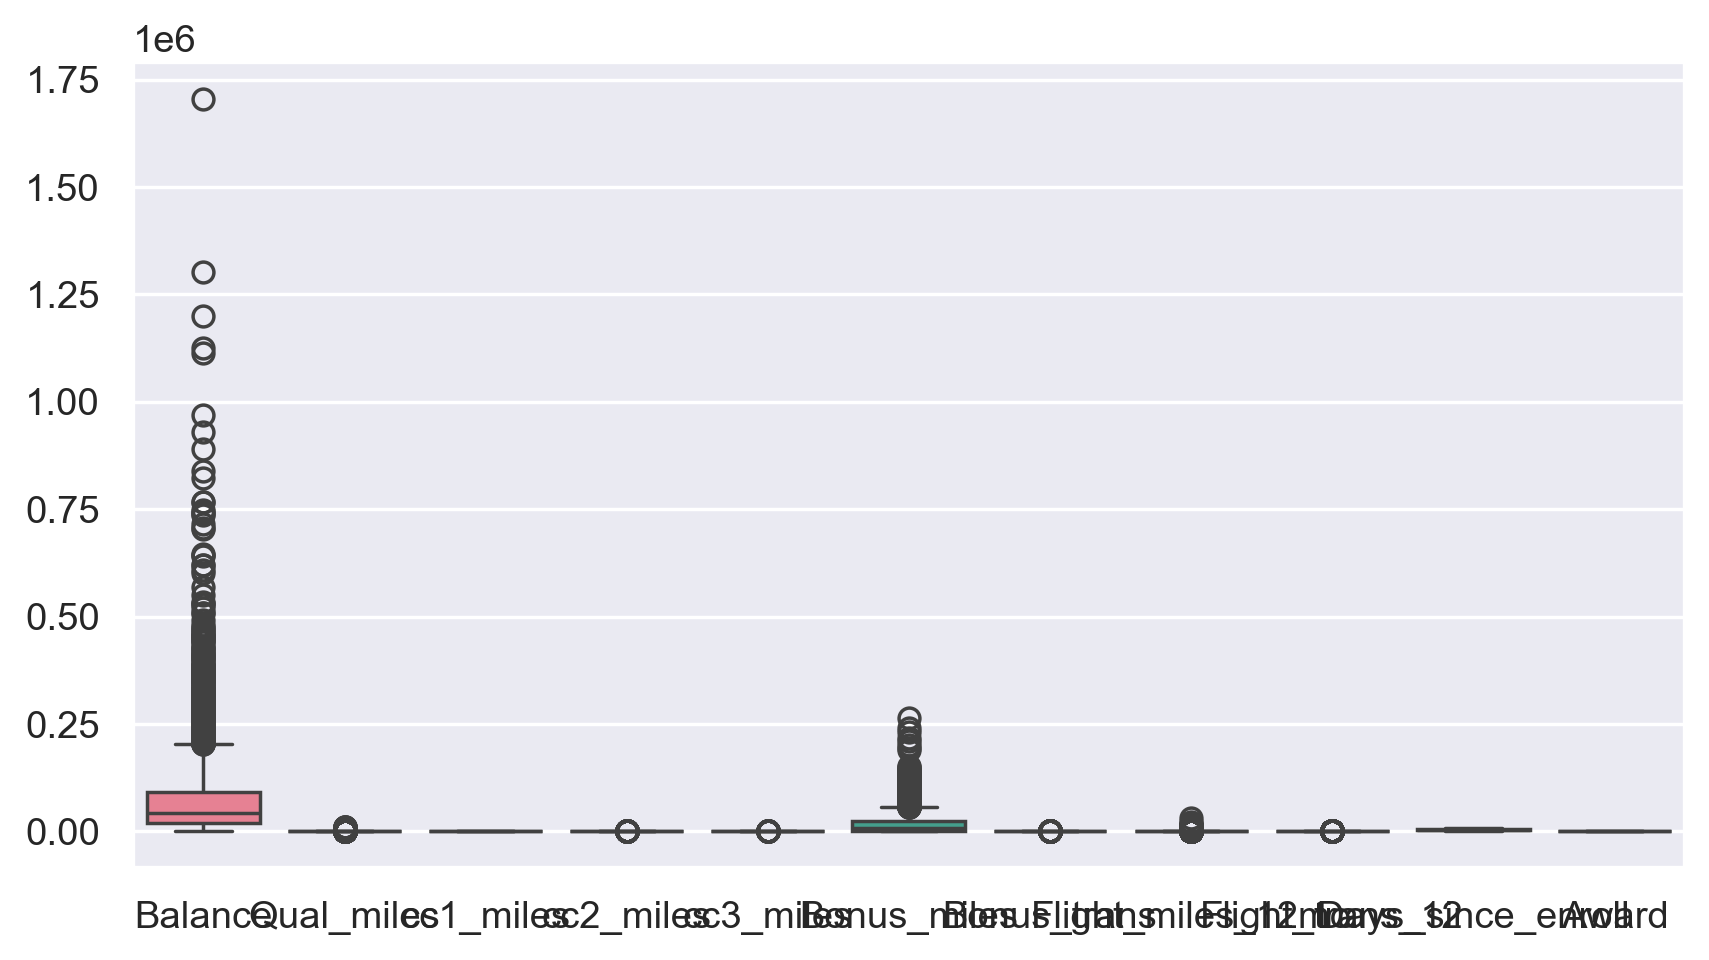

In [8]:
sns.boxplot(df)
plt.tight_layout()

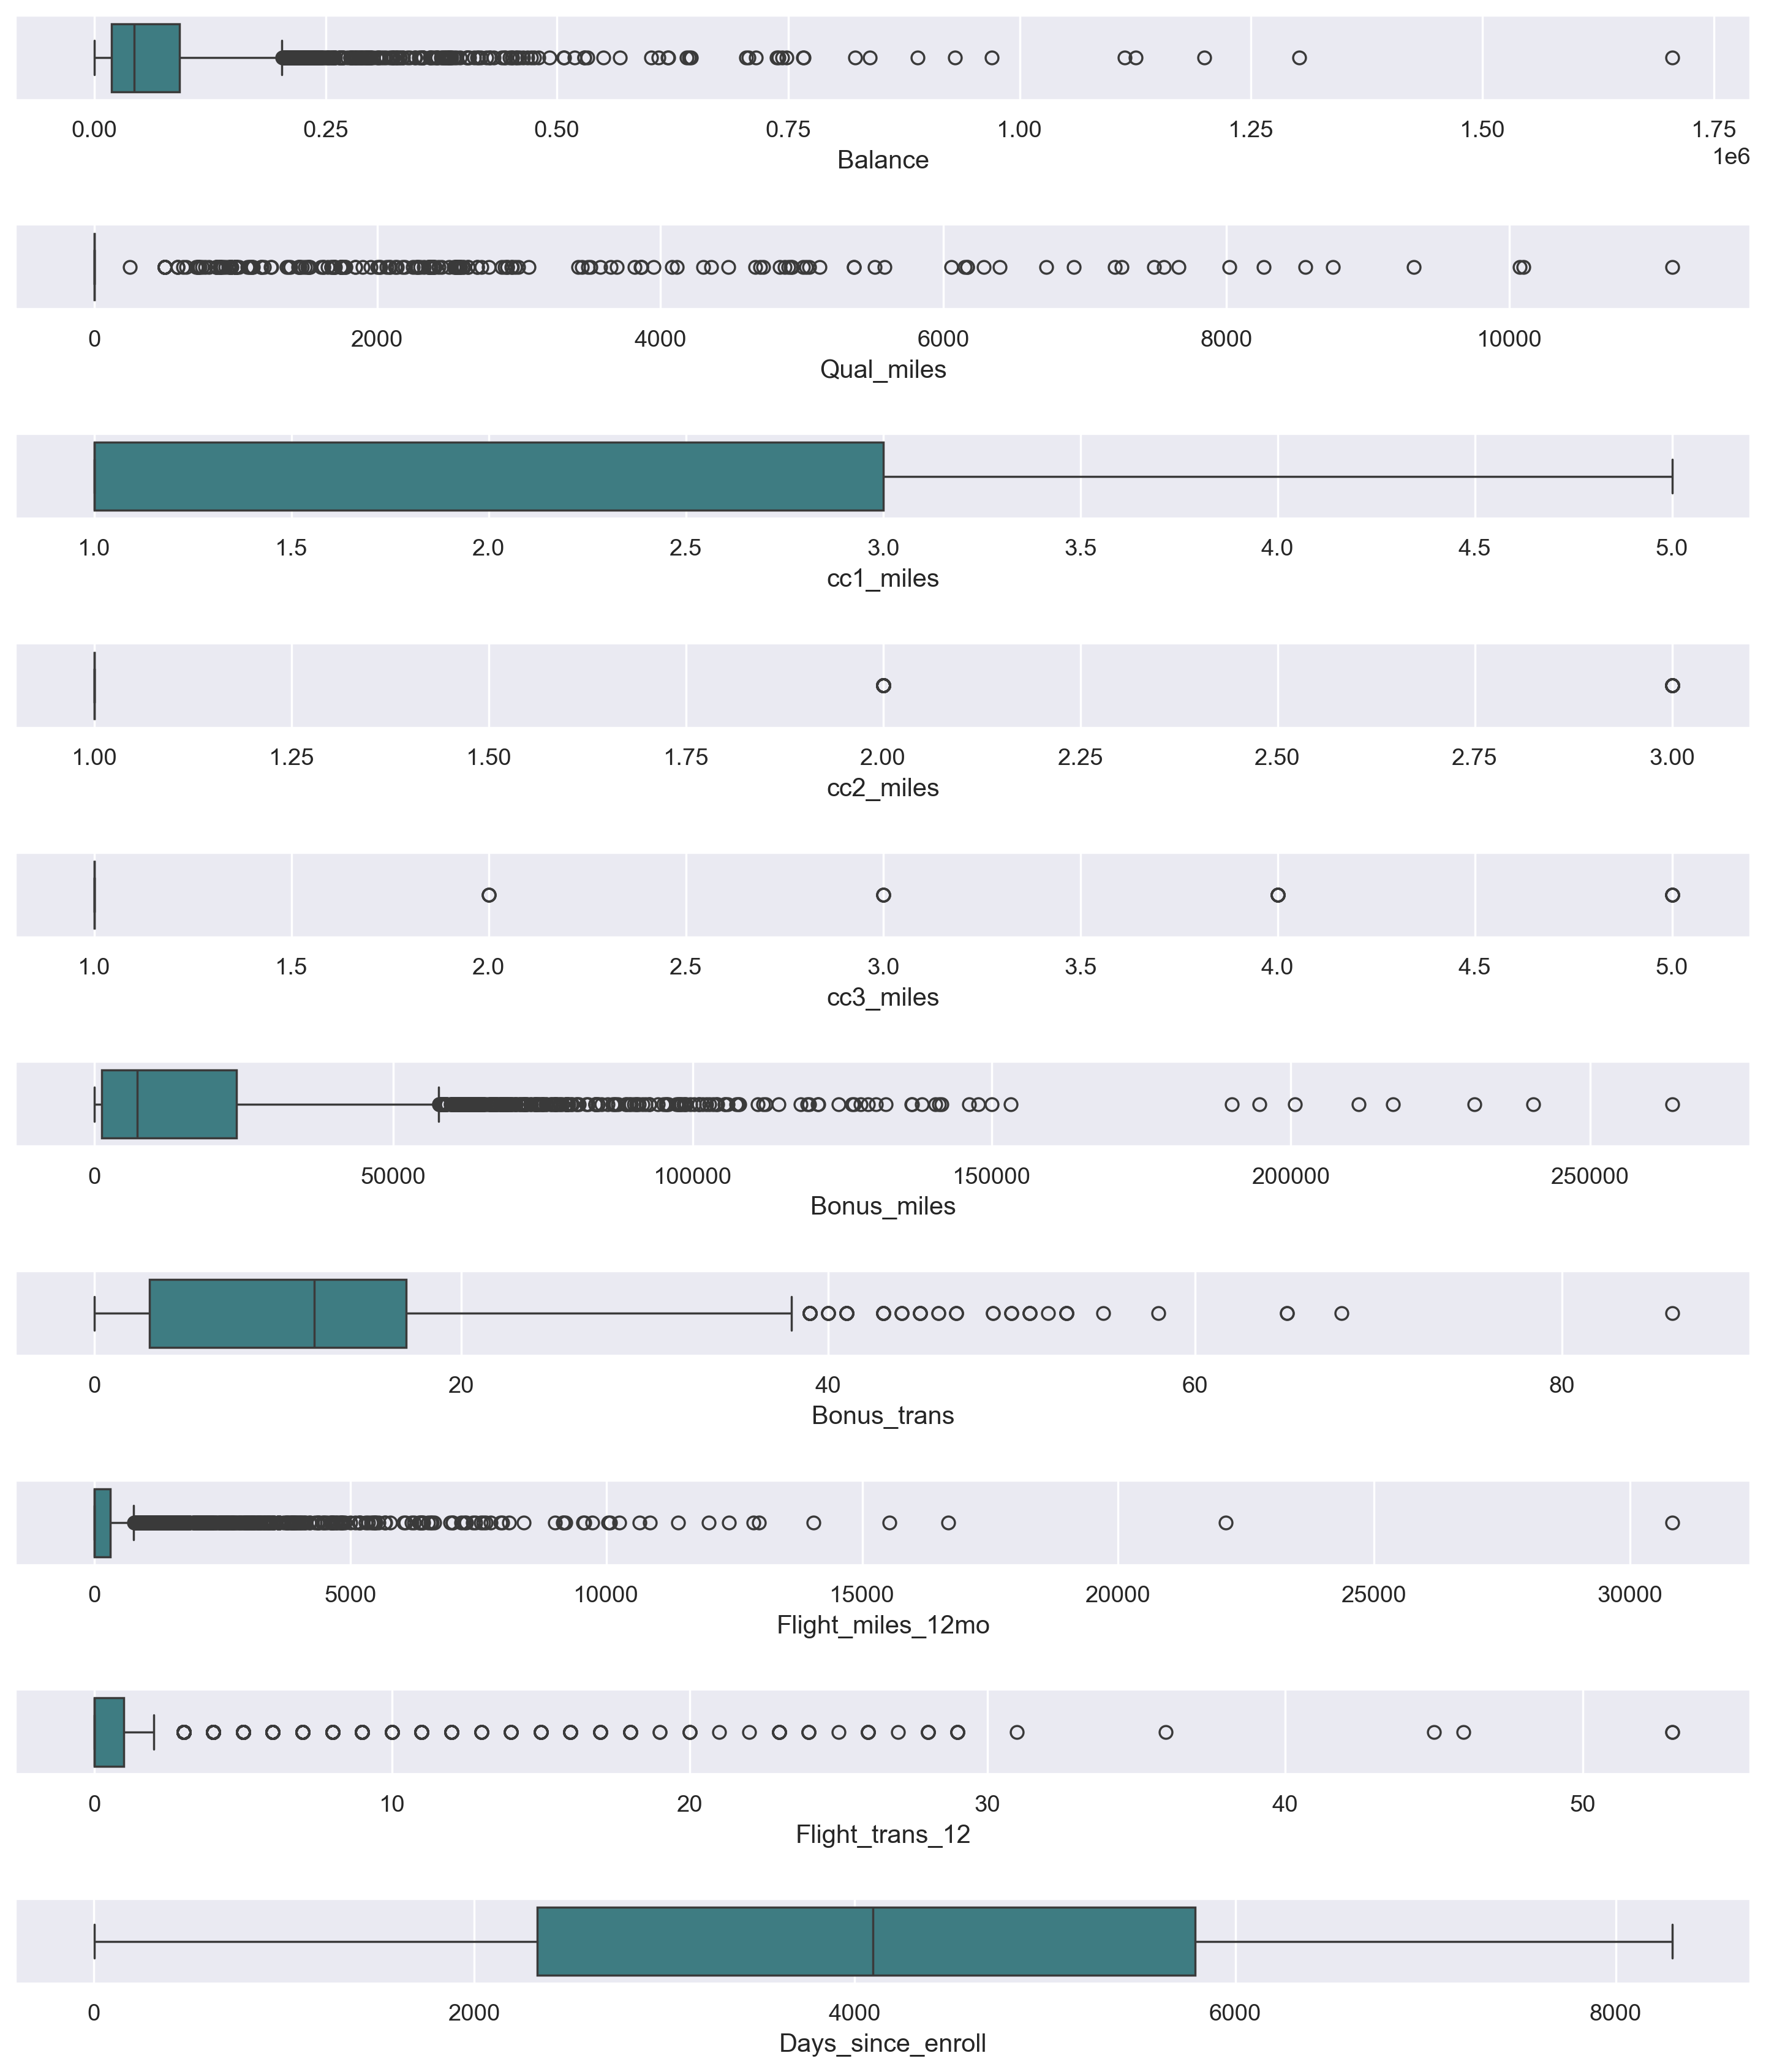

In [9]:
outlier = df.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

### There are outliers present in the data, we need to clean it for Kmeans clustering and hierarchical clustering. We dont need to remove outliers for DBScan as DBScan itself also detects outliers and create cluster accordingly.

In [10]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [11]:
outlier_detection(df, df.columns)

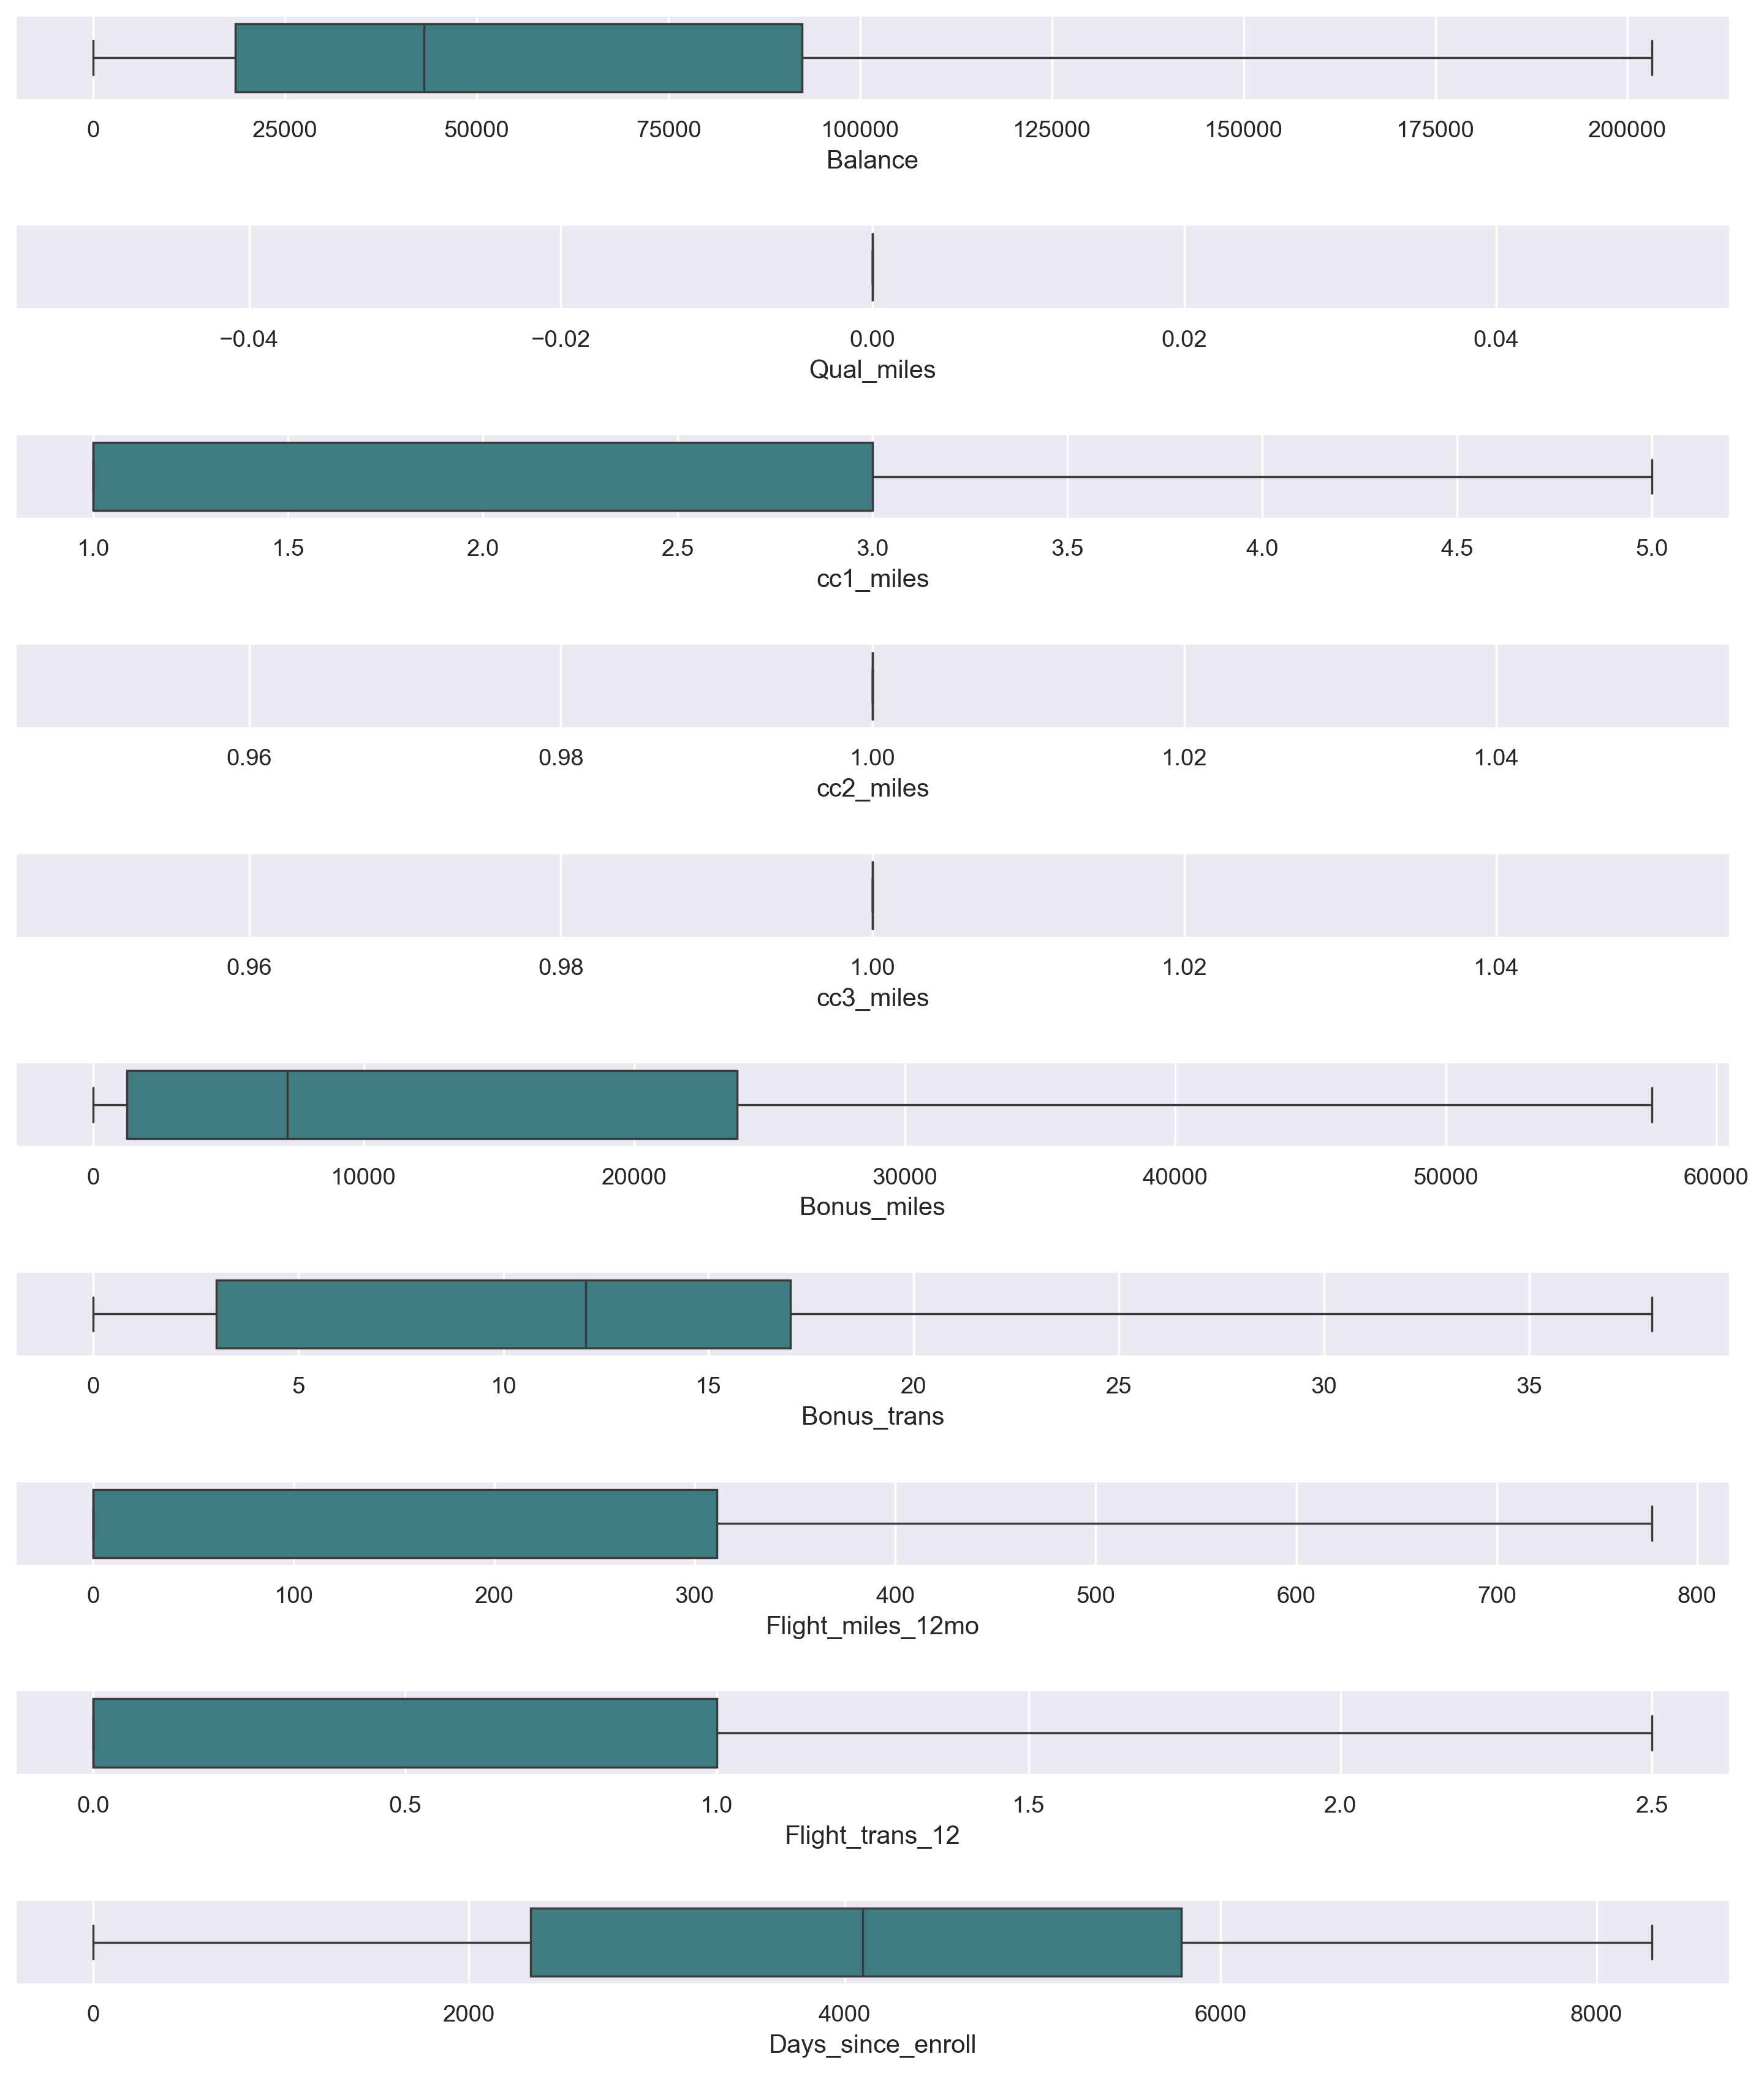

In [12]:
outlier = df.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

### The data has been cleaned from outliers.

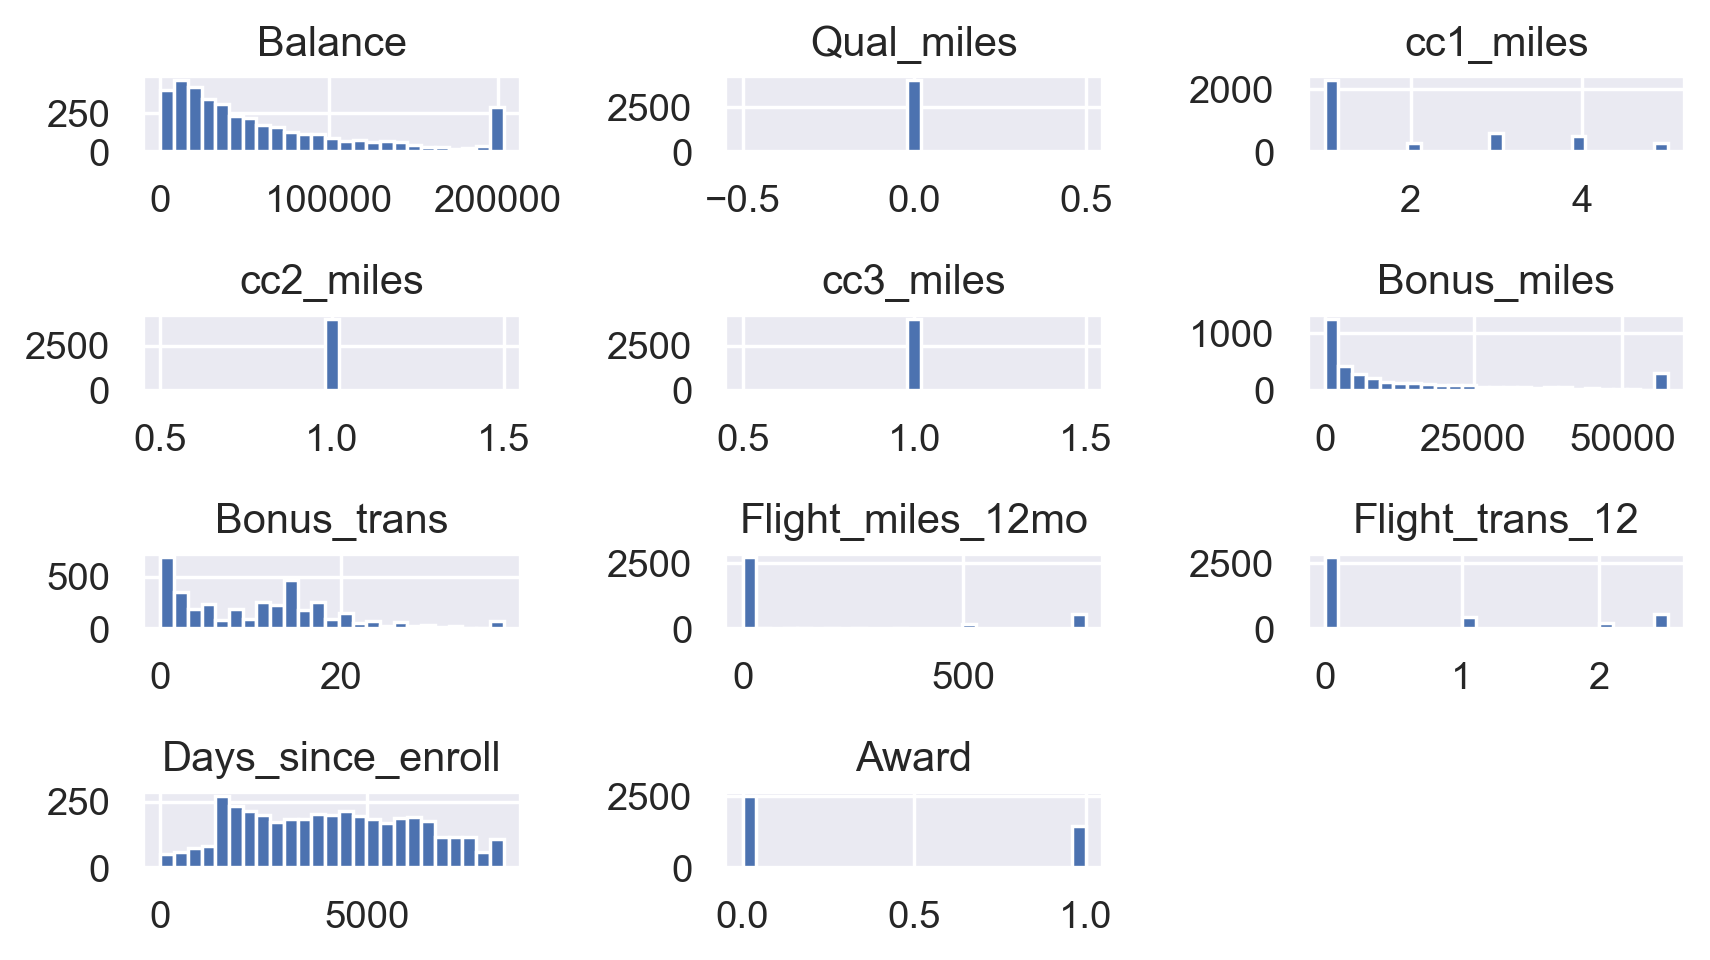

In [13]:
#plt.figsize = (20,5)
plt.fontsize = '6'
df.hist(bins = 25)
plt.tight_layout()

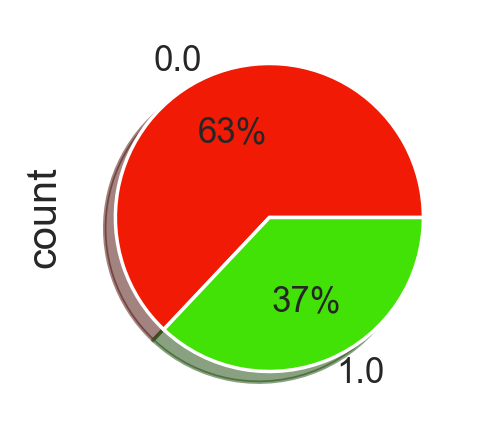

In [14]:
fig = plt.gcf()
fig.set_size_inches(2,2) 
df['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='10',colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

### The pie chart represents that 63% people are not awarded and only 37% people are awarded

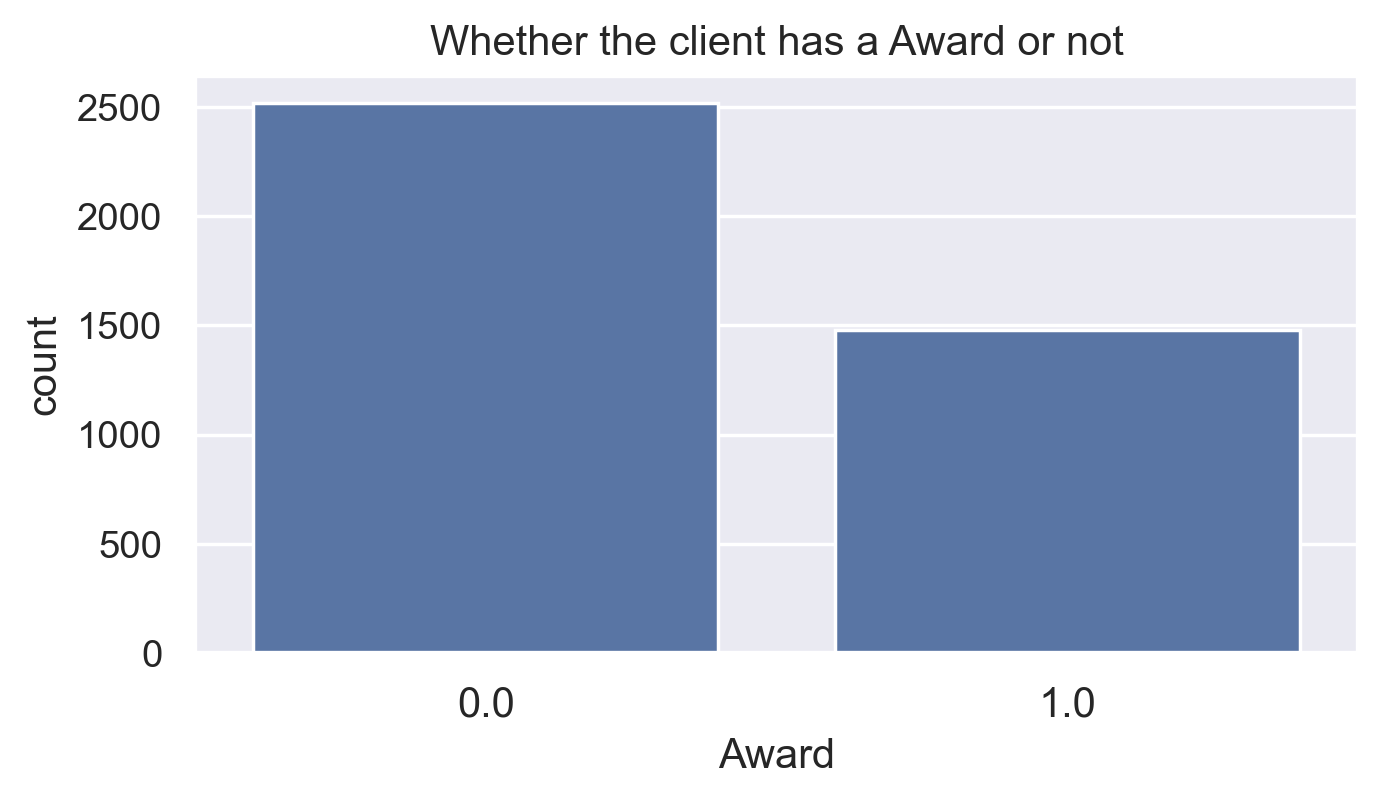

In [15]:
plt.figure(figsize=(6,3))
sns.countplot(x='Award', data= df, order= df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')
plt.show()

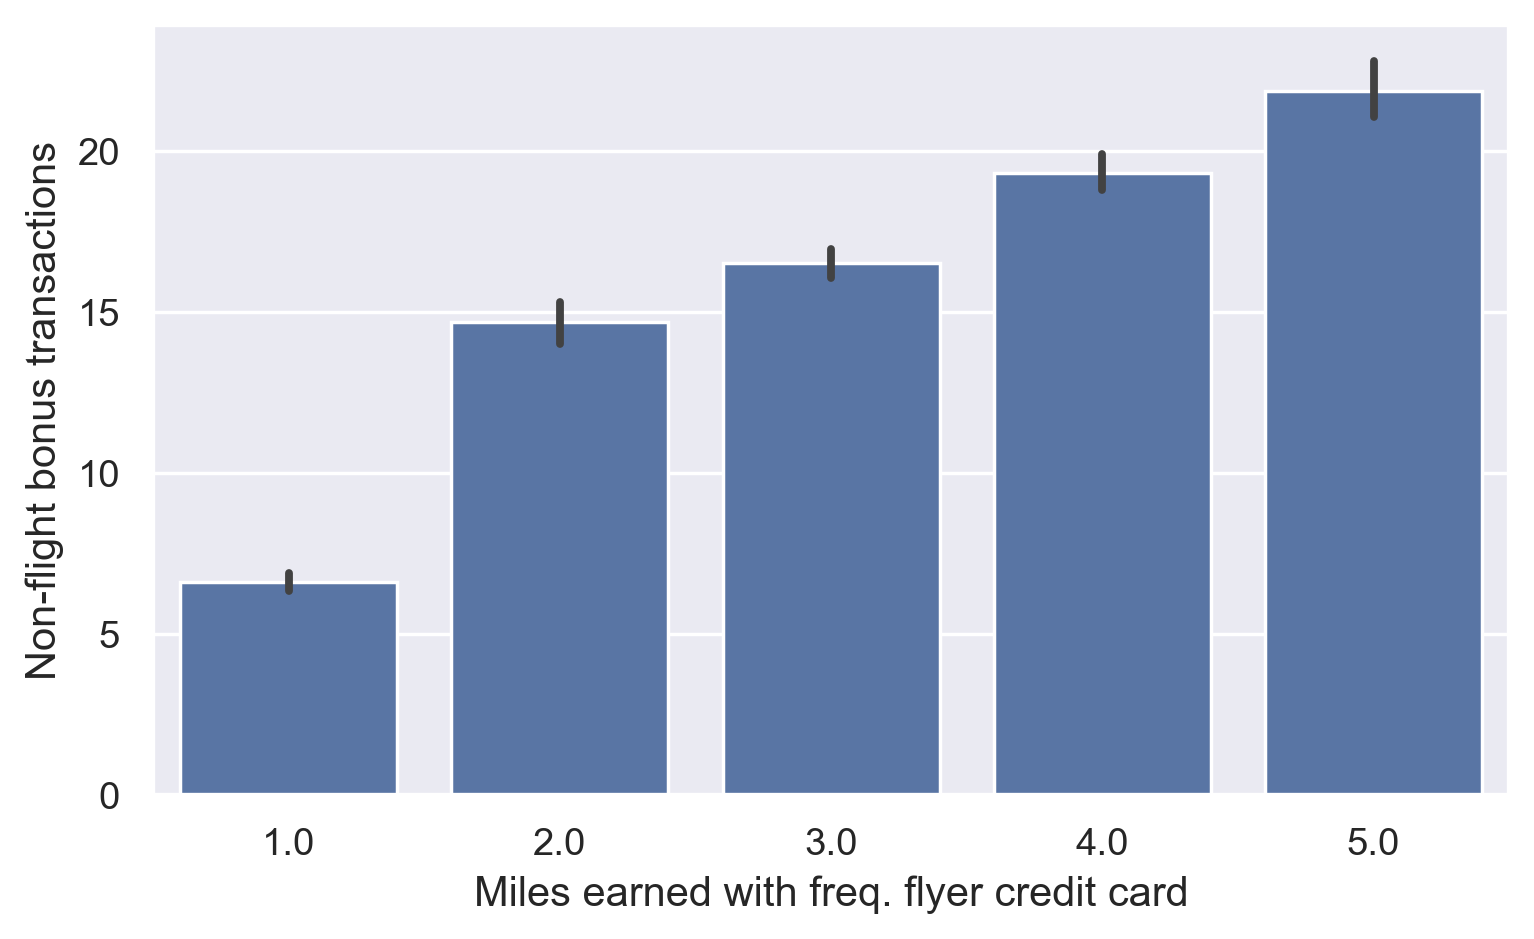

In [16]:
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

### Data transformation - Standardizing and normalizing the data to check which transformation gives better result.

In [17]:
sc = StandardScaler()
std_data = sc.fit_transform(df)
std_data

array([[-0.60725829,  0.        , -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657,  0.        , -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963,  0.        , -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775,  0.        , -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163,  0.        , -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [18]:
ms = MinMaxScaler()
norm_data = ms.fit_transform(df)
norm_data

array([[0.13848624, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.09469599, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.203495  , 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.36215654, 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.27014732, 0.        , 0.        , ..., 0.4       , 0.16867615,
        0.        ],
       [0.01484115, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

### Hierarchical Clustering Algorithm
1. Dendrogram on Standard Scaler Applied on Data

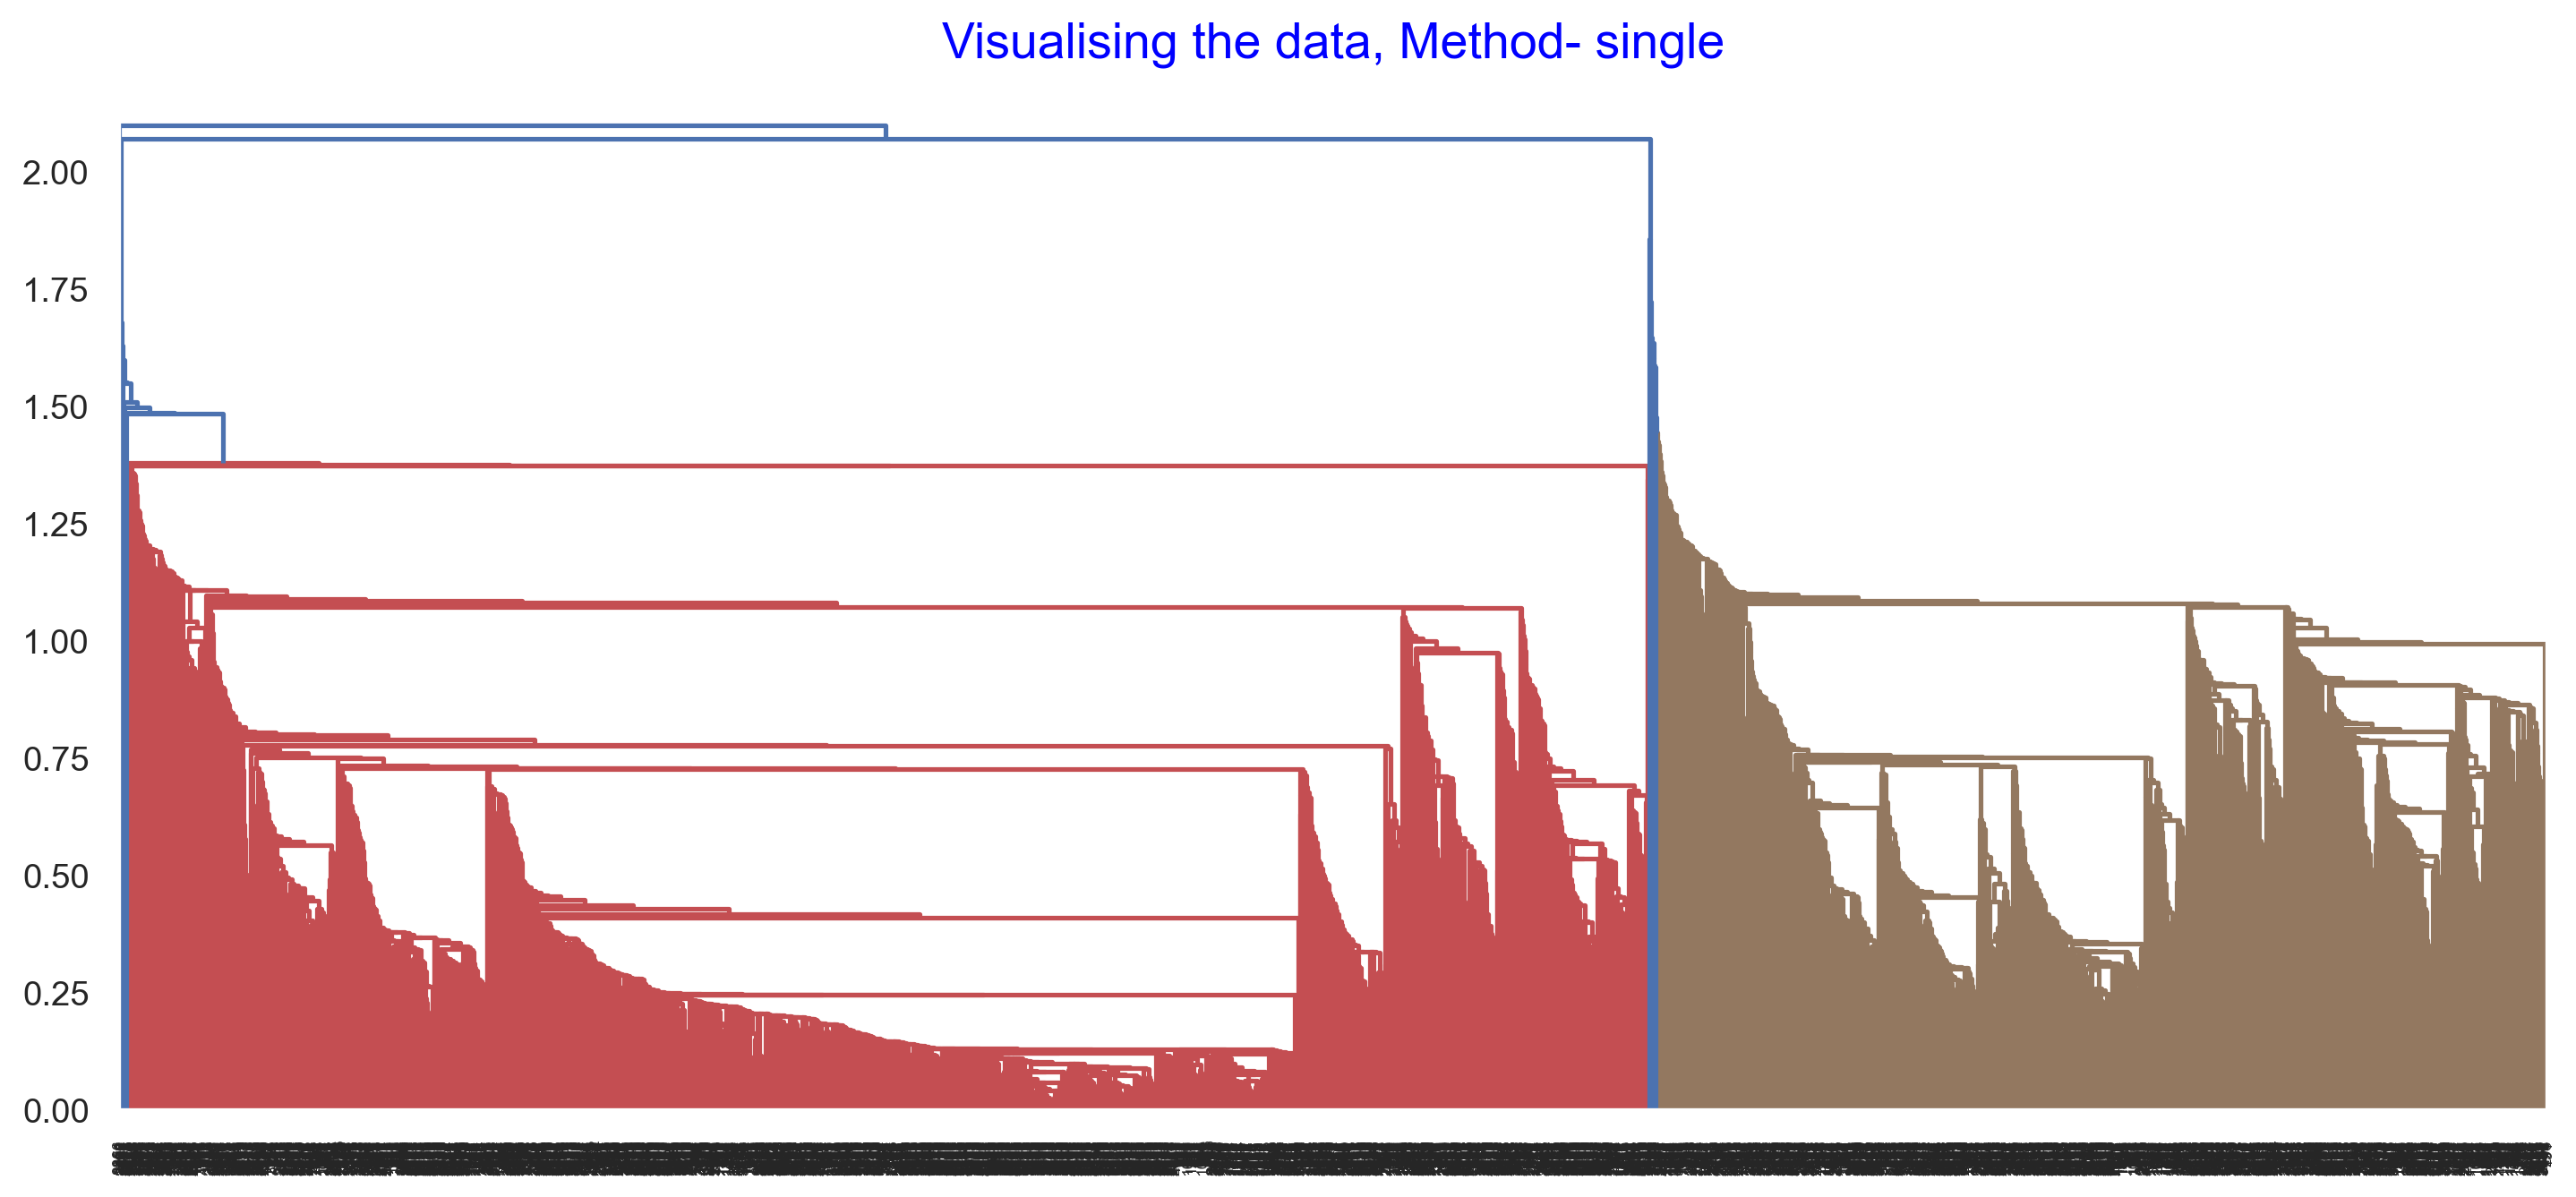

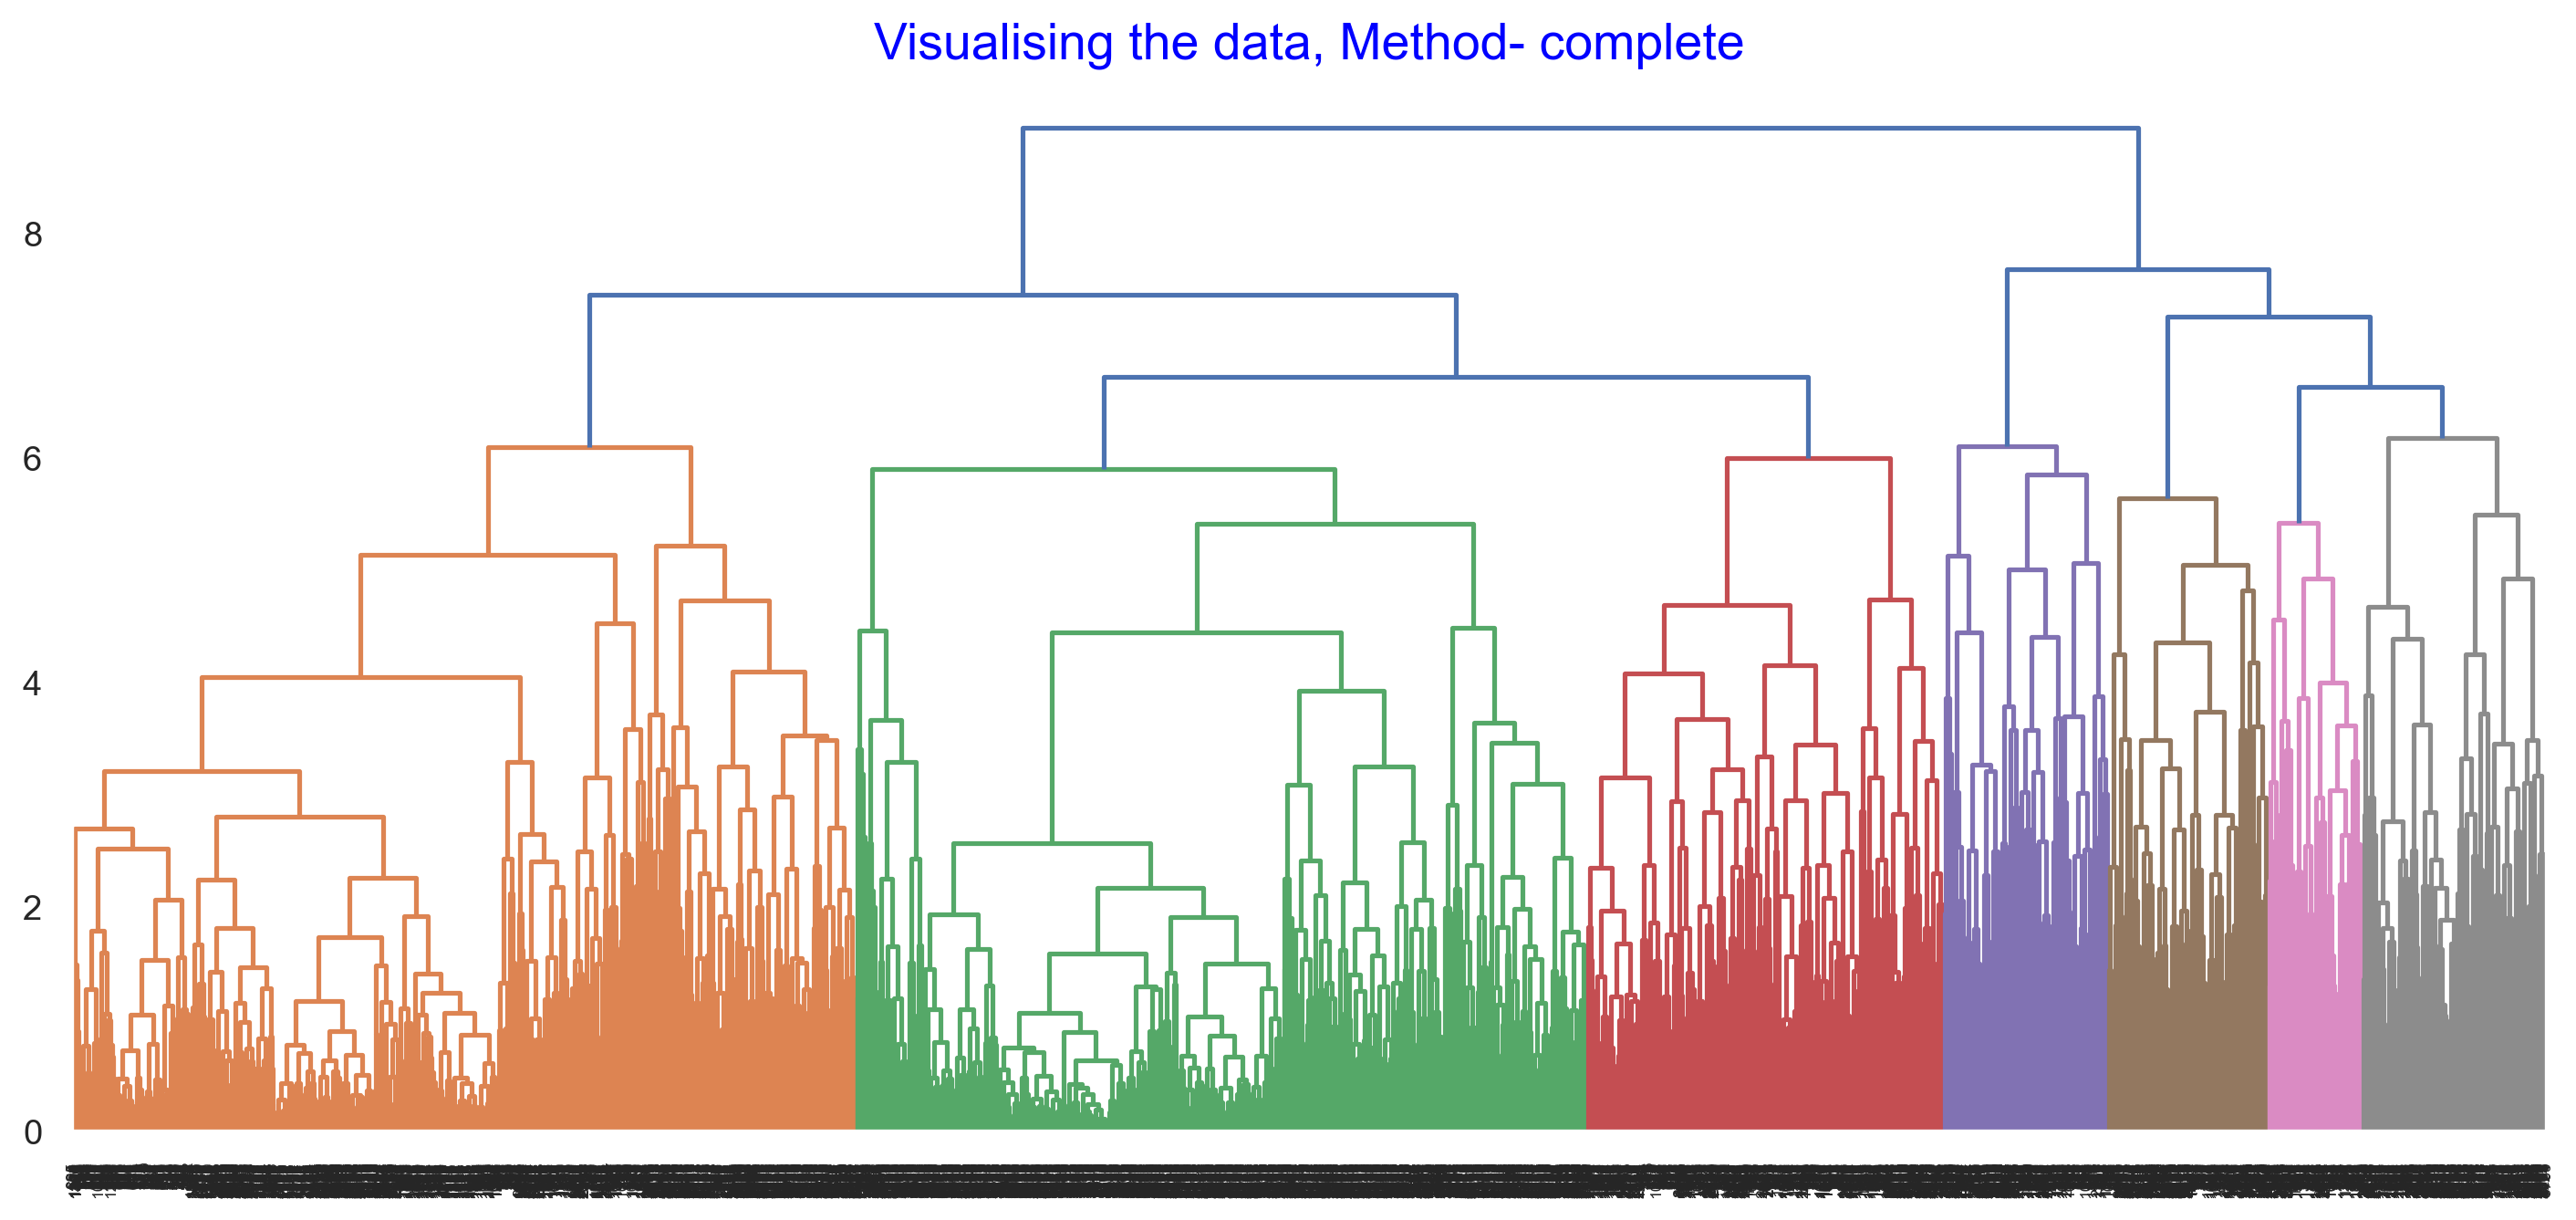

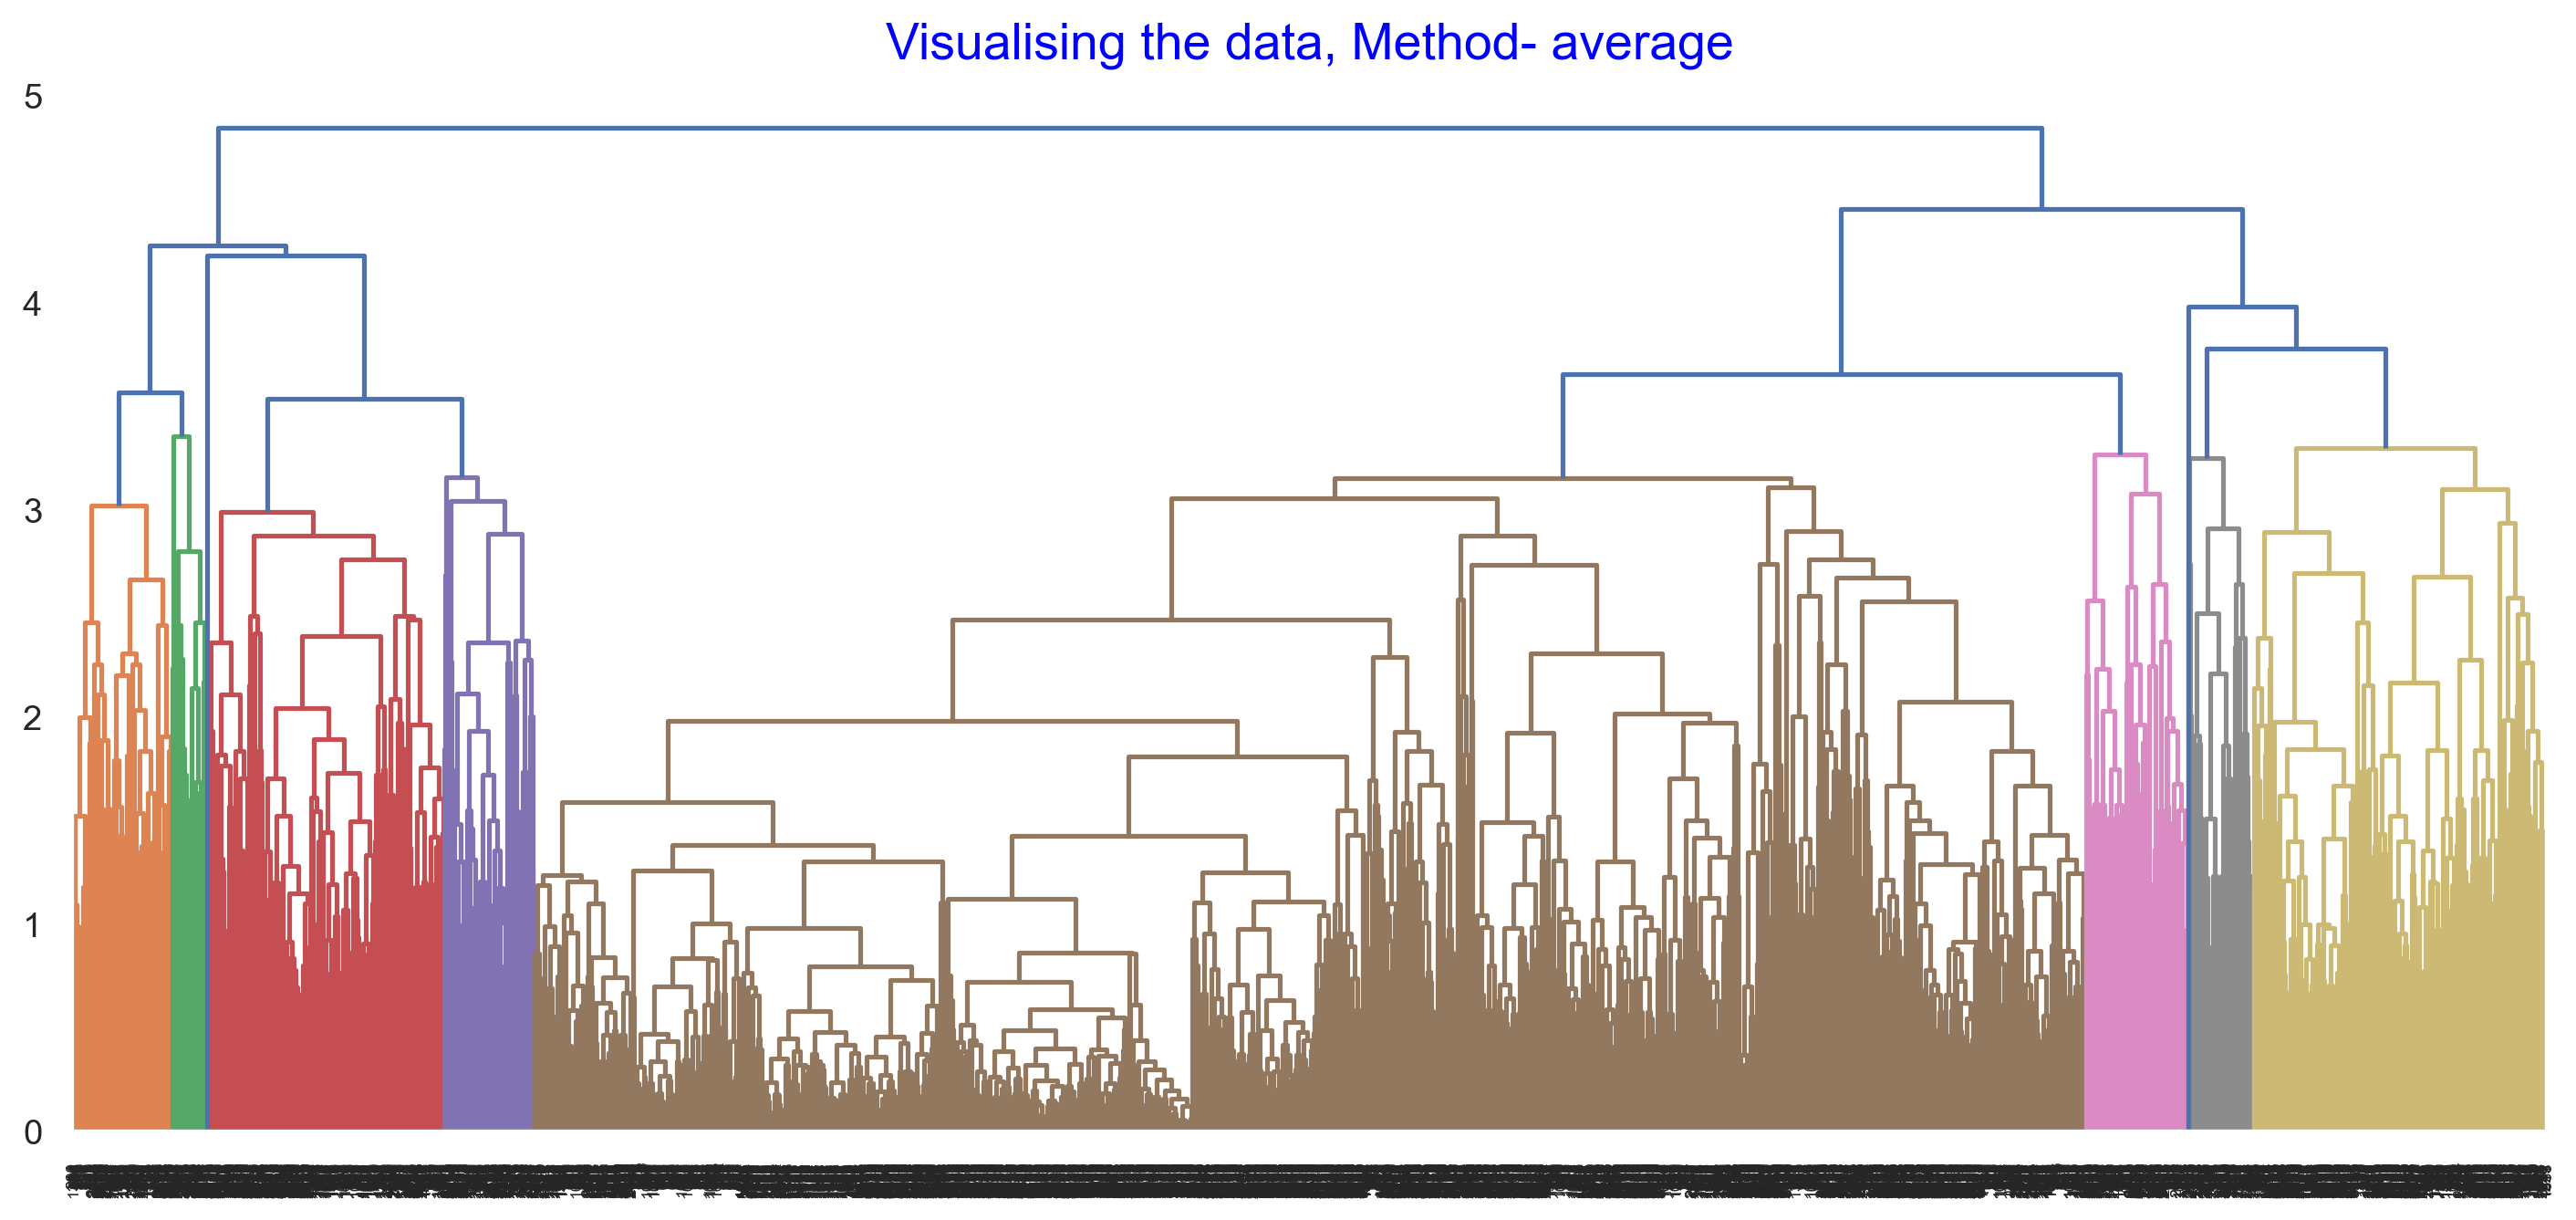

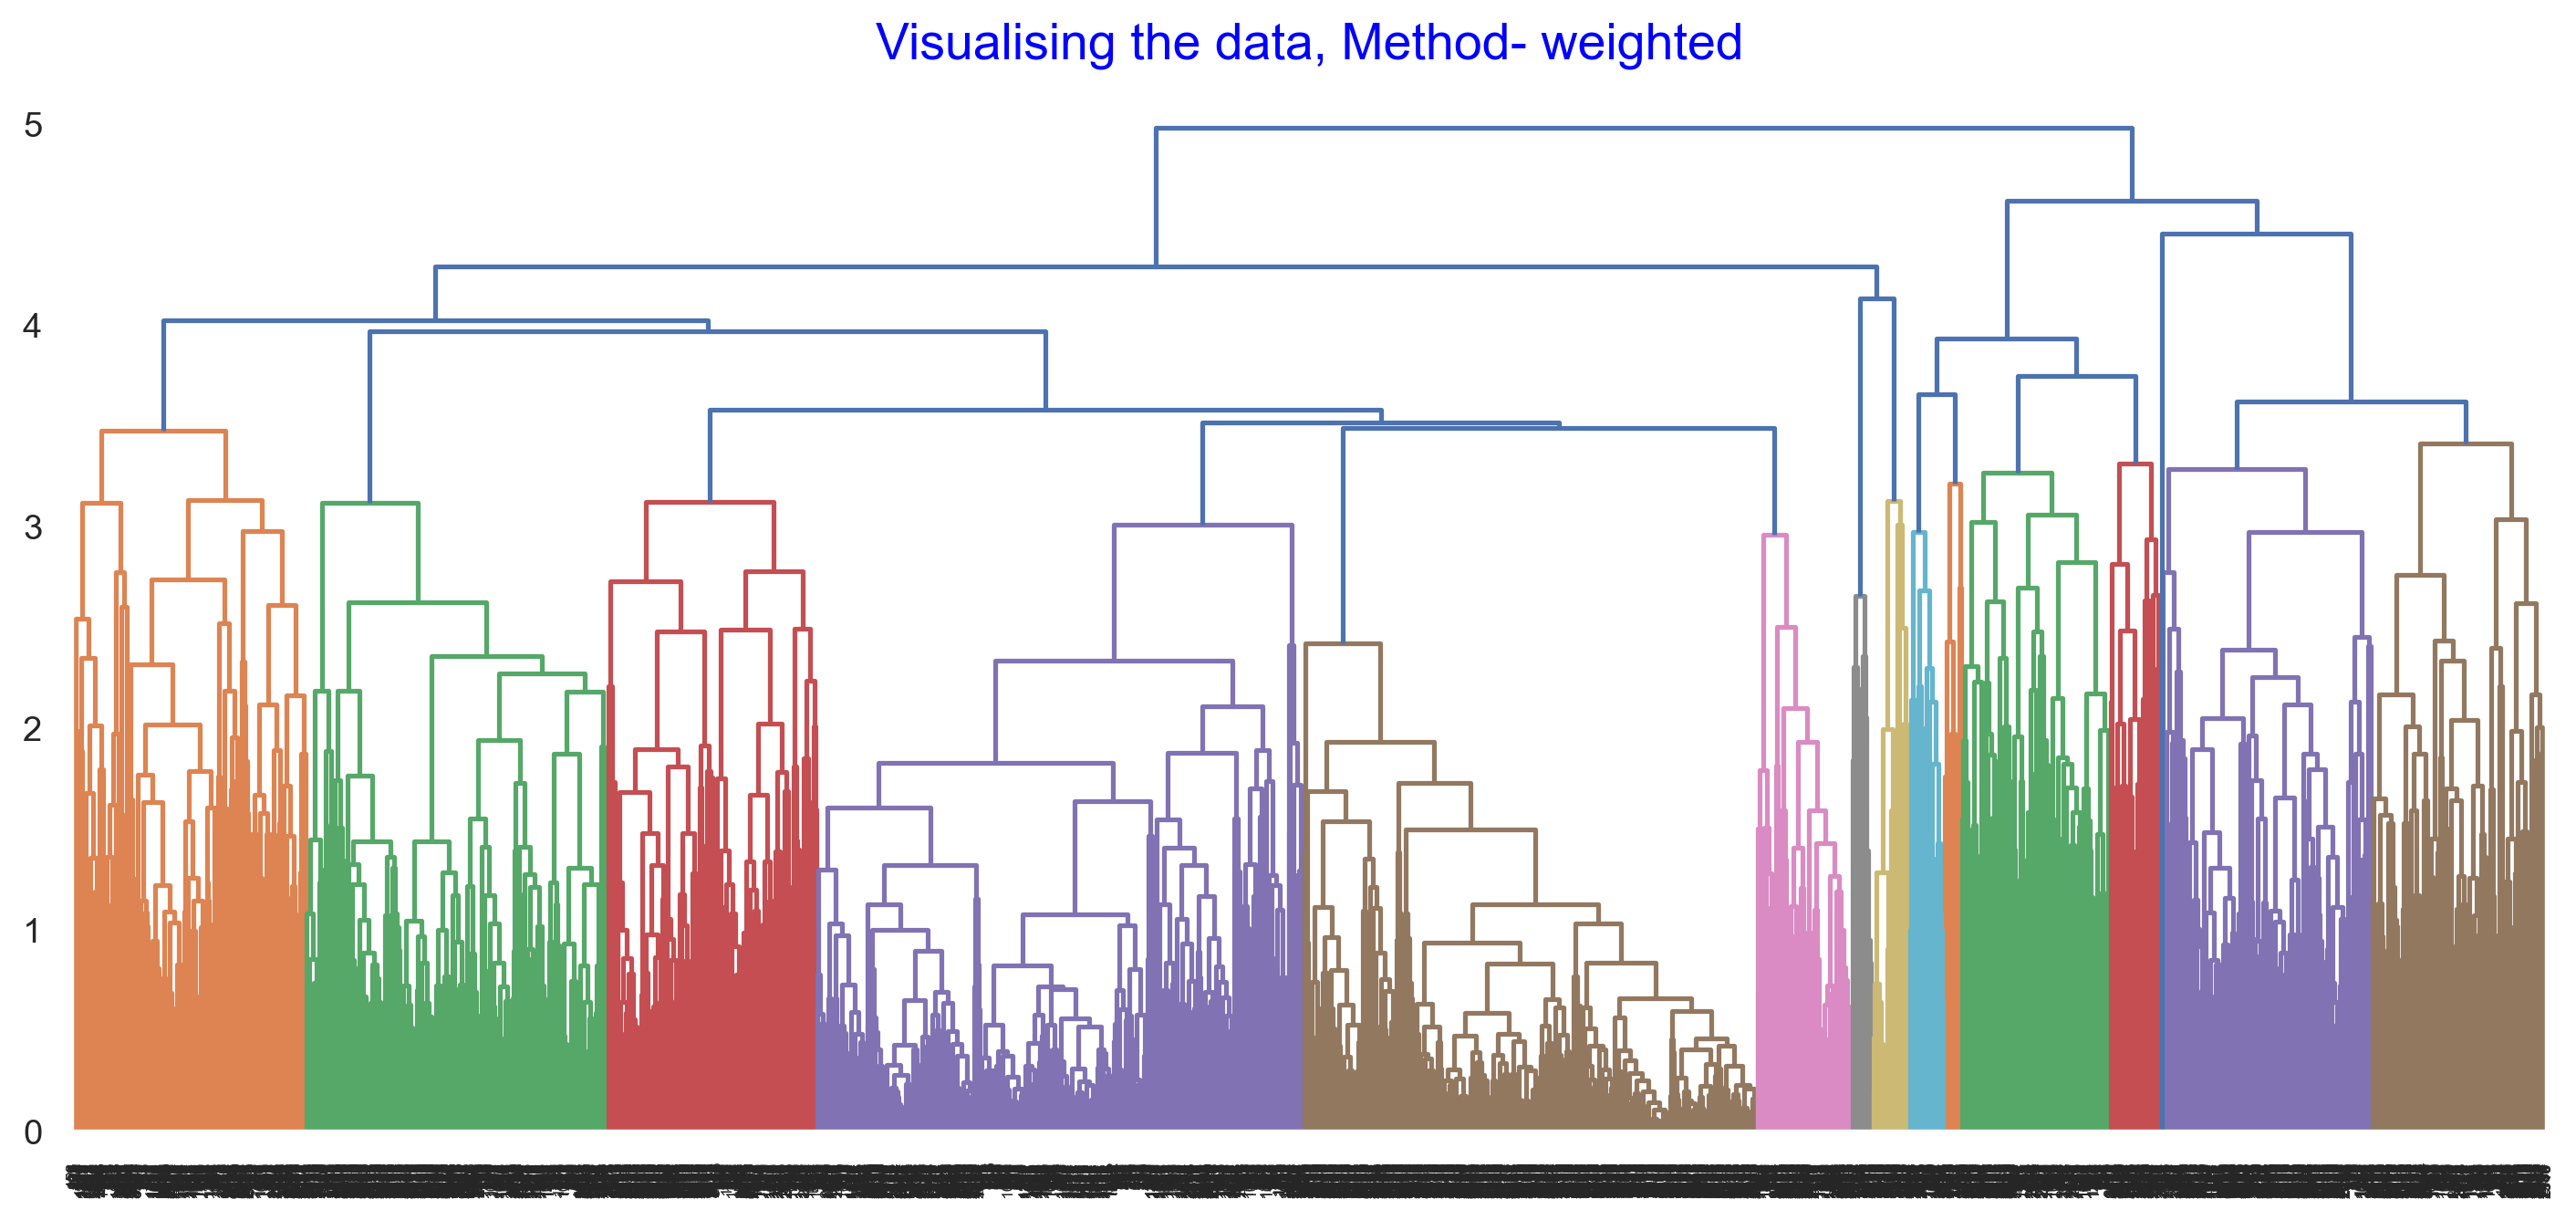

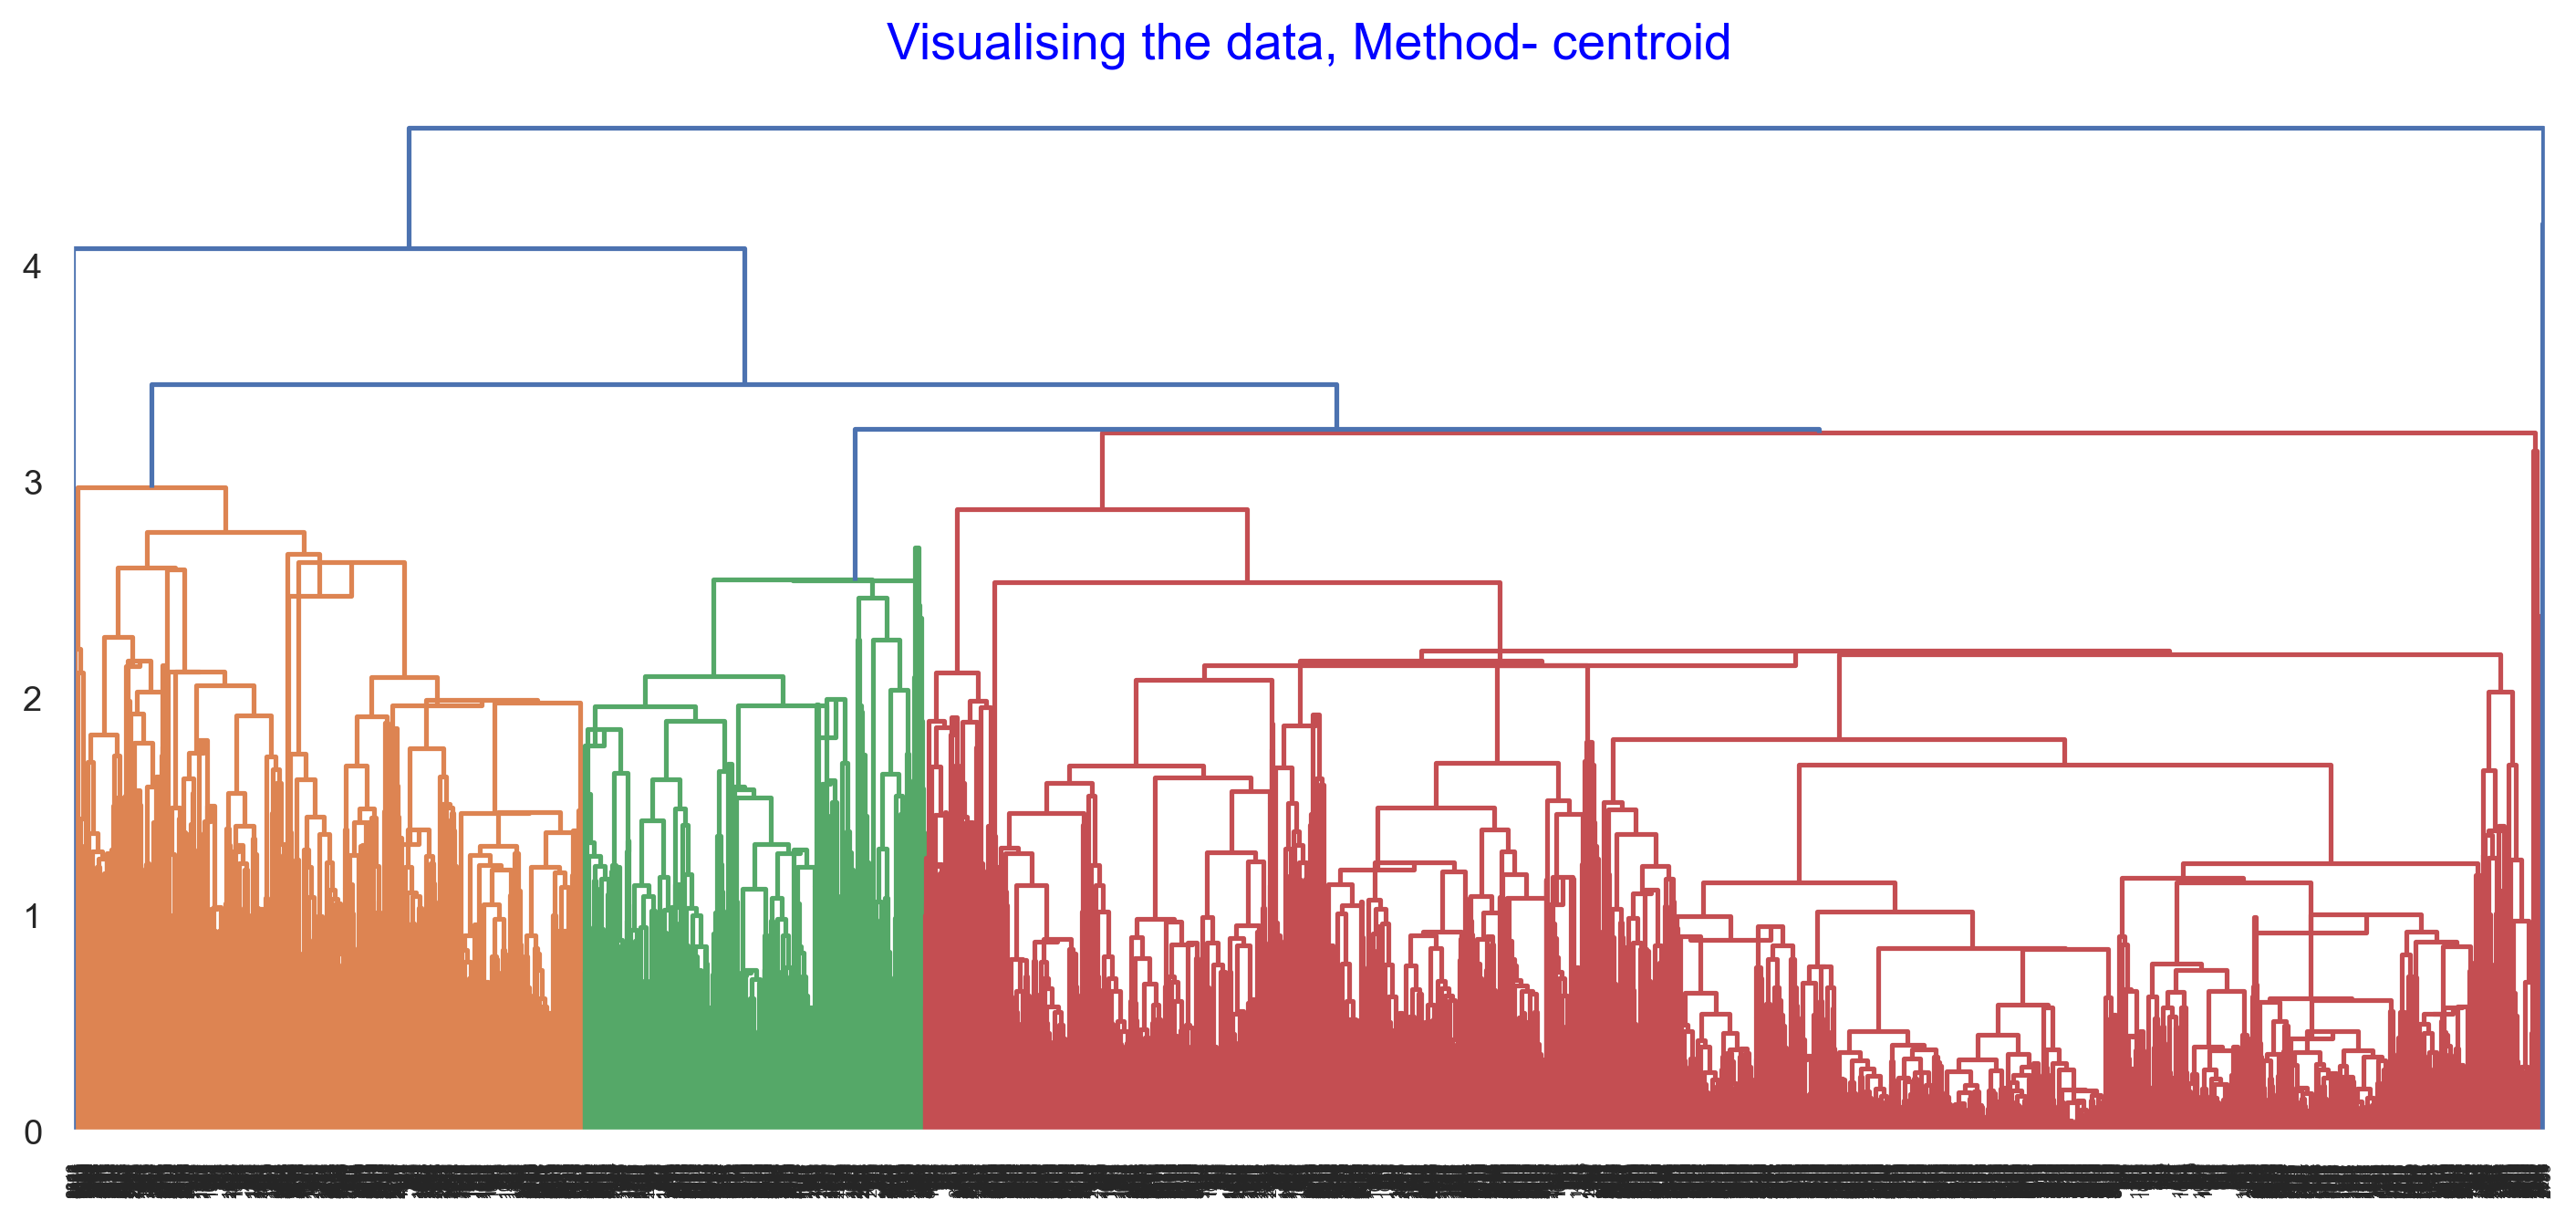

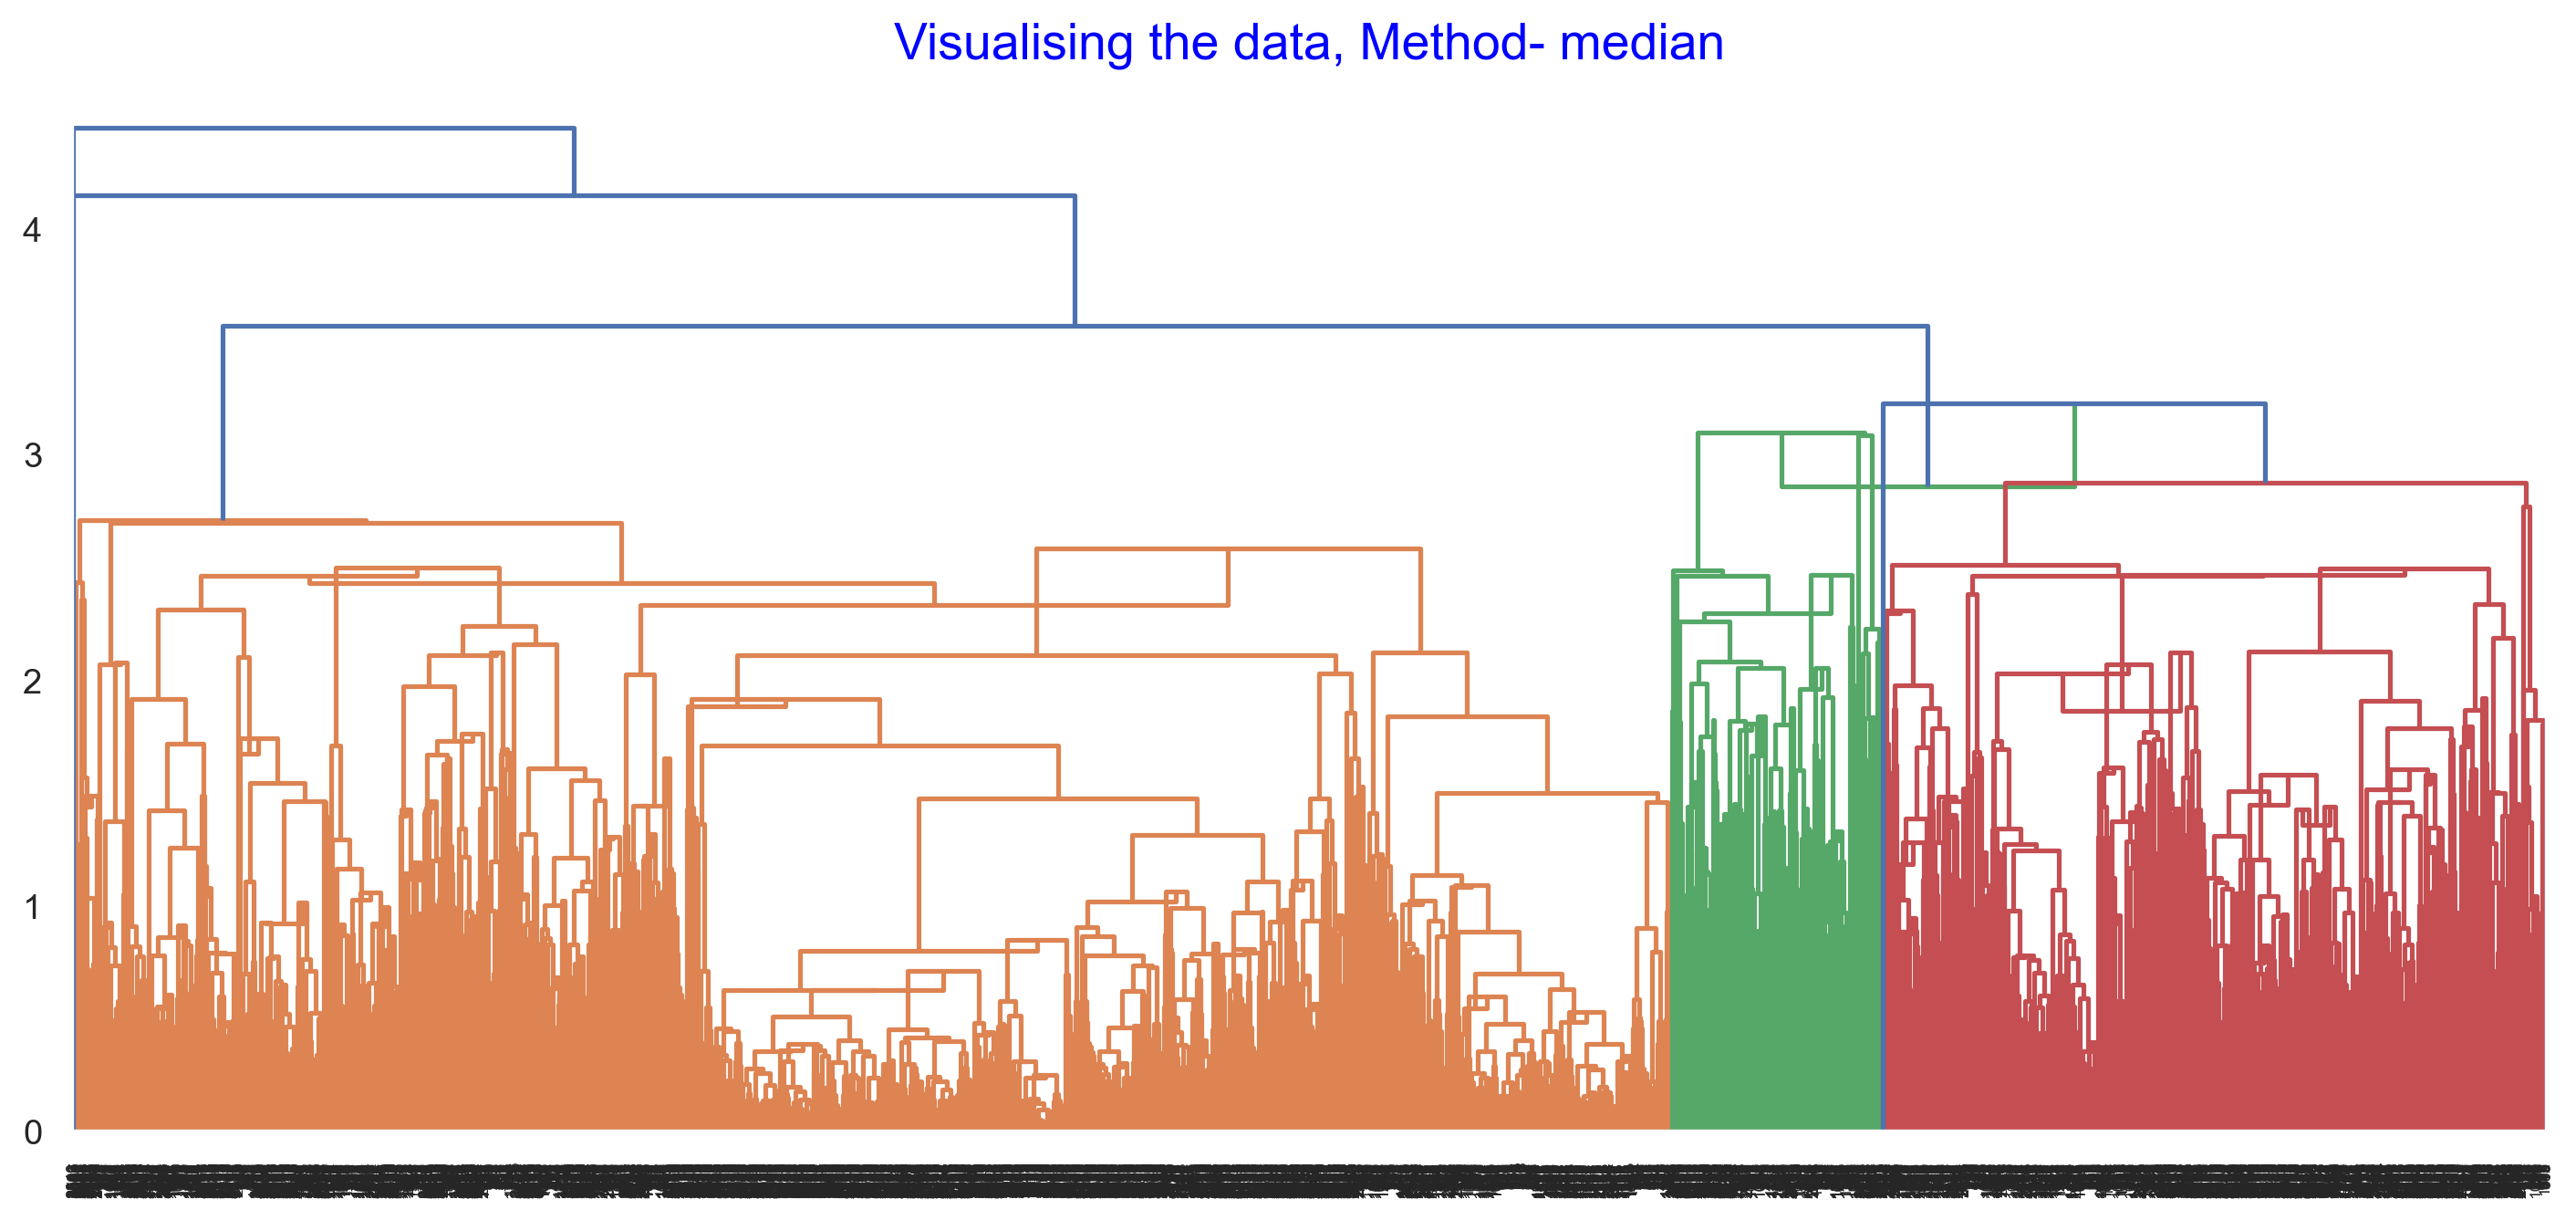

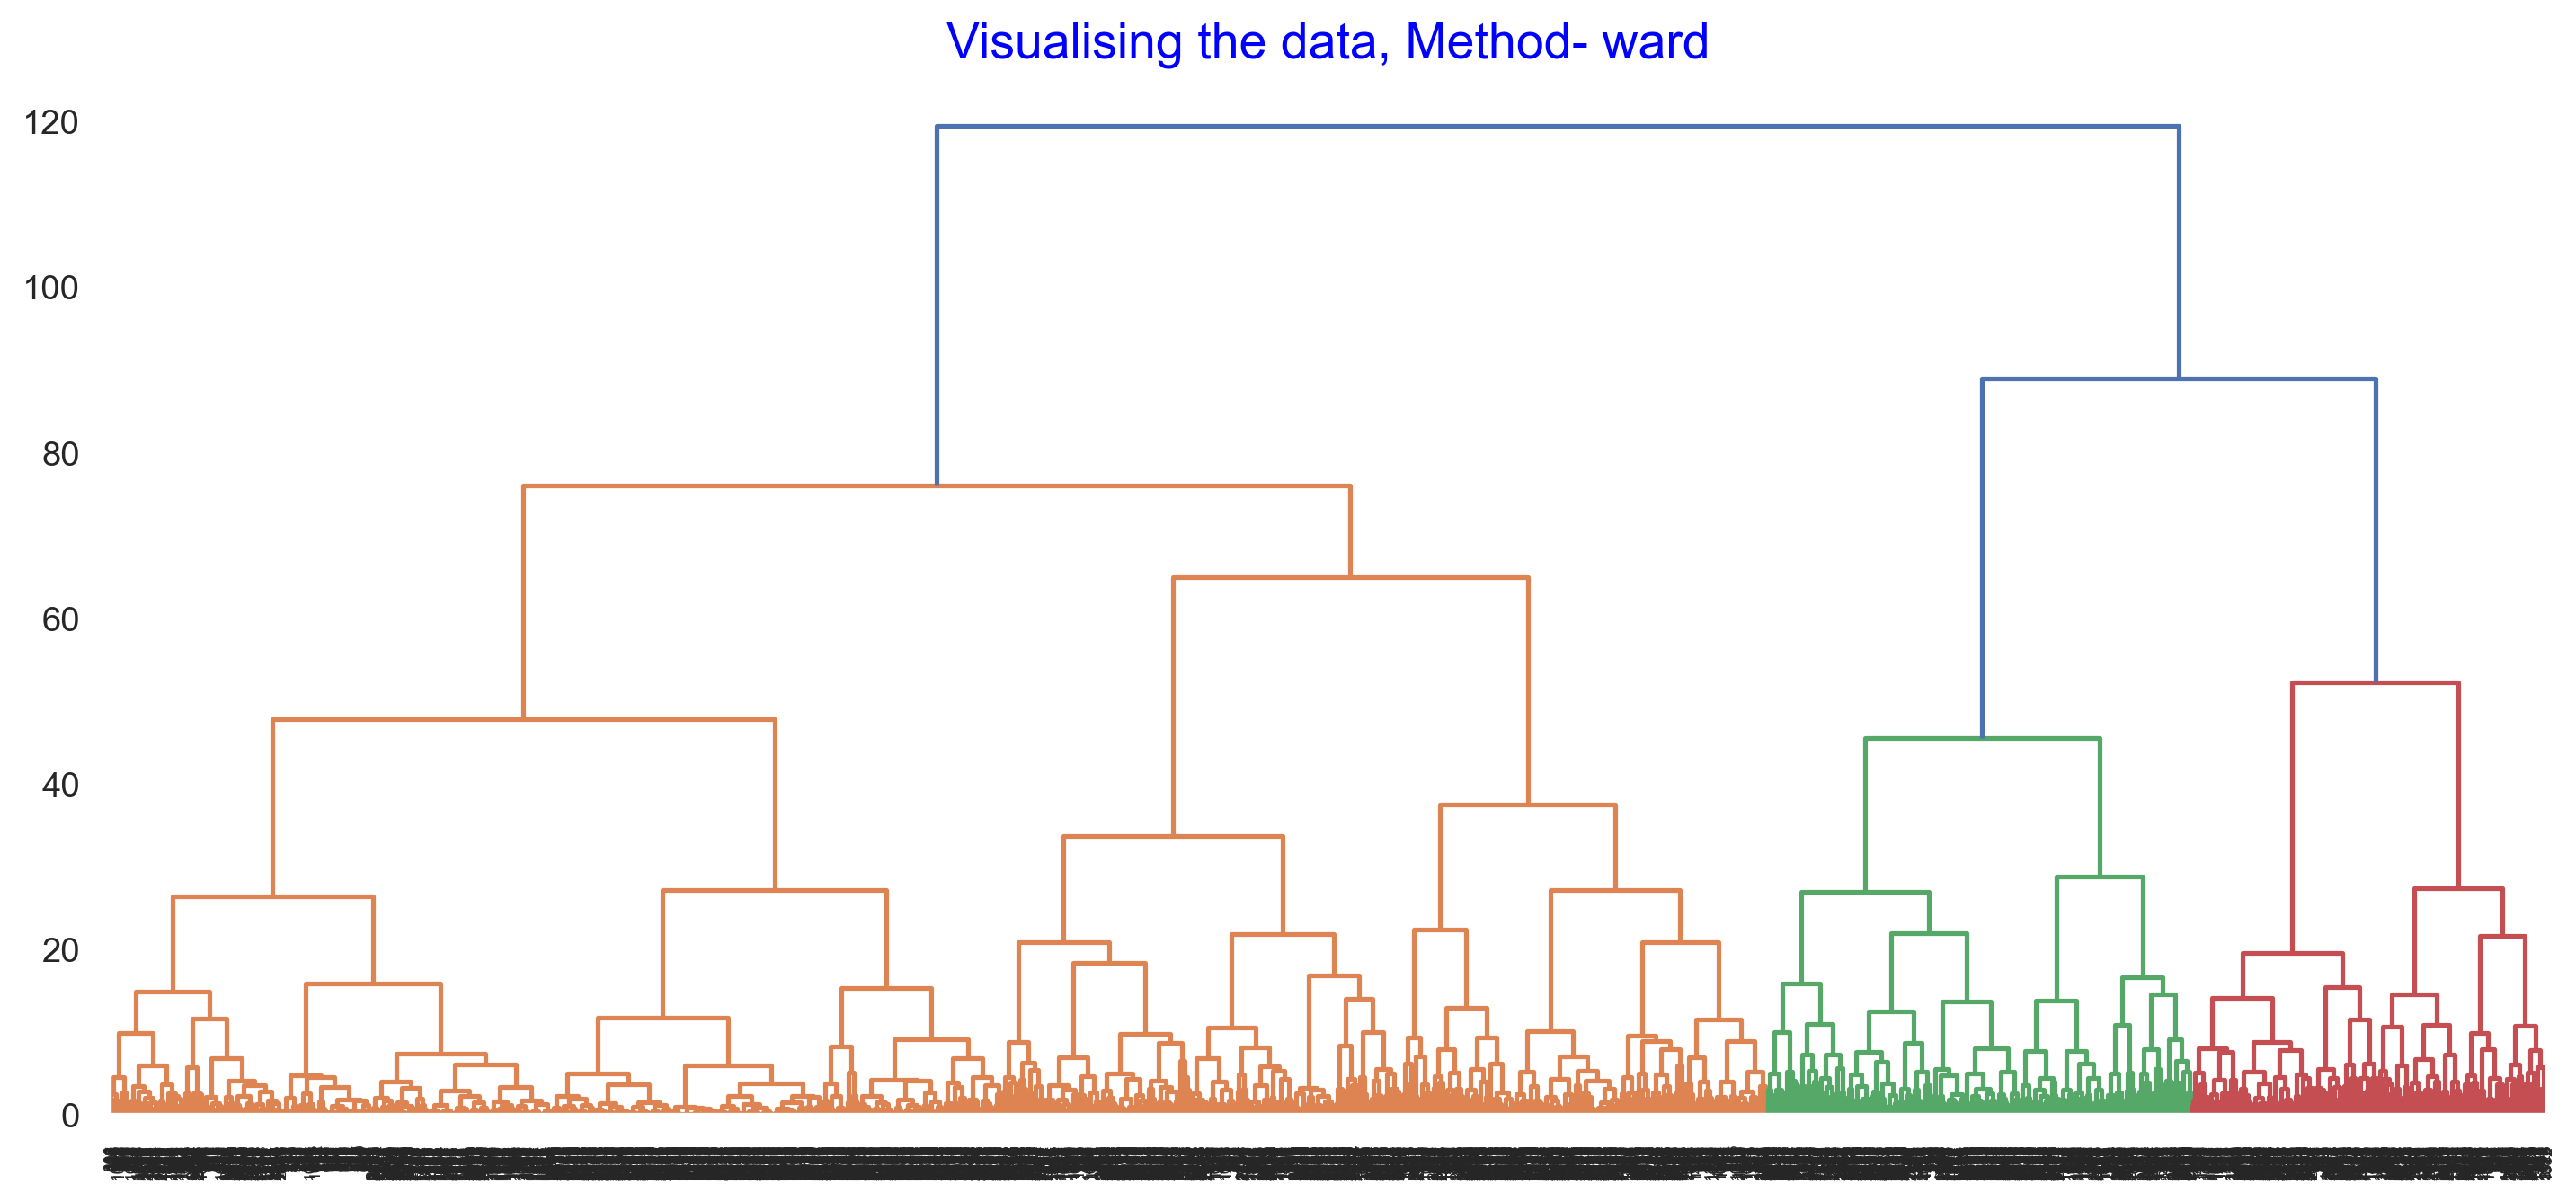

In [19]:
#Running a for loop to visualize which linkage type shows better cluster formation on standardized data.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))    
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram = sch.dendrogram(sch.linkage(std_data, method = methods,optimal_ordering=False))

In [20]:
#Running a cluster to get the number of cluster and its silhouette score.
#Silhouette score range within -1 to 1 . -1 or value close to it indicates worst cluster and silhouette score 1 or close to 1 indicate best cluster.

clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for cluster in clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hierarchy_cluster = AgglomerativeClustering(n_clusters=cluster,linkage=linkages) # bydefault it takes linkage 'ward'
        labels = hierarchy_cluster.fit_predict(std_data)
        silhouette_score2 = silhouette_score(std_data, labels)
        print("For clusters =", cluster,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2.round(2))
    print()

For clusters = 2 The average silhouette_score with linkage- ward : 0.27
For clusters = 2 The average silhouette_score with linkage- complete : 0.33
For clusters = 2 The average silhouette_score with linkage- average : 0.31
For clusters = 2 The average silhouette_score with linkage- single : 0.22

For clusters = 3 The average silhouette_score with linkage- ward : 0.26
For clusters = 3 The average silhouette_score with linkage- complete : 0.29
For clusters = 3 The average silhouette_score with linkage- average : 0.31
For clusters = 3 The average silhouette_score with linkage- single : 0.21

For clusters = 4 The average silhouette_score with linkage- ward : 0.2
For clusters = 4 The average silhouette_score with linkage- complete : 0.11
For clusters = 4 The average silhouette_score with linkage- average : 0.29
For clusters = 4 The average silhouette_score with linkage- single : 0.19

For clusters = 5 The average silhouette_score with linkage- ward : 0.23
For clusters = 5 The average silhou

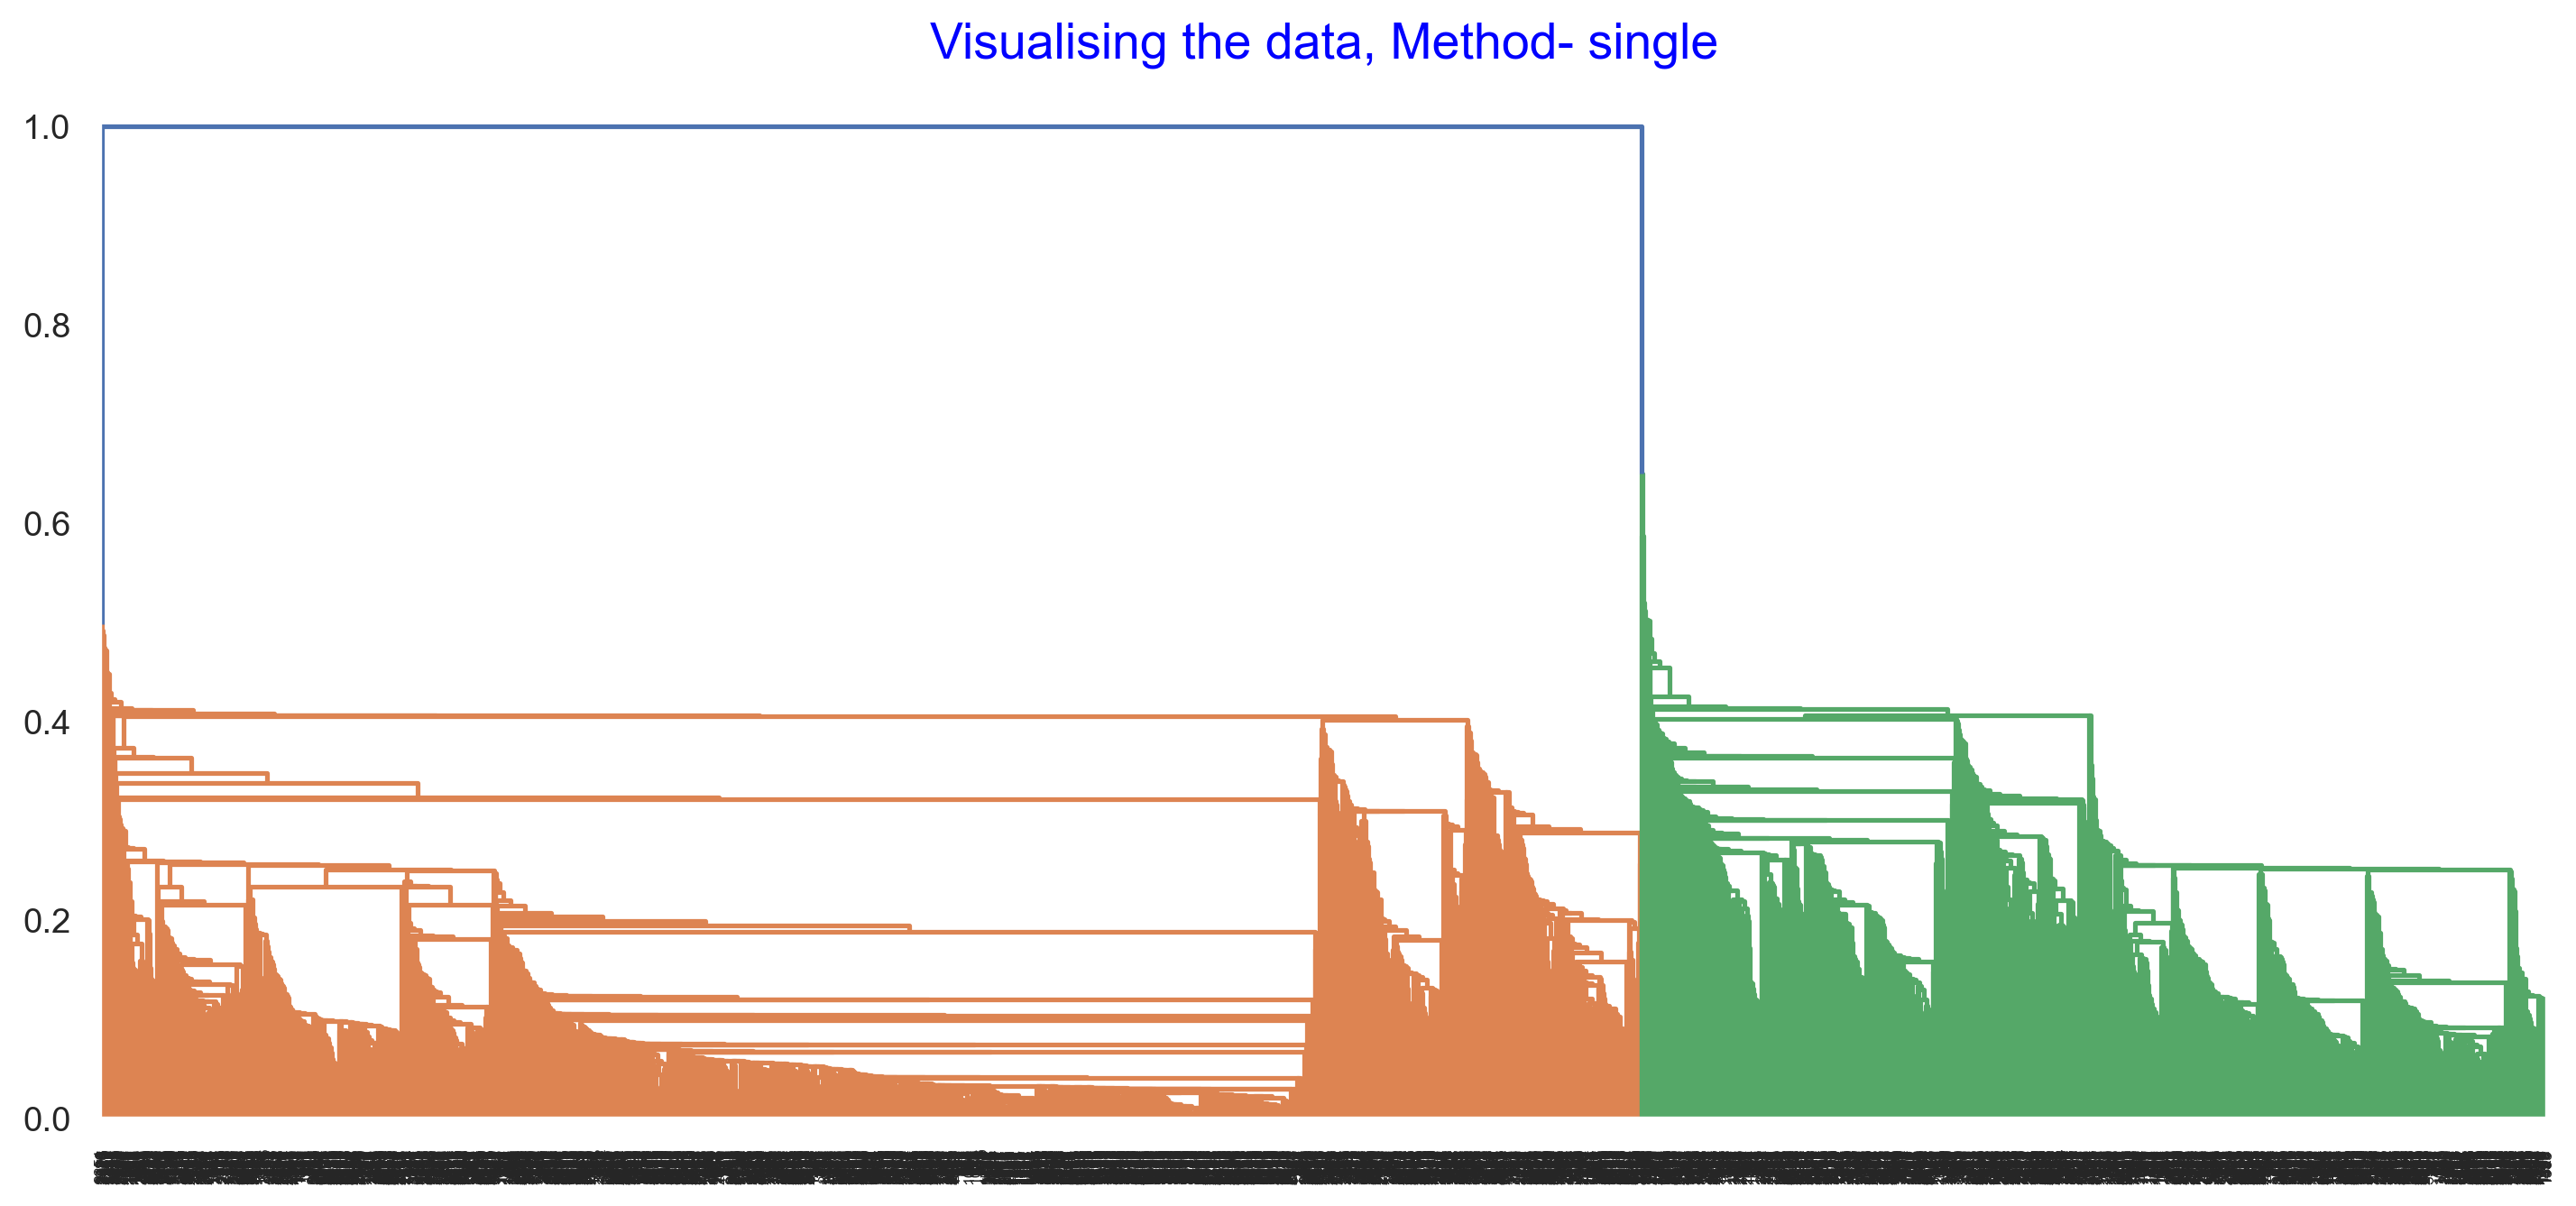

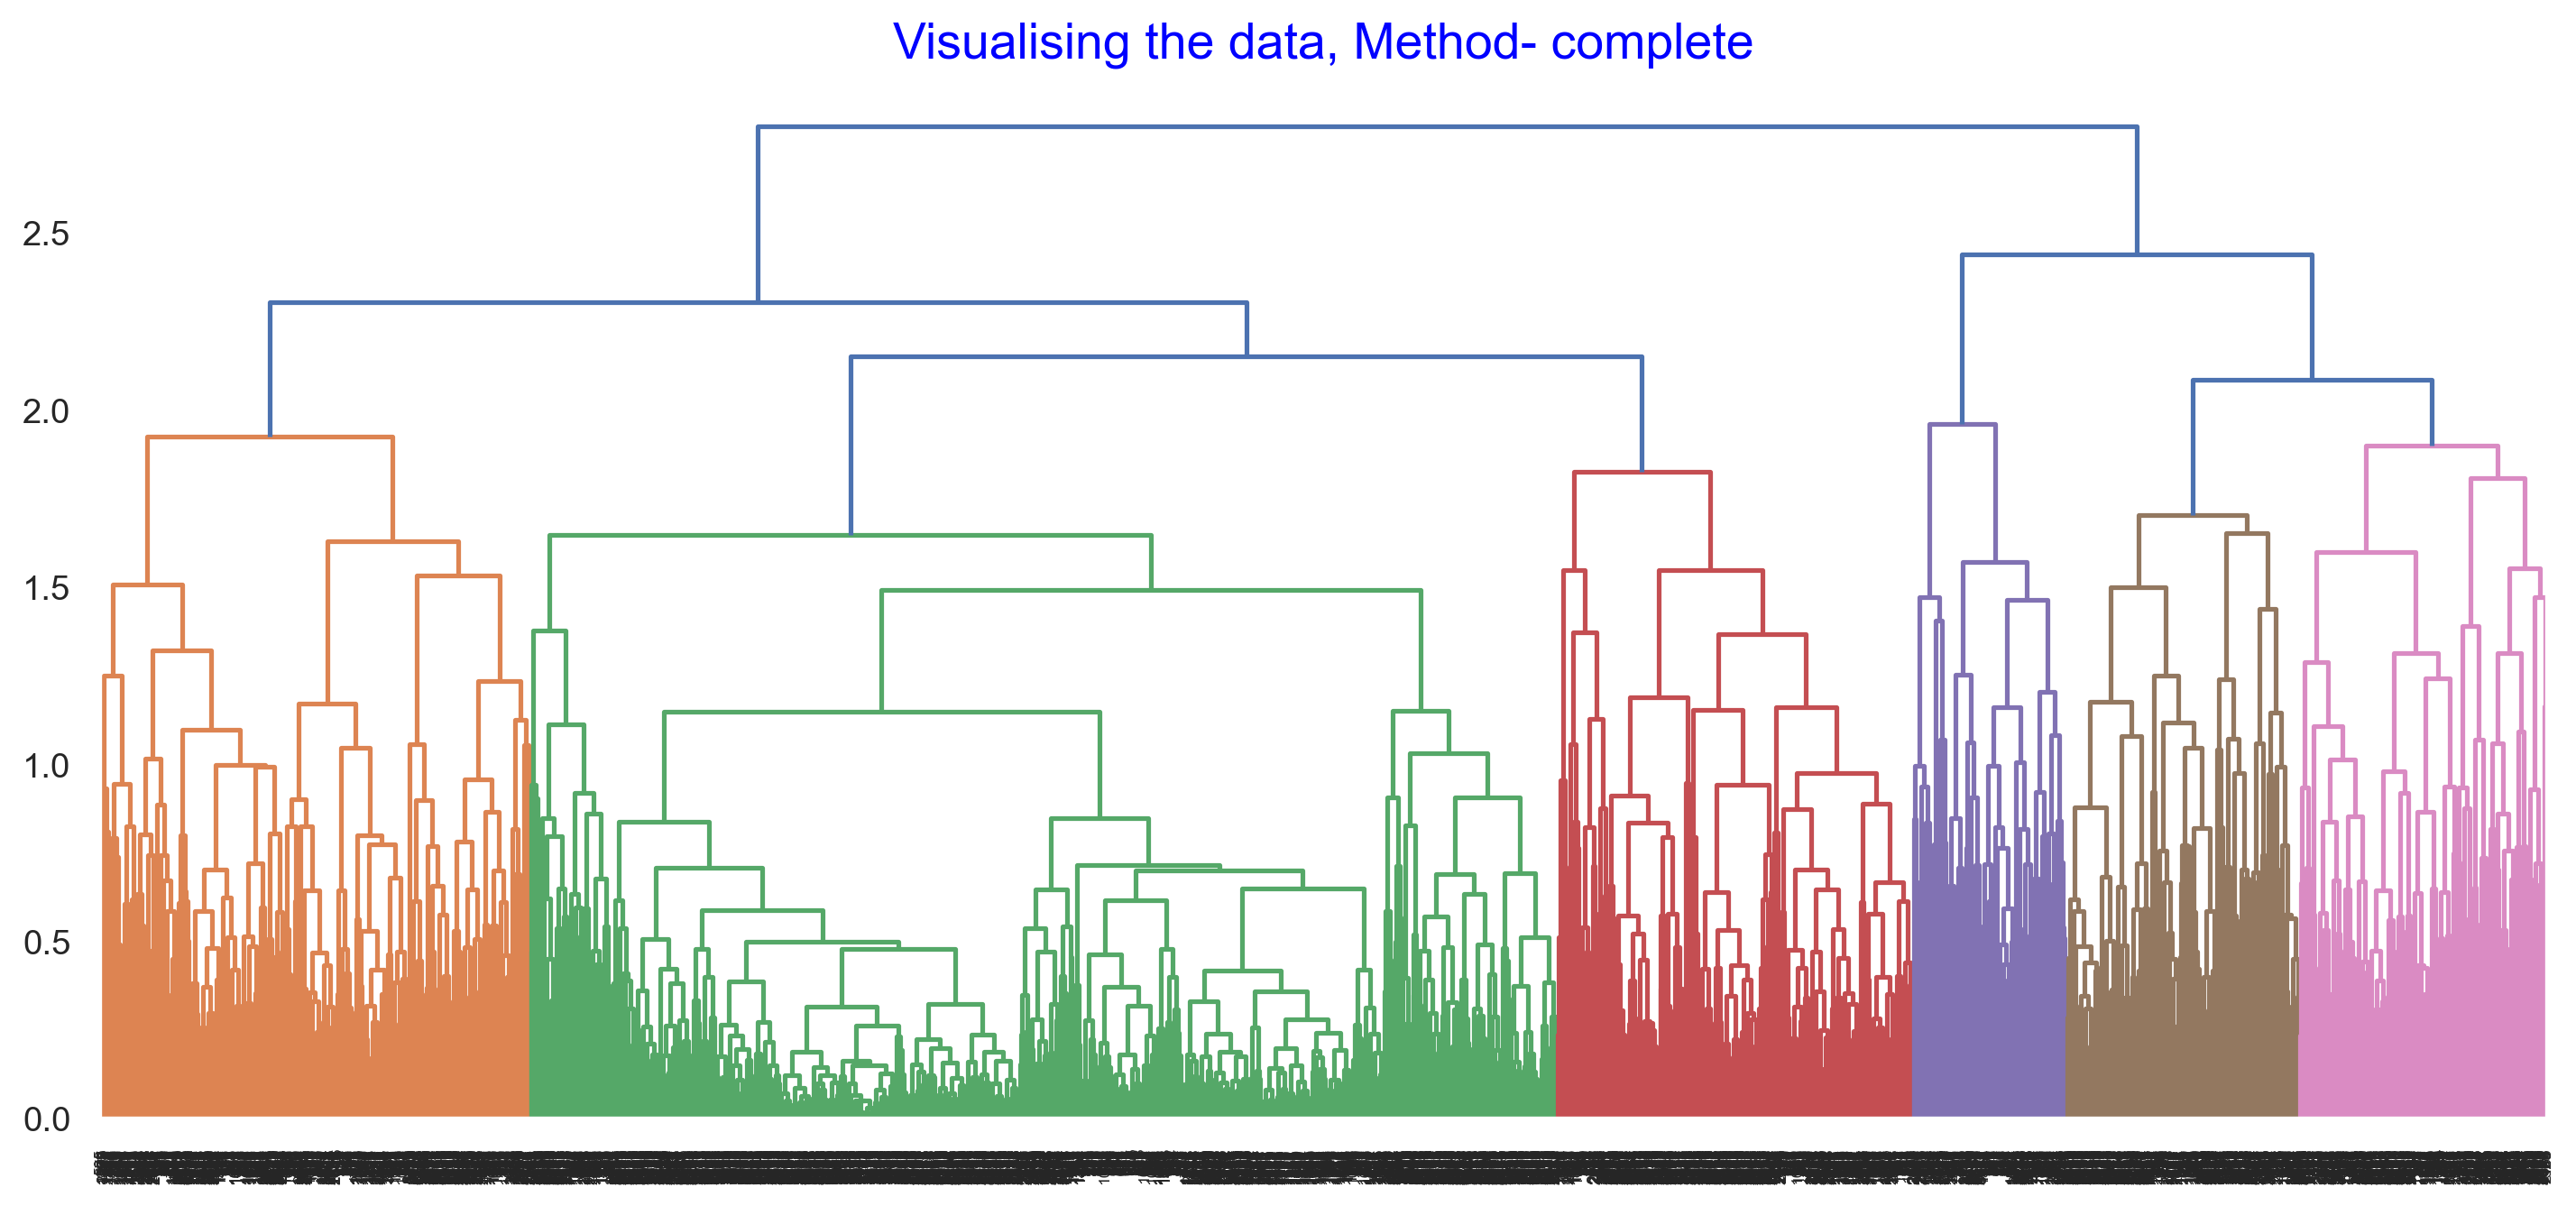

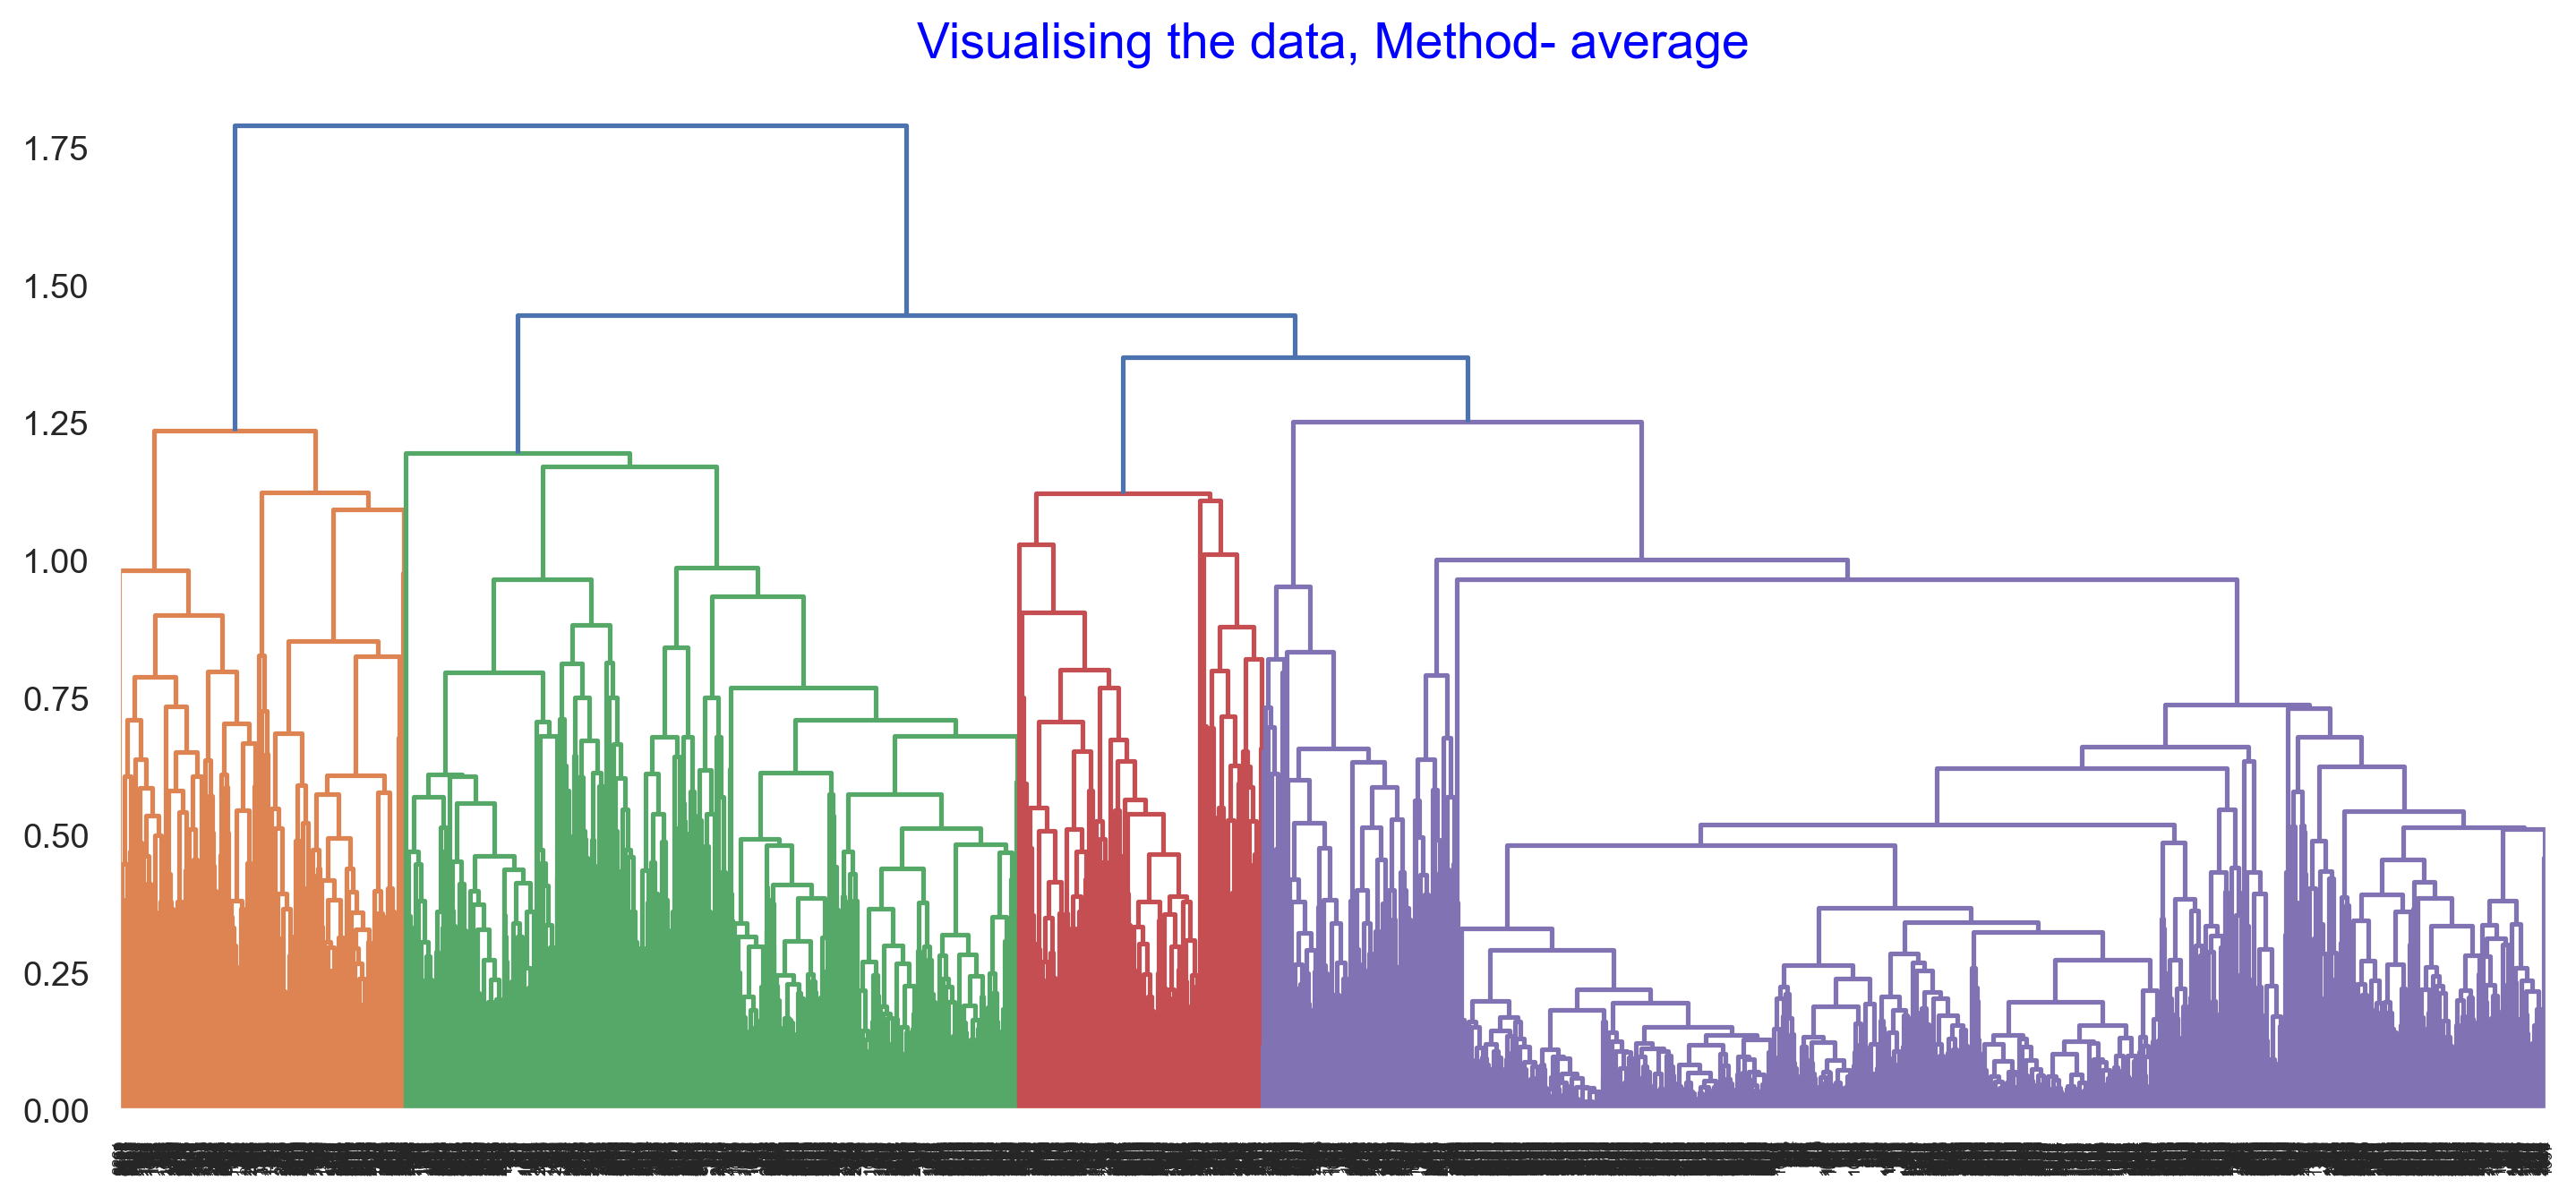

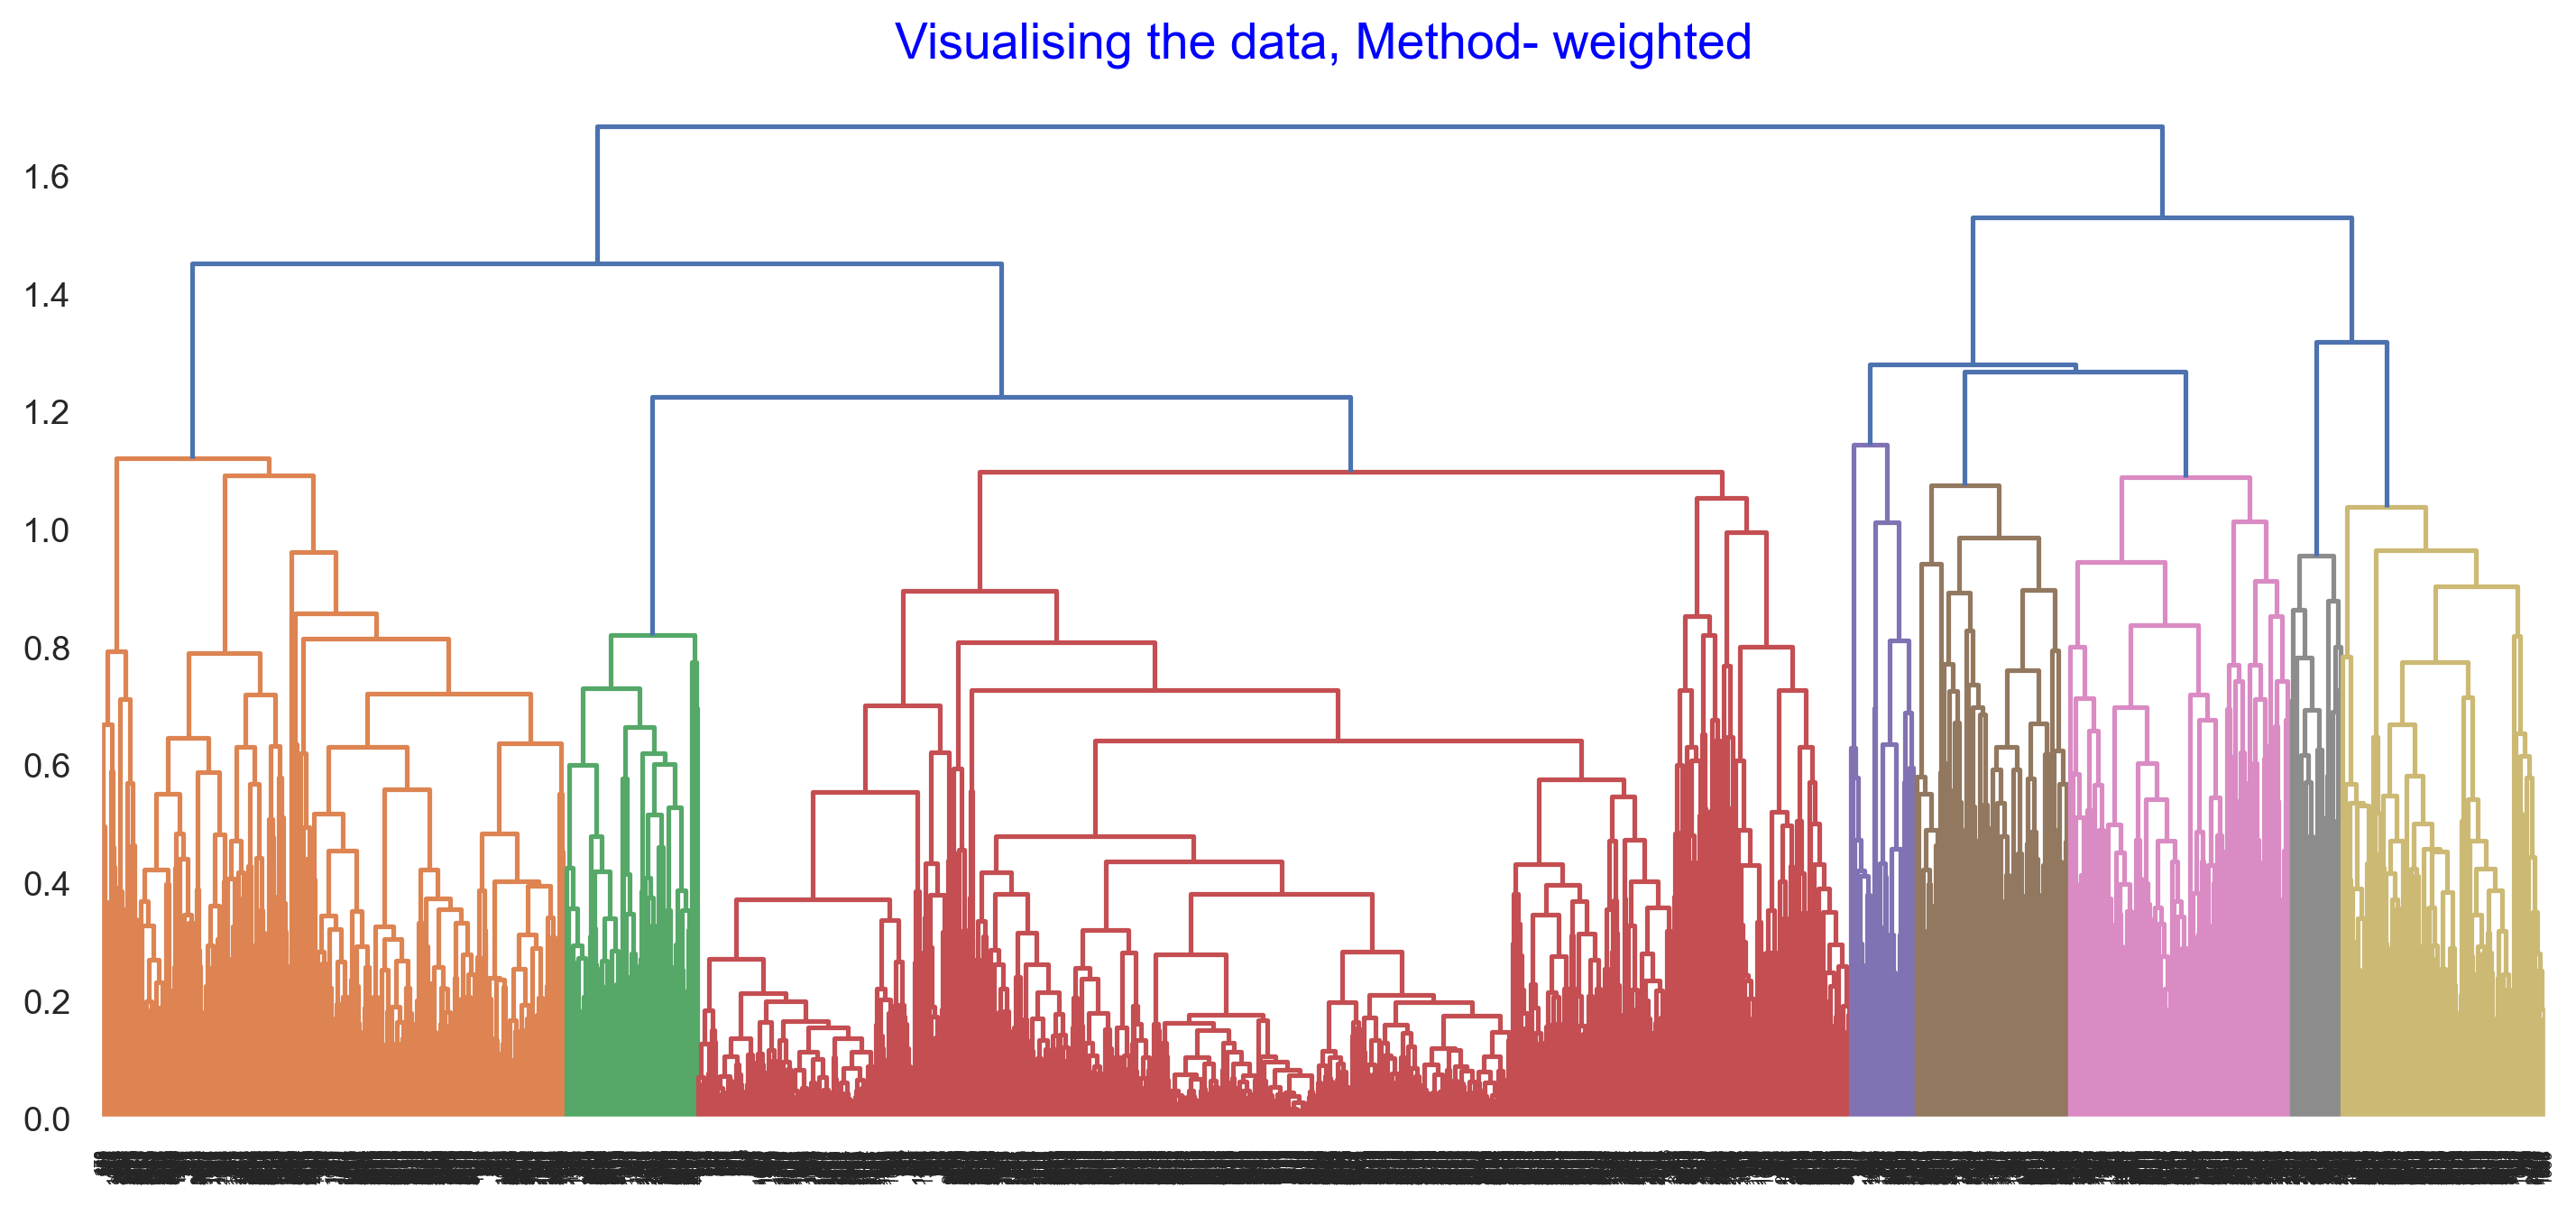

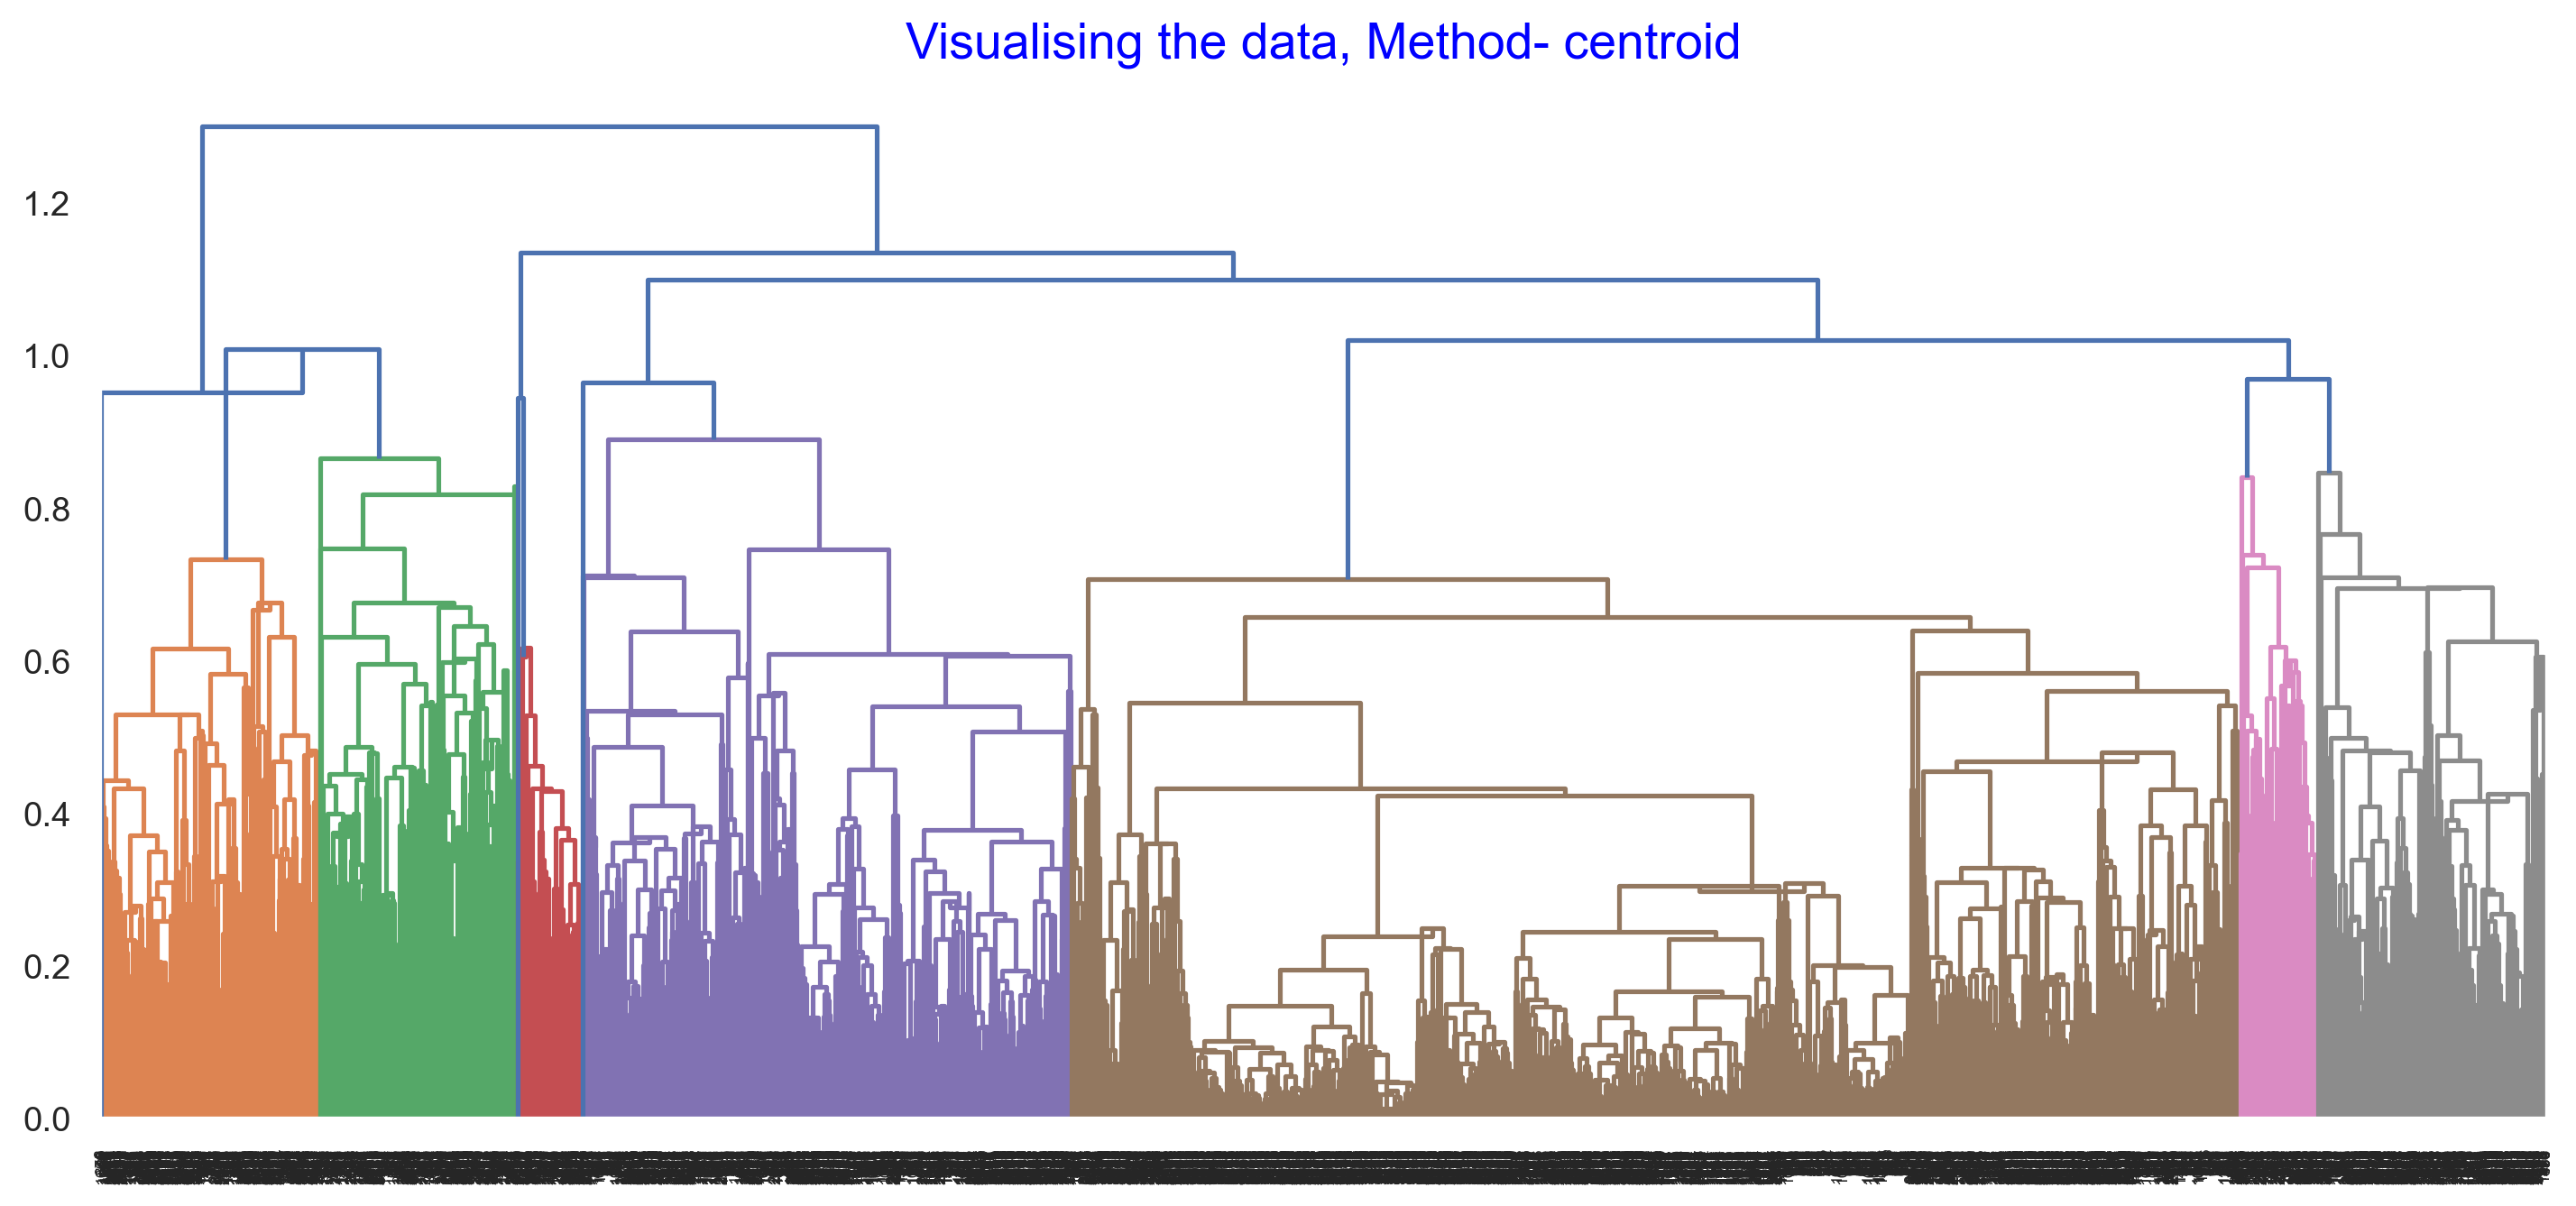

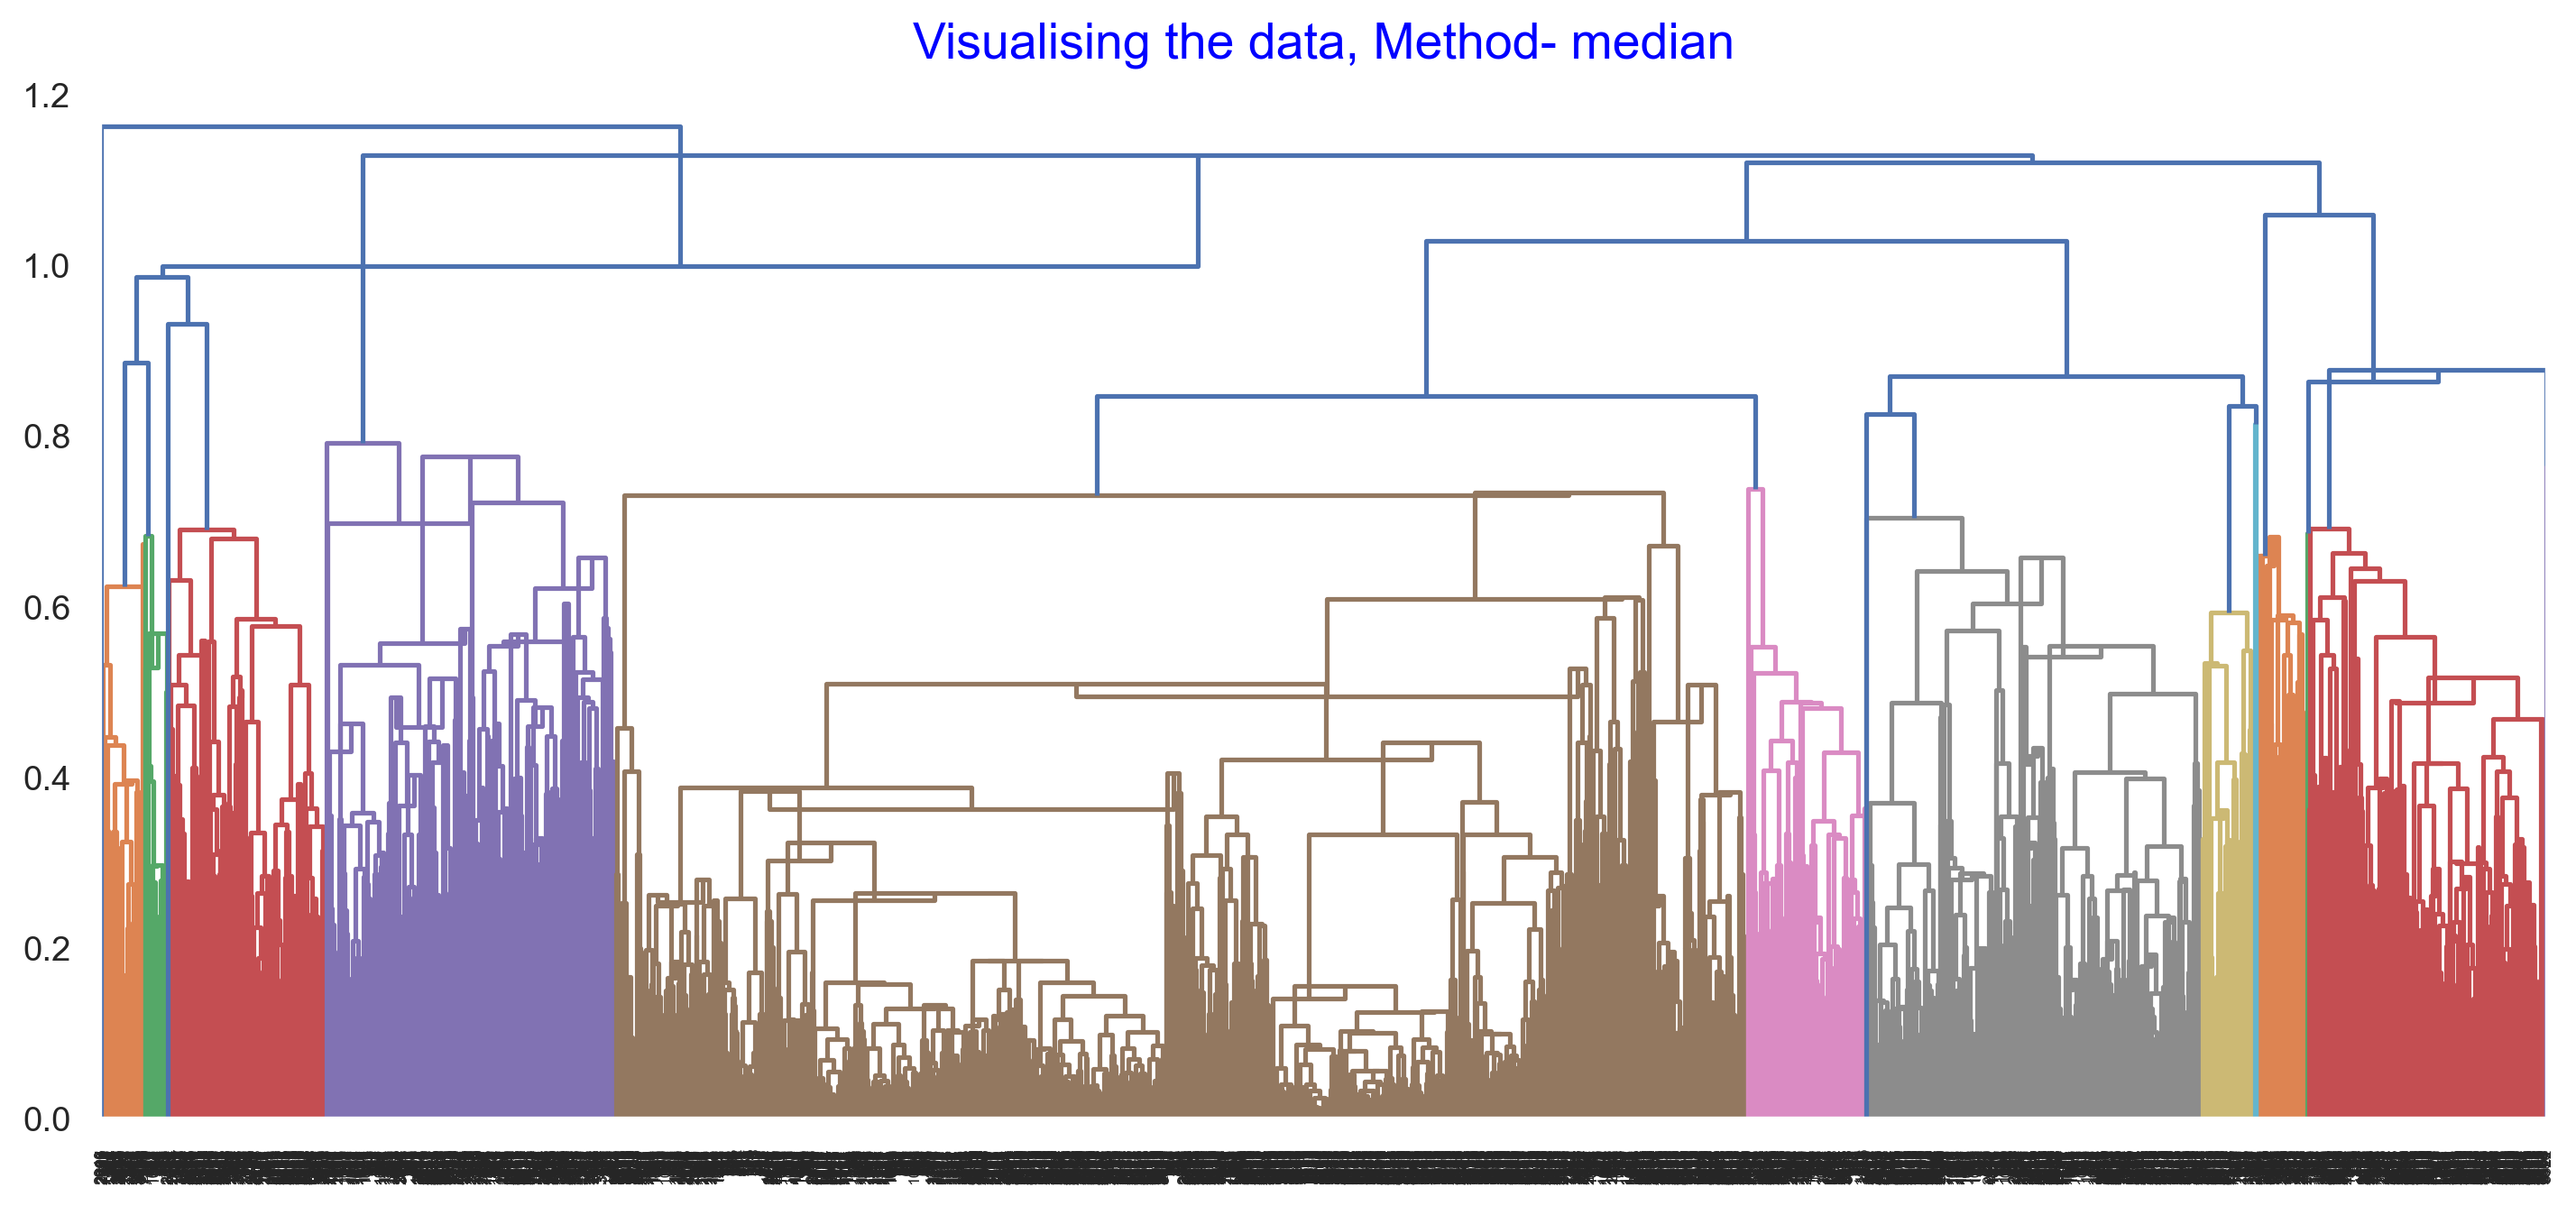

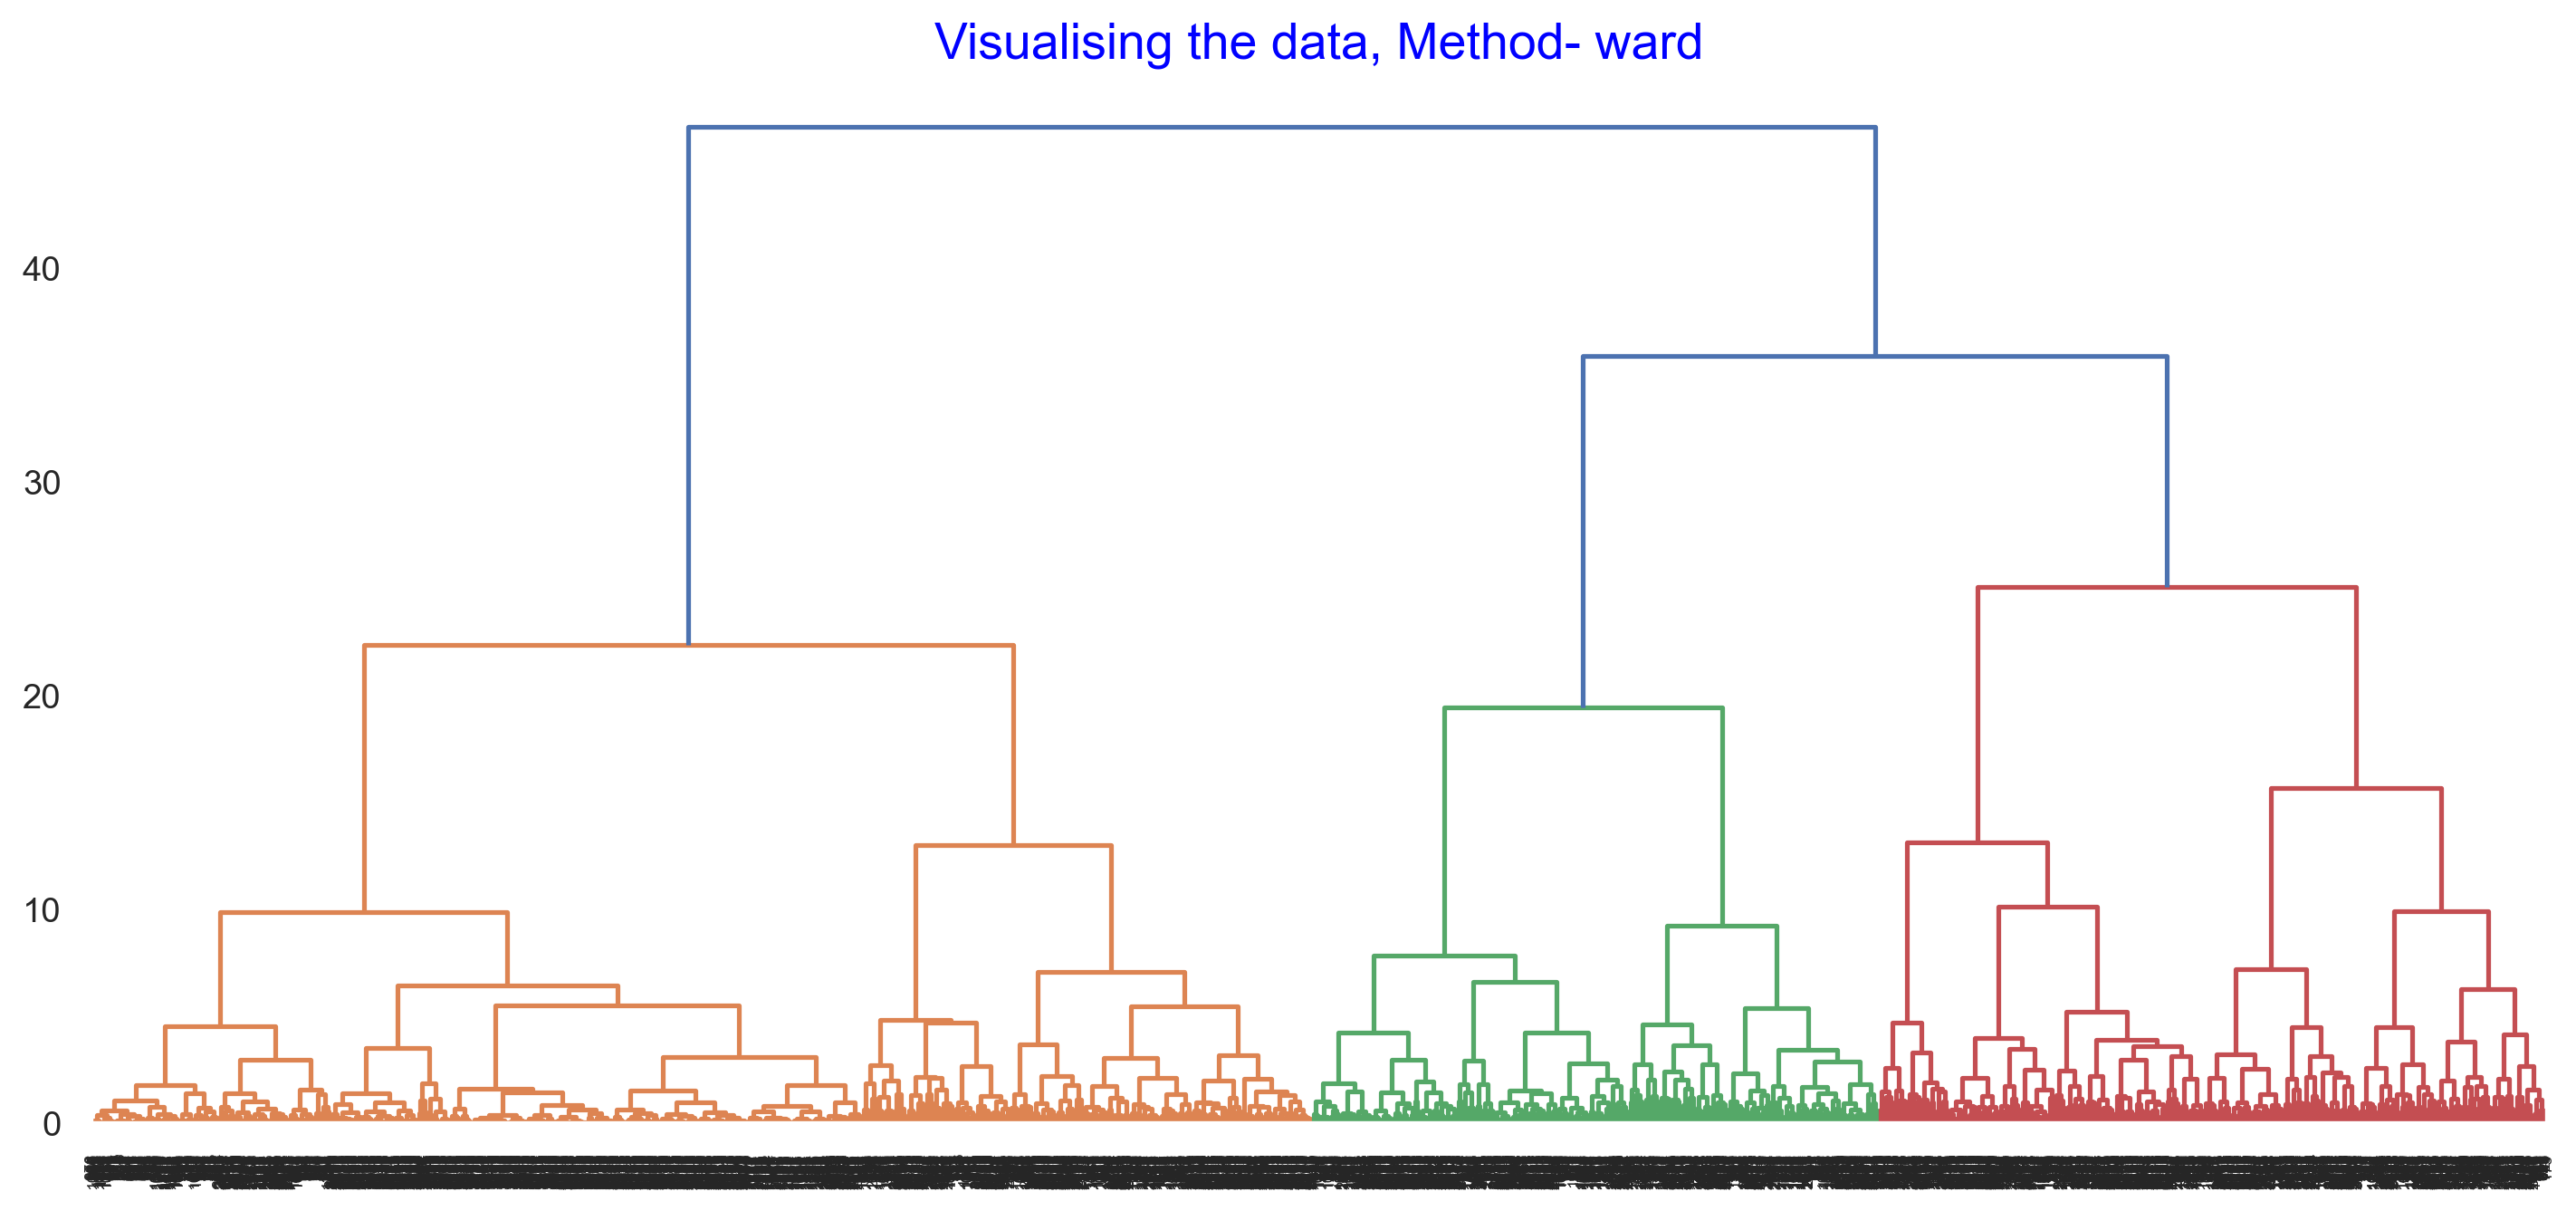

In [21]:
#Running a for loop to visualize which linkage type shows better cluster formation on normalized data.


for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))    
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_data, method = methods,optimal_ordering=False))

In [22]:
#Running a cluster to get the number of cluster and its silhouette score.
#Silhouette score range within -1 to 1 . -1 or value close to it indicates worst cluster and silhouette score 1 or close to 1 indicate best cluster.

clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for cluster in clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hierarchy_cluster1 = AgglomerativeClustering(n_clusters=cluster,linkage=linkages) # bydefault it takes linkage 'ward'
        labels1 = hierarchy_cluster1.fit_predict(norm_data)
        silhouette_score1 = silhouette_score(norm_data, labels1)
        print("For clusters =", cluster,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1.round(2))
    print()

For clusters = 2 The average silhouette_score with linkage- ward : 0.3
For clusters = 2 The average silhouette_score with linkage- complete : 0.35
For clusters = 2 The average silhouette_score with linkage- average : 0.35
For clusters = 2 The average silhouette_score with linkage- single : 0.36

For clusters = 3 The average silhouette_score with linkage- ward : 0.35
For clusters = 3 The average silhouette_score with linkage- complete : 0.31
For clusters = 3 The average silhouette_score with linkage- average : 0.34
For clusters = 3 The average silhouette_score with linkage- single : 0.29

For clusters = 4 The average silhouette_score with linkage- ward : 0.36
For clusters = 4 The average silhouette_score with linkage- complete : 0.28
For clusters = 4 The average silhouette_score with linkage- average : 0.38
For clusters = 4 The average silhouette_score with linkage- single : 0.24

For clusters = 5 The average silhouette_score with linkage- ward : 0.3
For clusters = 5 The average silhoue

### Creating hierarchical cluster with normalised data because the silhouette score obtained with normalized data is 0.38 for  average linakge and 4 number of cluster which is greater than that obtained with standardised data.

In [23]:
Agg_Clust = AgglomerativeClustering(n_clusters=4, linkage='average')
ypred = Agg_Clust.fit_predict(norm_data)
print(ypred.shape)
ypred

(3999,)


array([0, 0, 0, ..., 2, 3, 0], dtype=int64)

In [24]:
Agg_Clust.n_clusters_

4

In [25]:
(silhouette_score(norm_data, Agg_Clust.labels_)*100).round(2)

37.6

In [26]:
df['Hierarchical_labels'] = ypred

In [27]:
df.groupby('Hierarchical_labels').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_labels                                                    
0                     52459.939627         0.0   1.721172        1.0   
1                    106842.286547         0.0   2.563559        1.0   
2                     62783.009663         0.0   2.707631        1.0   
3                     75193.846393         0.0   1.621891        1.0   

                     cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_labels                                                            
0                          1.0   9879.551867     8.721645          14.402647   
1                          1.0  27630.145127    19.934322         732.643008   
2                          1.0  23324.599108    13.397423          83.917245   
3                          1.0  10314.505597    11.166667         624.598259   

                     Flight_trans_12  Days_since_enroll  Award  
Hierarchical_labels                                             
0                           0.070652        3807.820416    0.0  
1                           2.340042        4876.891949    1.0  
2                           0.316155        4507.258672    1.0  
3                           1.971393        3888.194030    0.0

### The  clustering for dataset using hierarchical clustering has been done. The final hierarchical cluster consists of 4 cluster with a silhouette score of 0.38.

## Kmeans Clustering

### Kmeans clustering on standard data to obtain number of cluster from elbow graph

In [28]:
#Running a loop to get number of cluster and its weighted sum of square values to decide optimum number of cluster.

cluster_range = range(1,15)
cluster_errors = []
for cluster in cluster_range:
    clusters = KMeans(cluster,n_init=10)
    clusters.fit(std_data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

Num_Clusters  Cluster_Errors
0              1    31992.000000
1              2    22258.774284
2              3    17645.518652
3              4    15198.288618
4              5    13695.095791
5              6    12408.106089
6              7    11369.939007
7              8    10667.643001
8              9    10036.506646
9             10     9576.897184
10            11     9080.893316
11            12     8681.332714
12            13     8330.978291
13            14     8107.761894

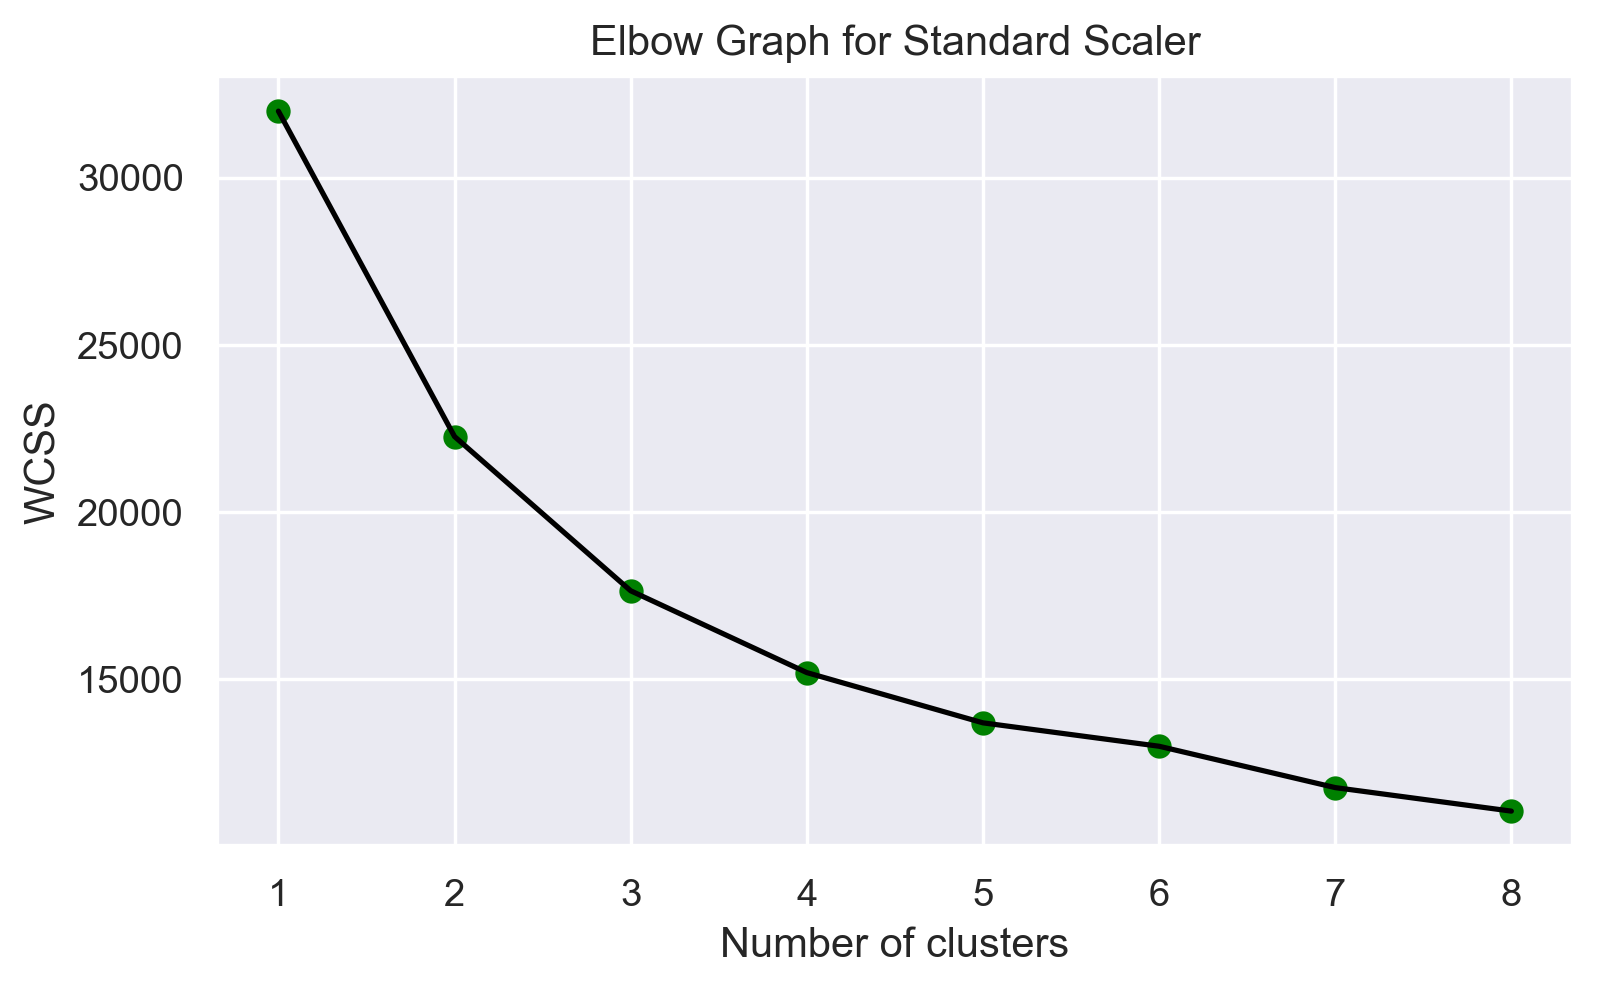

In [29]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='green')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
sil_scores = [] # silhouette scores

for n in n_clusters:
    KM = KMeans(n_clusters=n, init='k-means++').fit(std_data)
    clusters_inertia.append(KM.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_data, KM.labels_)
    sil_scores.append(silhouette_avg) # data for the silhouette score method

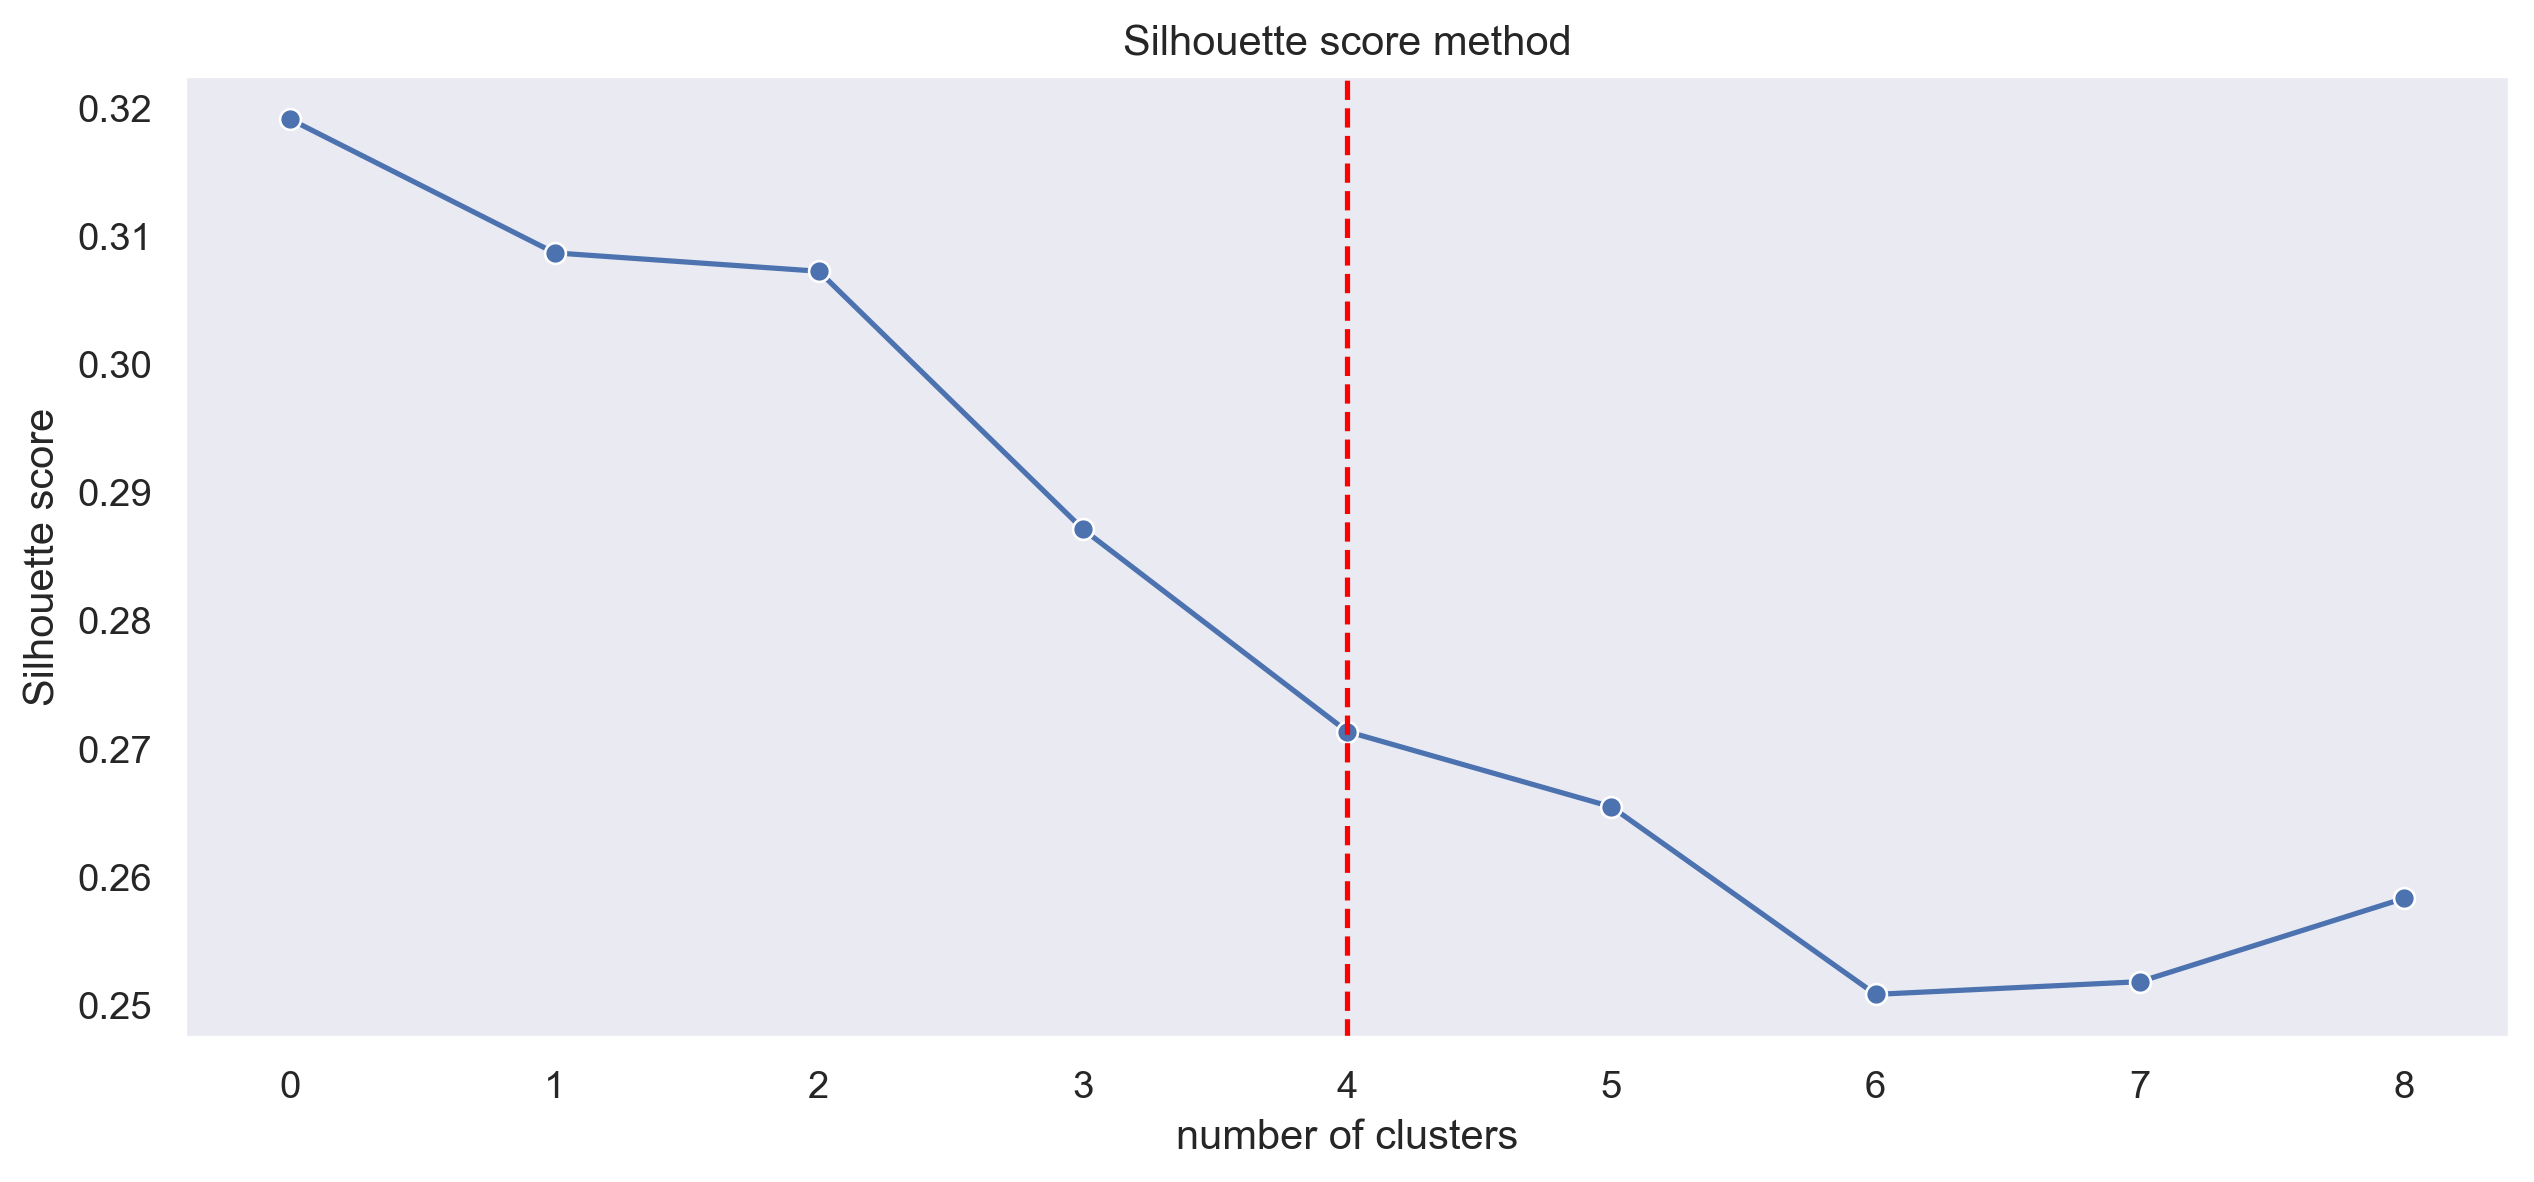

In [31]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(sil_scores,  marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

In [32]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for clusters in clust_list:
    cluster1 = KMeans(n_clusters=clusters, random_state=0)
    cluster_labels1 = cluster1.fit_predict(std_data)
    sil_score1= silhouette_score(std_data, cluster_labels1)
    print("For n_clusters =", clusters,"The average silhouette_score is :", sil_score1.round(2))

For n_clusters = 2 The average silhouette_score is : 0.32
For n_clusters = 3 The average silhouette_score is : 0.31
For n_clusters = 4 The average silhouette_score is : 0.26
For n_clusters = 5 The average silhouette_score is : 0.28
For n_clusters = 6 The average silhouette_score is : 0.28
For n_clusters = 7 The average silhouette_score is : 0.26
For n_clusters = 8 The average silhouette_score is : 0.25
For n_clusters = 9 The average silhouette_score is : 0.25


In [33]:
KM = KMeans(n_clusters=2, random_state=0, init='k-means++')
ypred_KM = KM.fit_predict(std_data)
ypred_KM.shape
ypred_KM

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
KM.cluster_centers_

array([[-0.40603218,  0.        , -0.53879931,  0.        ,  0.        ,
        -0.56263588, -0.46555631, -0.30287177, -0.29391971, -0.20871899,
        -0.3501873 ],
       [ 0.74147502,  0.        ,  0.98392751,  0.        ,  0.        ,
         1.02745663,  0.85017492,  0.55308879,  0.53674101,  0.38115185,
         0.63949399]])

In [35]:
KM.inertia_

22258.97911067211

## Assigning cluster to dataset

In [36]:
df['KM_lables'] = ypred_KM

In [37]:
df.groupby('KM_lables').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KM_lables                                                               
0           39976.498742         0.0   1.316299        1.0        1.0   
1          107169.123058         0.0   3.415254        1.0        1.0   

            Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KM_lables                                                                  
0           5234.069783     7.219125          89.017034         0.314557   
1          33974.512535    19.225989         340.475636         1.096751   

           Days_since_enroll     Award  Hierarchical_labels  
KM_lables                                                    
0                3688.823848  0.200929             0.688734  
1                4902.462571  0.679379             1.353814

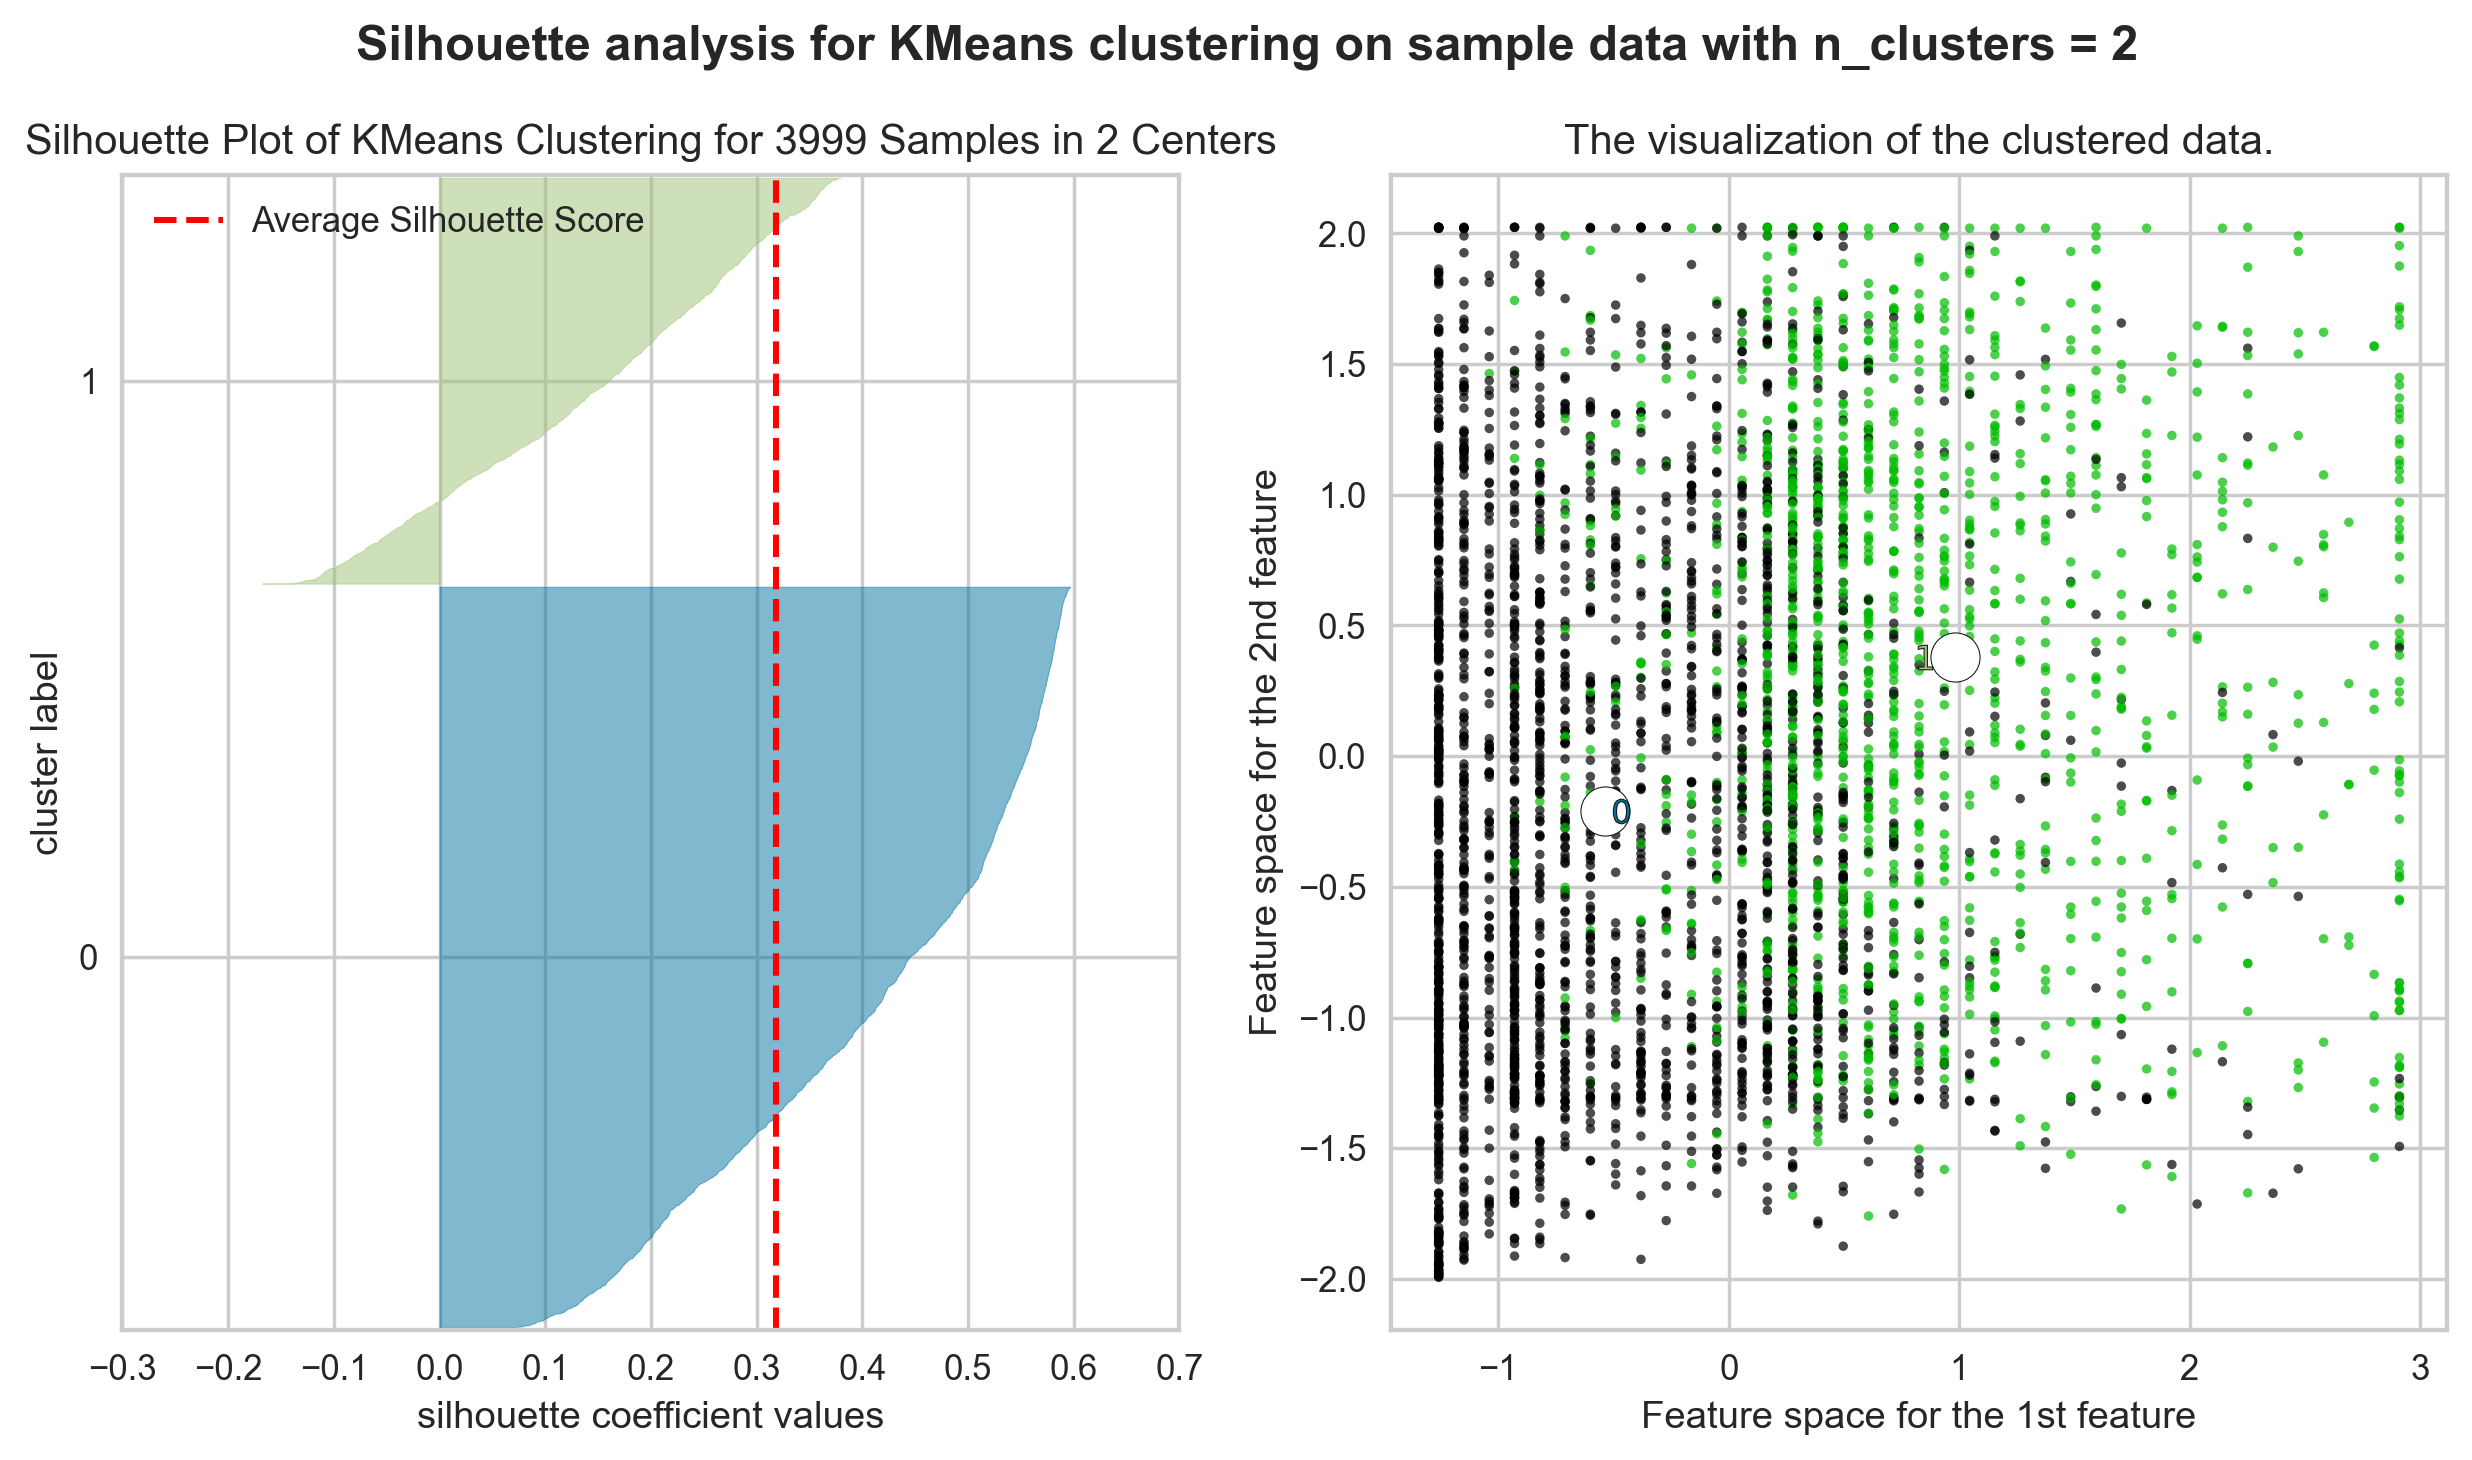

In [38]:
#Visualizing the cluster formation.

from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(KM,ax= ax1, colors='yellowbrick')
sil_visualizer1.fit(std_data)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(KM.labels_.astype(float) / 2) # 6 is number of clusters
ax2.scatter(std_data[:, 6], std_data[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = KM.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 2], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

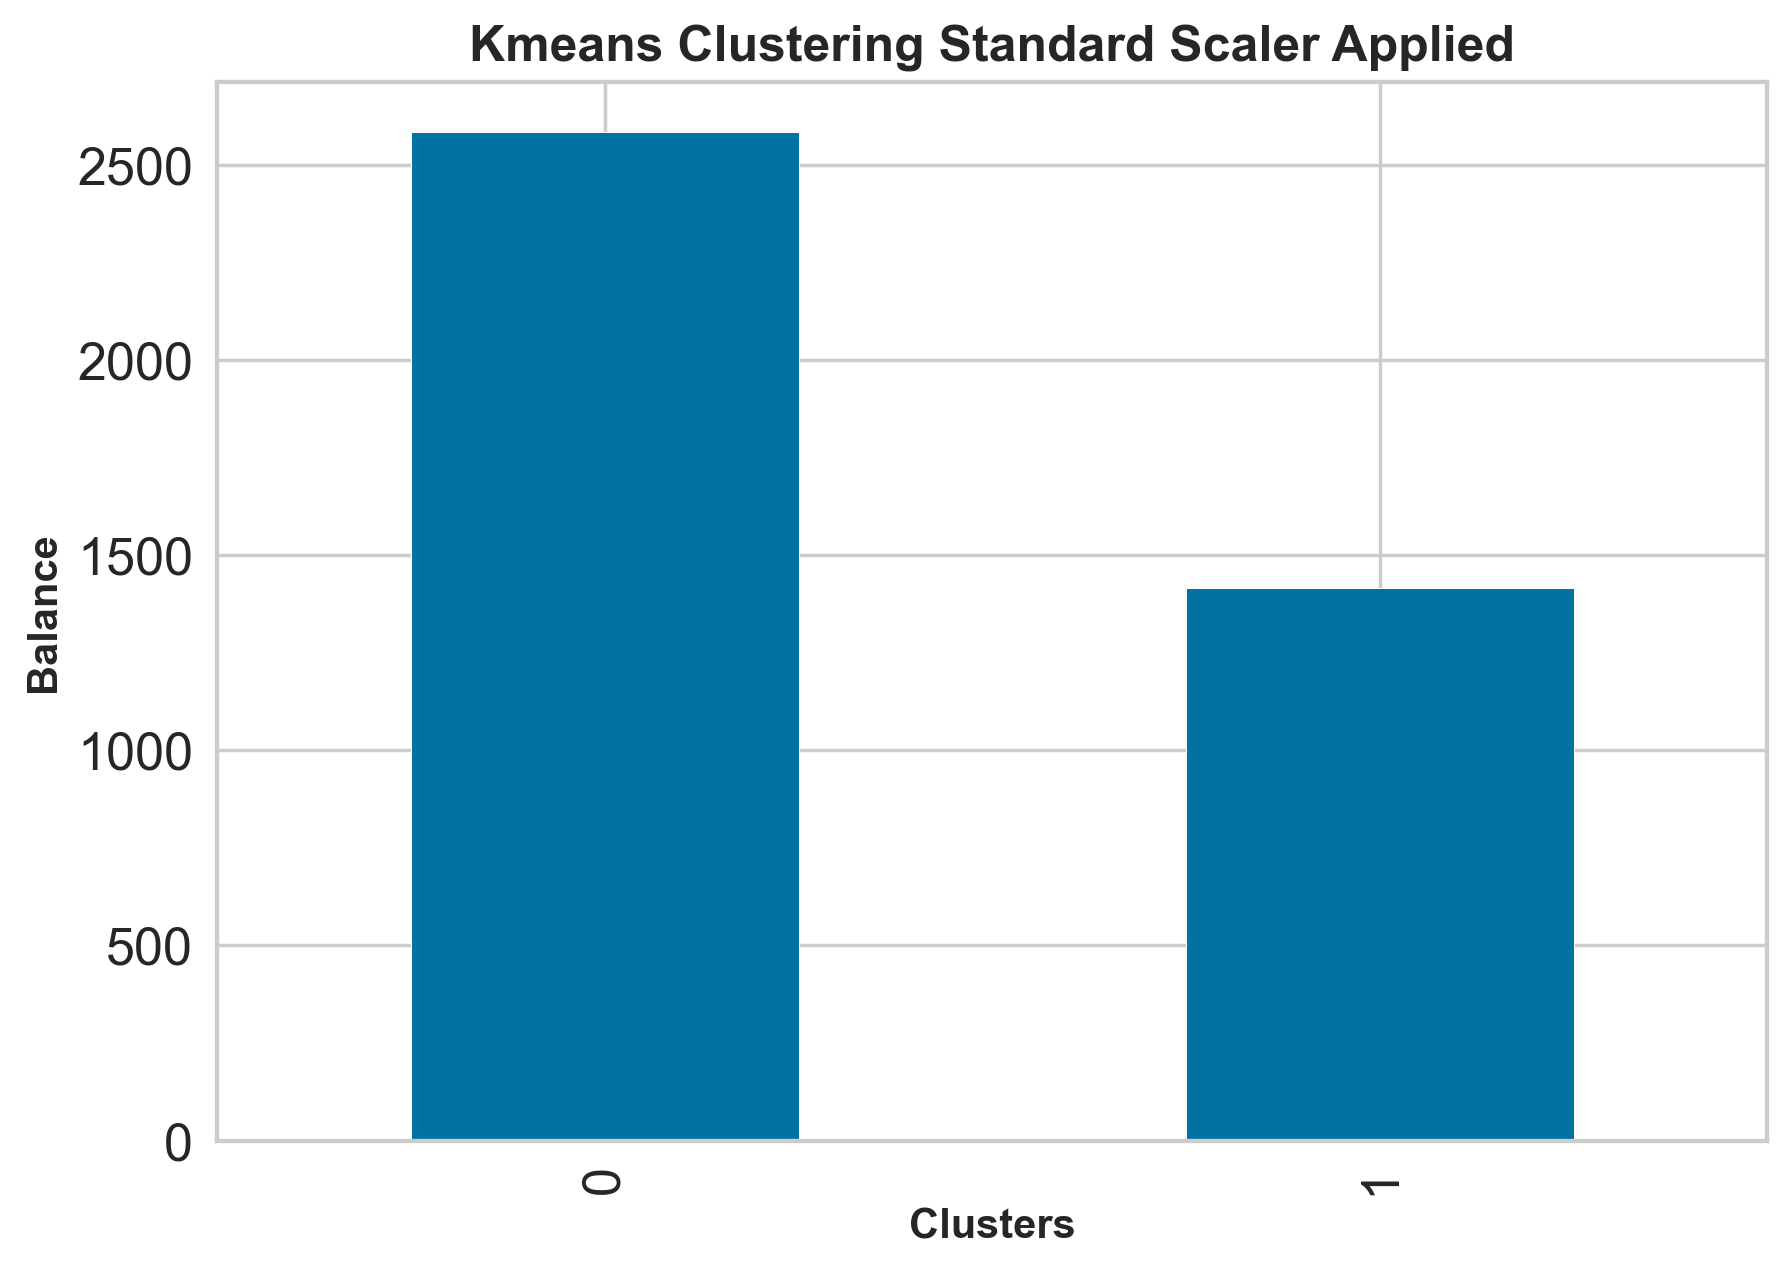

In [39]:
fig, ax = plt.subplots()
df.groupby(['KM_lables']).count()['Balance'].plot(kind='bar')
plt.ylabel('Balance')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('Balance', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## Creating KMeans clustering on Normalised data

In [40]:
cluster_range = range(1,15)
cluster_errors = []
for clusters in cluster_range:
    clusters = KMeans(clusters,n_init=10)
    clusters.fit(norm_data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

Num_Clusters  Cluster_Errors
0              1     3756.095928
1              2     2540.357378
2              3     1894.148191
3              4     1572.564631
4              5     1317.629332
5              6     1142.580910
6              7      995.886326
7              8      921.744551
8              9      865.723746
9             10      813.941497
10            11      771.990444
11            12      737.816446
12            13      707.515294
13            14      682.203213

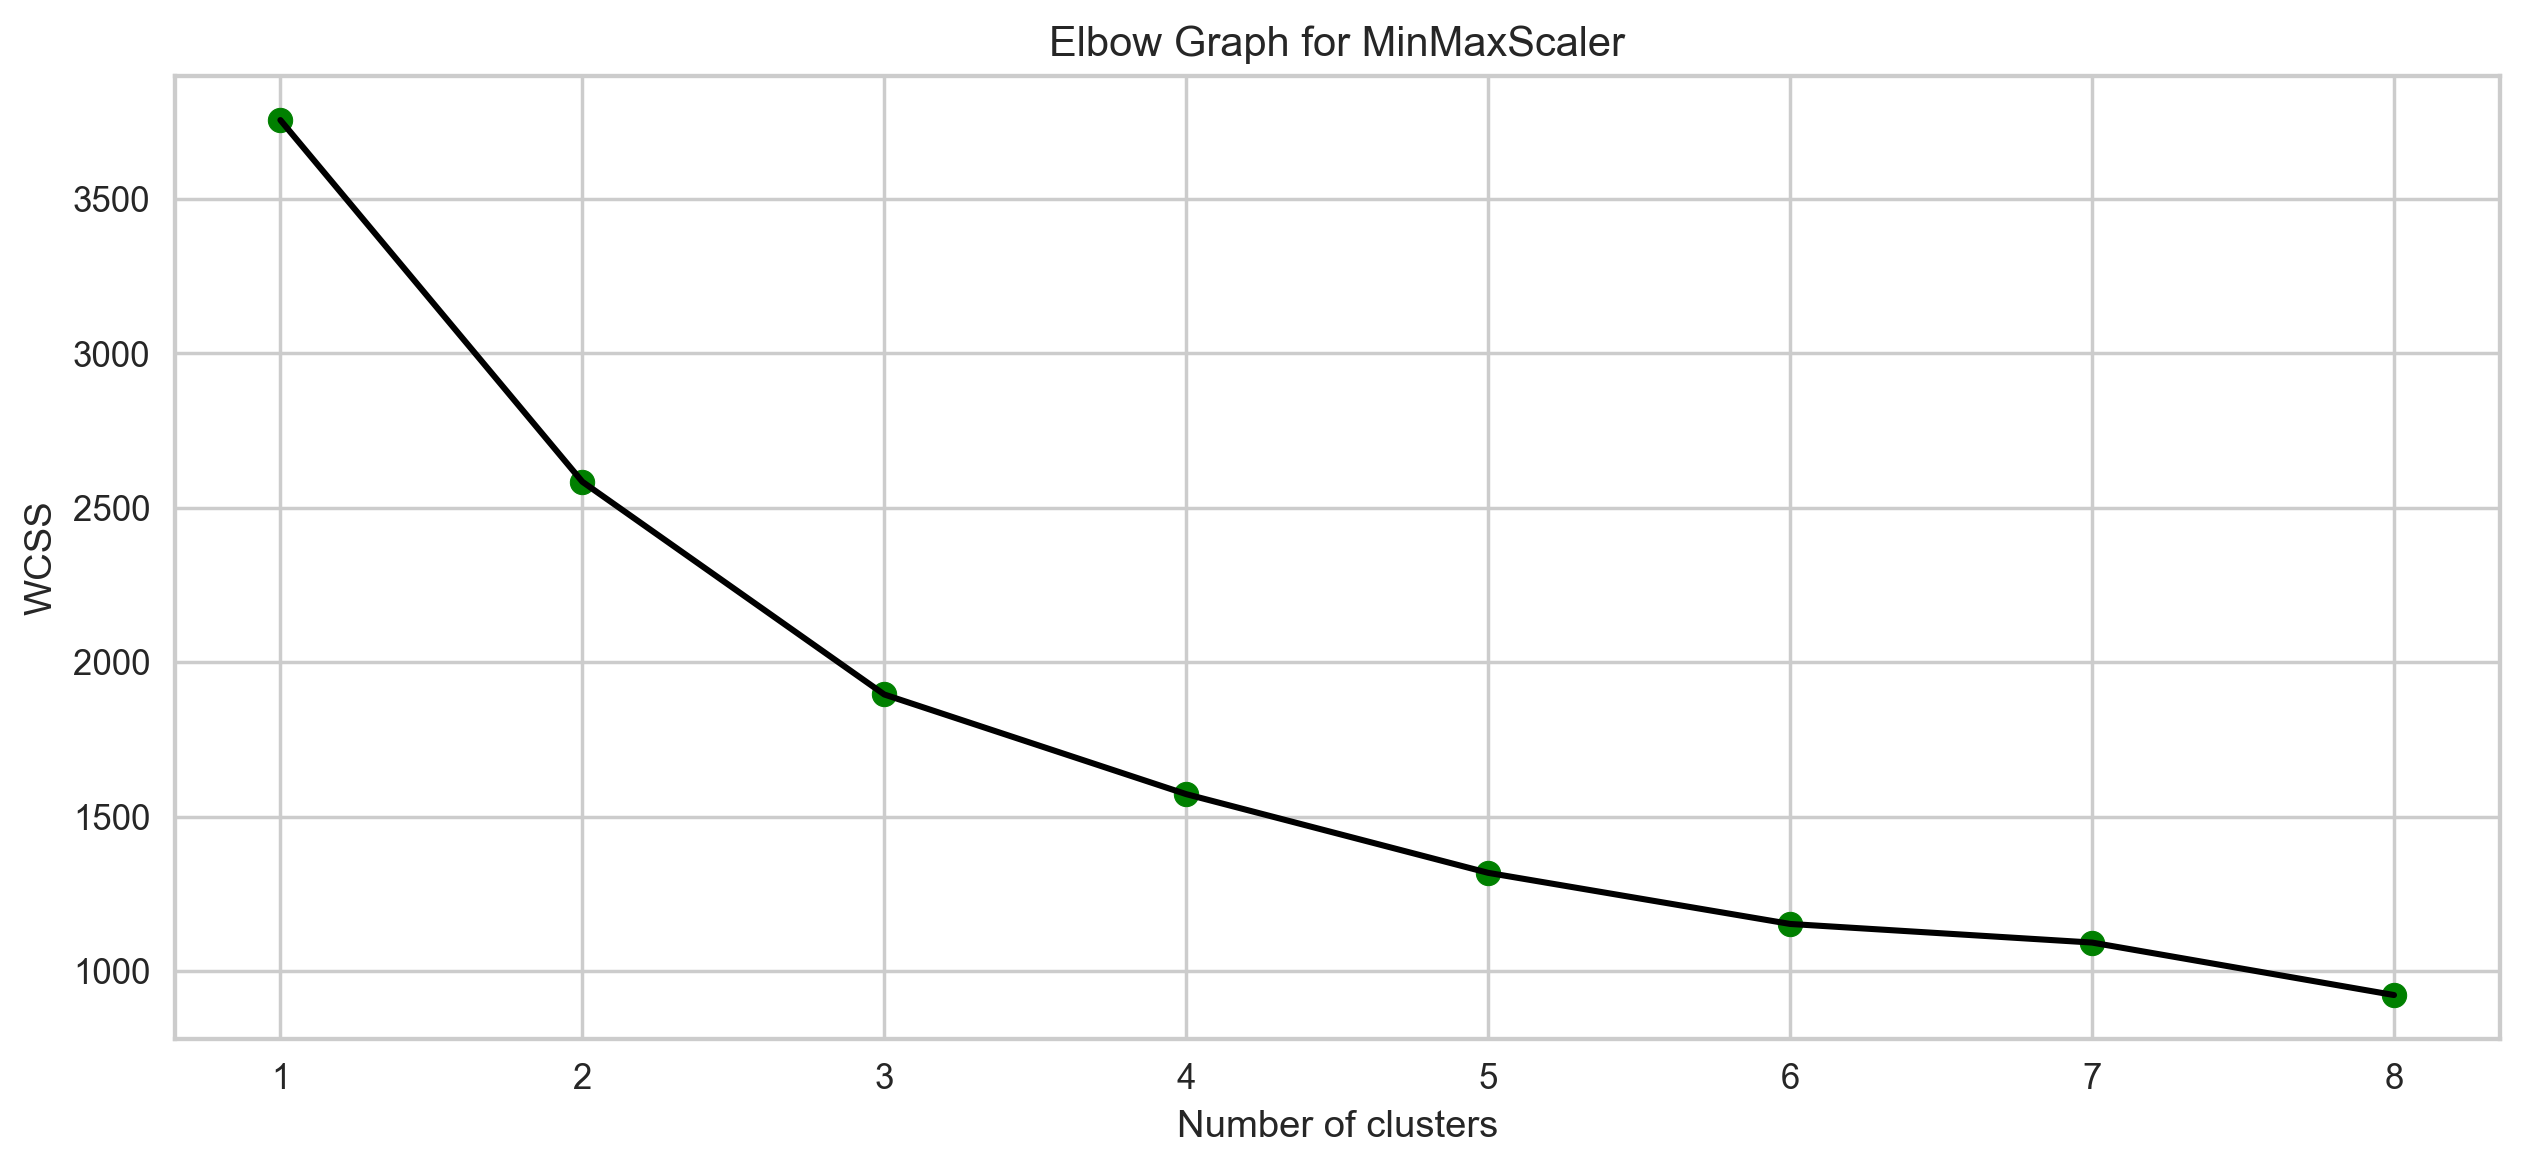

In [41]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(range(1,9), wcss,color = 'black')
plt.scatter(range(1,9), wcss,color='green')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

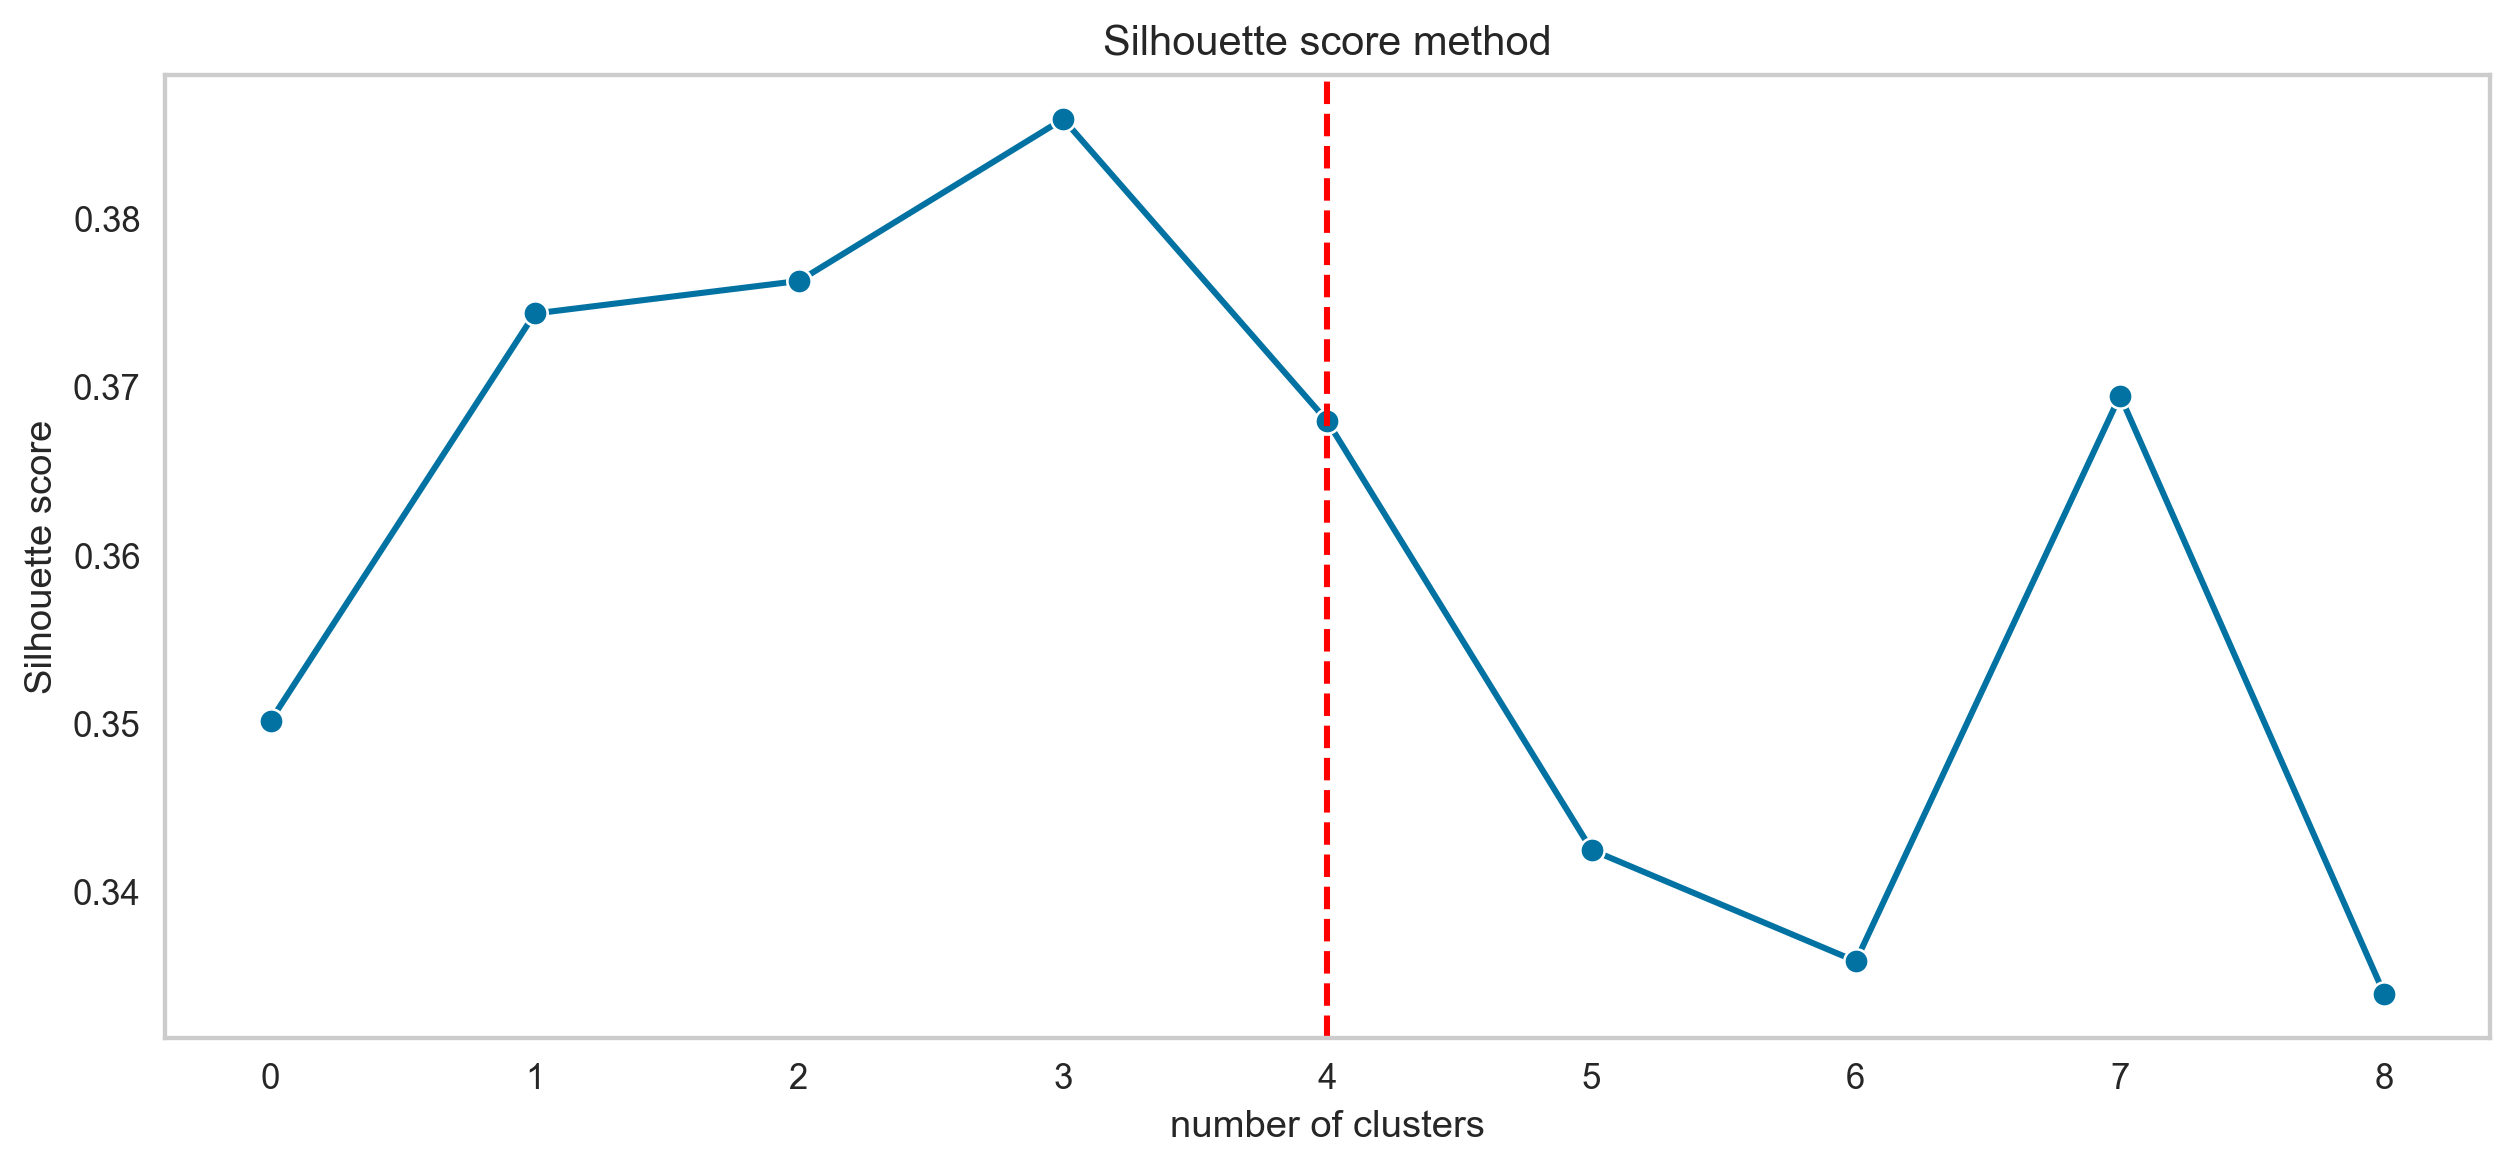

In [42]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
sil_scores = [] # silhouette scores

for n in n_clusters:
    KM = KMeans(n_clusters=n, init='k-means++').fit(norm_data)
    clusters_inertia.append(KM.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(norm_data, KM.labels_)
    sil_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot( sil_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

In [43]:
clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for MinMaxScaler Applied on data .
for clusters in clust_list:
    cluster1 = KMeans(n_clusters=clusters, random_state=0)
    cluster_labels1 = cluster1.fit_predict(norm_data)
    sil_score1= silhouette_score(norm_data, cluster_labels1)
    print("For n_clusters =", clusters,"The average silhouette_score is :", sil_score1.round(2))

For n_clusters = 2 The average silhouette_score is : 0.36
For n_clusters = 3 The average silhouette_score is : 0.37
For n_clusters = 4 The average silhouette_score is : 0.38
For n_clusters = 5 The average silhouette_score is : 0.37
For n_clusters = 6 The average silhouette_score is : 0.38
For n_clusters = 7 The average silhouette_score is : 0.39
For n_clusters = 8 The average silhouette_score is : 0.38
For n_clusters = 9 The average silhouette_score is : 0.33


Elbow Plot for Normalization data


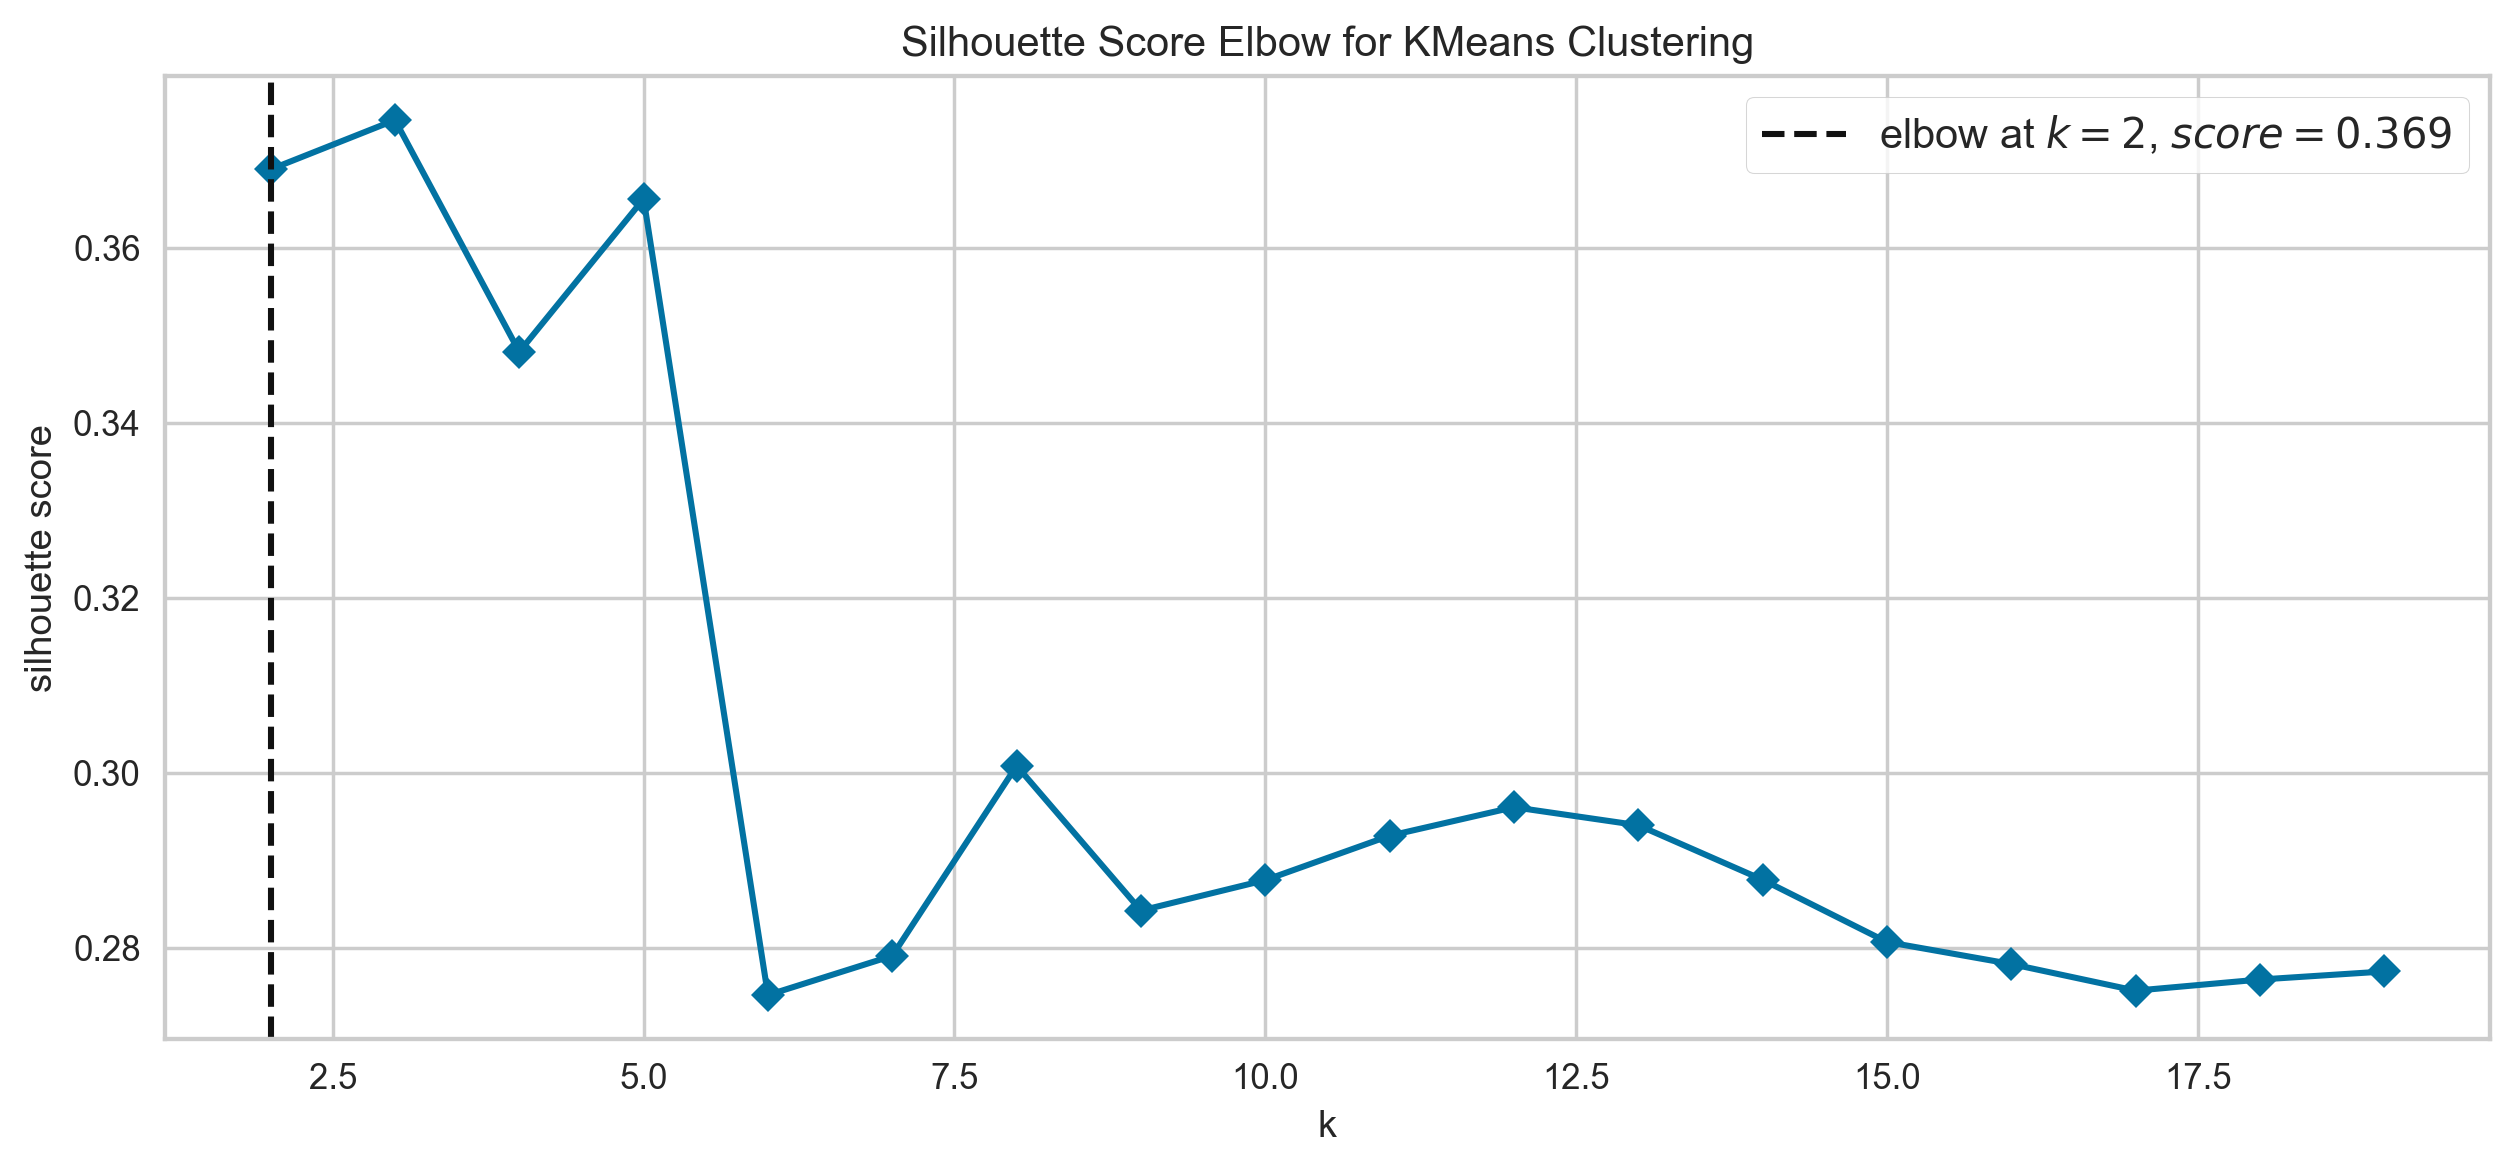

In [44]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=10, max_iter=500, init='k-means++')
plt.subplots(figsize=(12,5))
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Normalization data')
visualizer.fit(norm_data)    
visualizer.poof()
plt.show()

### From the above hyperparameter tuning it is clear that the silhouette score obtained from from the normalised data is 0.38 for four  number  of clusters which is greater than that obtained for standardised data which is 0.33. There creating a kmeans model with four number of clusters on normalised data.

In [45]:
kmeans_model = KMeans(n_clusters=4, random_state=0)
ypred_kmeans = kmeans_model.fit_predict(norm_data)
ypred_kmeans.shape

(3999,)

In [46]:
ypred_kmeans

array([1, 1, 1, ..., 0, 3, 1])

In [47]:
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  28143.0         0.0        1.0        1.0        1.0        174.0   
1  19244.0         0.0        1.0        1.0        1.0        215.0   
2  41354.0         0.0        1.0        1.0        1.0       4123.0   
3  14776.0         0.0        1.0        1.0        1.0        500.0   
4  97752.0         0.0        4.0        1.0        1.0      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0          1.0                0.0              0.0             7000.0    0.0   
1          2.0                0.0              0.0             6968.0    0.0   
2          4.0                0.0              0.0             7034.0    0.0   
3          1.0                0.0              0.0             6952.0    0.0   
4         26.0              777.5              2.5             6935.0    1.0   

   Hierarchical_labels  KM_lables  
0                    0          0  
1                    0          0  
2                    0          0  
3                    0          0  
4                    1          1

In [48]:
df['KM_lables'] = ypred_kmeans

In [49]:
kmeans_model.cluster_centers_

array([[ 2.87680369e-01,  0.00000000e+00,  4.10211268e-01,
         0.00000000e+00,  0.00000000e+00,  3.80892179e-01,
         3.45348406e-01,  3.25543831e-02,  4.83568075e-02,
         5.46054844e-01,  1.00000000e+00],
       [ 2.47840827e-01,  0.00000000e+00,  1.68250951e-01,
         0.00000000e+00,  0.00000000e+00,  1.59489282e-01,
         2.23283970e-01,  1.54389740e-02,  2.66159696e-02,
         4.54651927e-01, -7.77156117e-16],
       [ 5.92798233e-01,  0.00000000e+00,  7.62731481e-01,
         0.00000000e+00,  0.00000000e+00,  7.68560767e-01,
         6.34442008e-01,  7.92598547e-01,  7.76851852e-01,
         6.02668205e-01,  8.03240741e-01],
       [ 3.80047272e-01,  0.00000000e+00,  4.29623568e-02,
         0.00000000e+00,  0.00000000e+00,  1.26564441e-01,
         2.76638815e-01,  8.39918746e-01,  8.40261866e-01,
         4.95325432e-01,  4.61538462e-01]])

In [50]:
kmeans_model.inertia_

1627.5250440724753

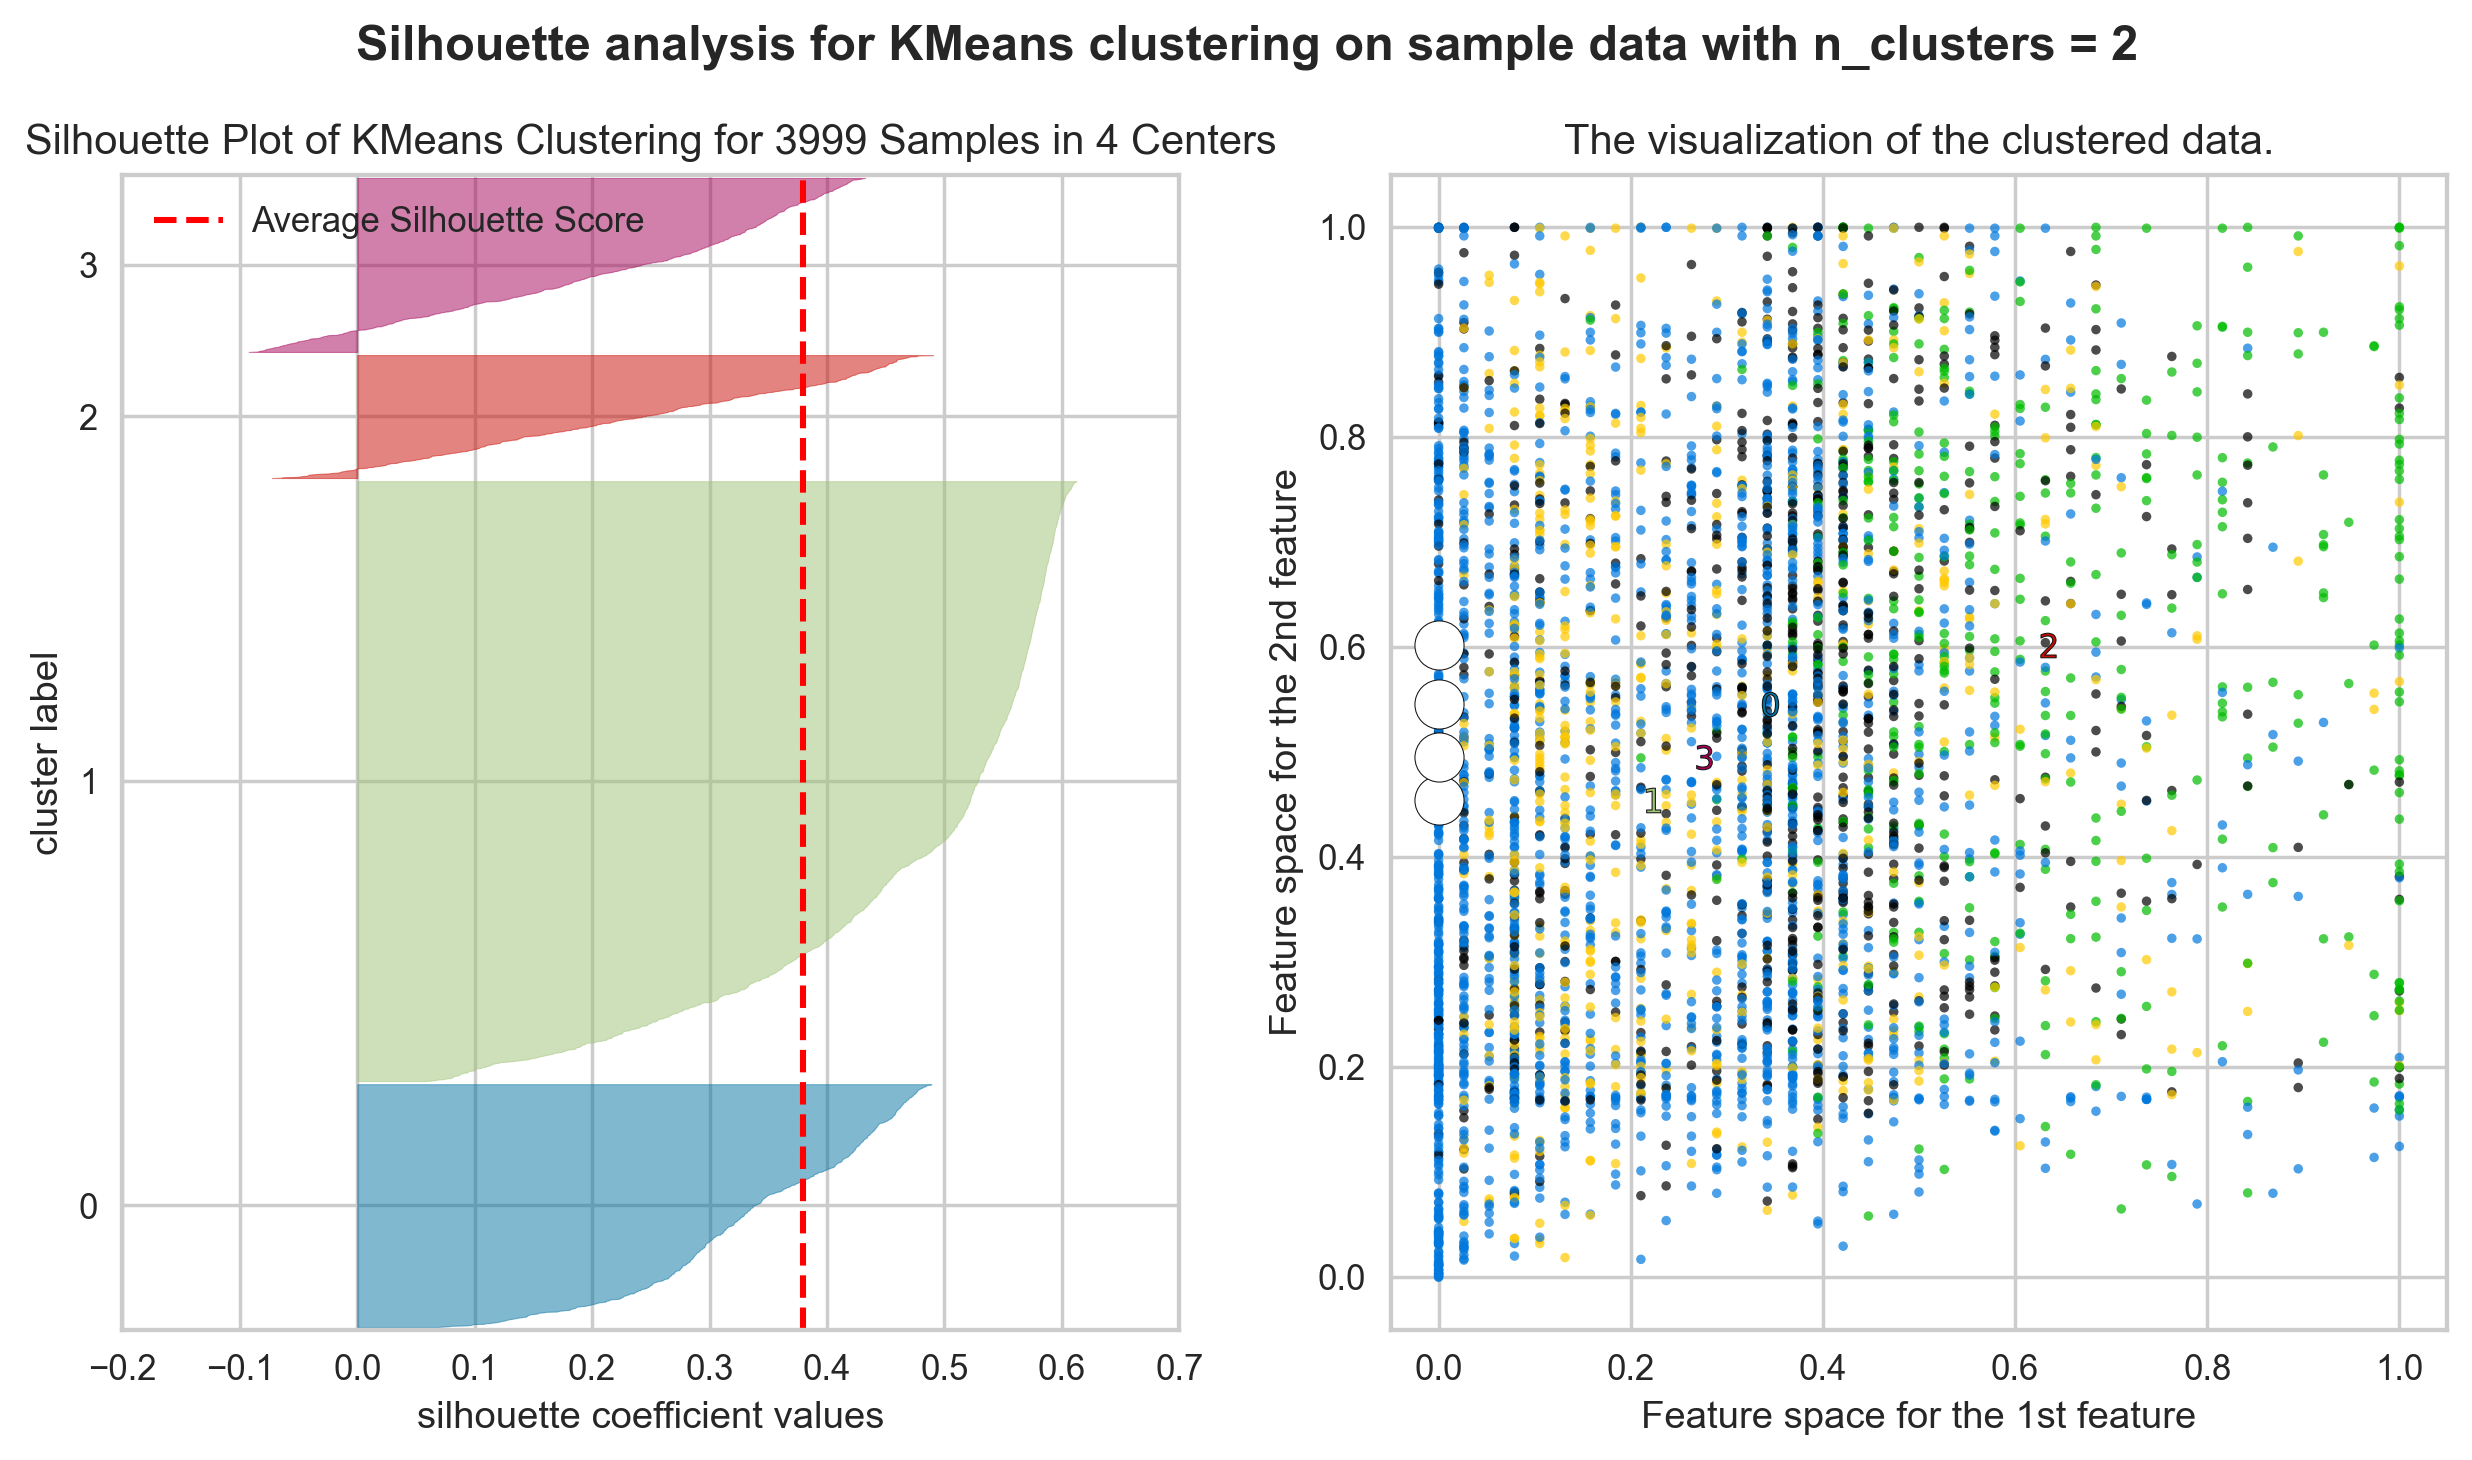

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(kmeans_model,ax= ax1, colors='yellowbrick')
sil_visualizer1.fit(norm_data)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(kmeans_model.labels_.astype(float) / 4) # 2 is number of clusters
ax2.scatter(norm_data[:, 6], norm_data[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = kmeans_model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 4], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

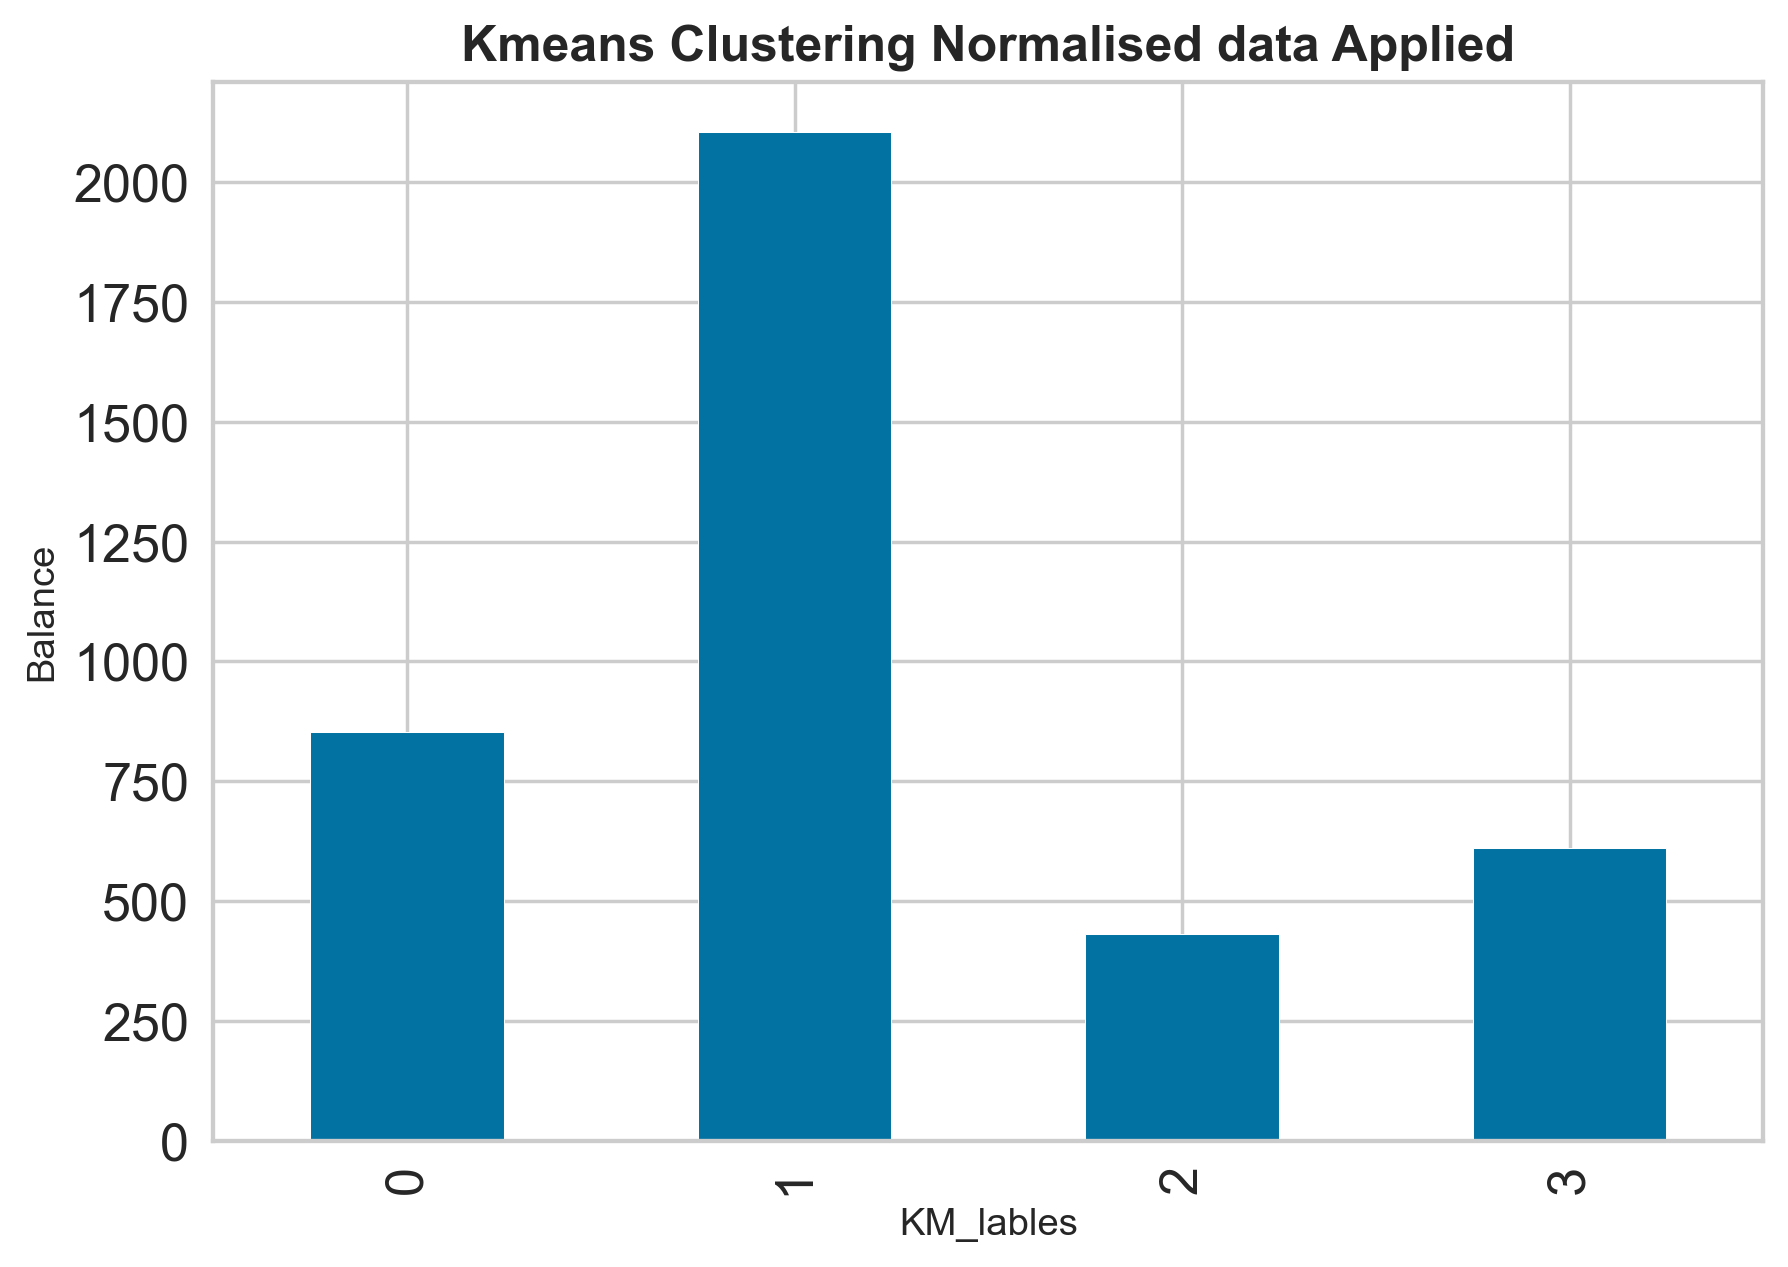

In [52]:
df.groupby(['KM_lables']).count()['Balance'].plot(kind='bar')
plt.ylabel('Balance')
plt.title('Kmeans Clustering Normalised data Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Balance', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [53]:
df.groupby('KM_lables').agg('mean')              

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KM_lables                                                               
0           58462.044894         0.0   2.640845        1.0        1.0   
1           50365.903042         0.0   1.673004        1.0        1.0   
2          120467.715856         0.0   4.050926        1.0        1.0   
3           77232.731588         0.0   1.171849        1.0        1.0   

            Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KM_lables                                                                  
0          21949.387911    13.123239          25.311033         0.120892   
1           9190.769249     8.484791          12.003802         0.066540   
2          44289.274884    24.108796         616.245370         1.942130   
3           7293.434124    10.512275         653.036825         2.100655   

           Days_since_enroll     Award  Hierarchical_labels  
KM_lables                                                    
0                4530.978873  1.000000             1.996479  
1                3772.883080  0.000000             0.038498  
2                5000.530093  0.803241             1.358796  
3                4110.229133  0.461538             2.171849

### The  clustering for dataset using Kmeans clustering has been done. The final Kmeans cluster consists of four cluster with a silhouette score of 0.38.

## DBSCAN (Density Based Spatial Clustering Of Applications with noise)

In [54]:
# Again importing the dataset with noise as the above dataset has been cleaned for clustering purpose.

data = pd.read_excel('EastWestAirlines.xlsx' , sheet_name=1)
data = data.drop(columns = ['ID#'])
data.rename(columns={"Award?":"Award"}, inplace= True)
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  
3            1                  0                0               6952      0  
4           26               2077                4               6935      1

In [55]:
std_data1 = sc.fit_transform(data)
std_data1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [56]:
norm_data1 = ms.fit_transform(data)
norm_data1

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [57]:
# same thing is done by looping but did it through python library to compute fast.

from itertools import product 

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [58]:
num_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_data1)
    num_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_data1, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


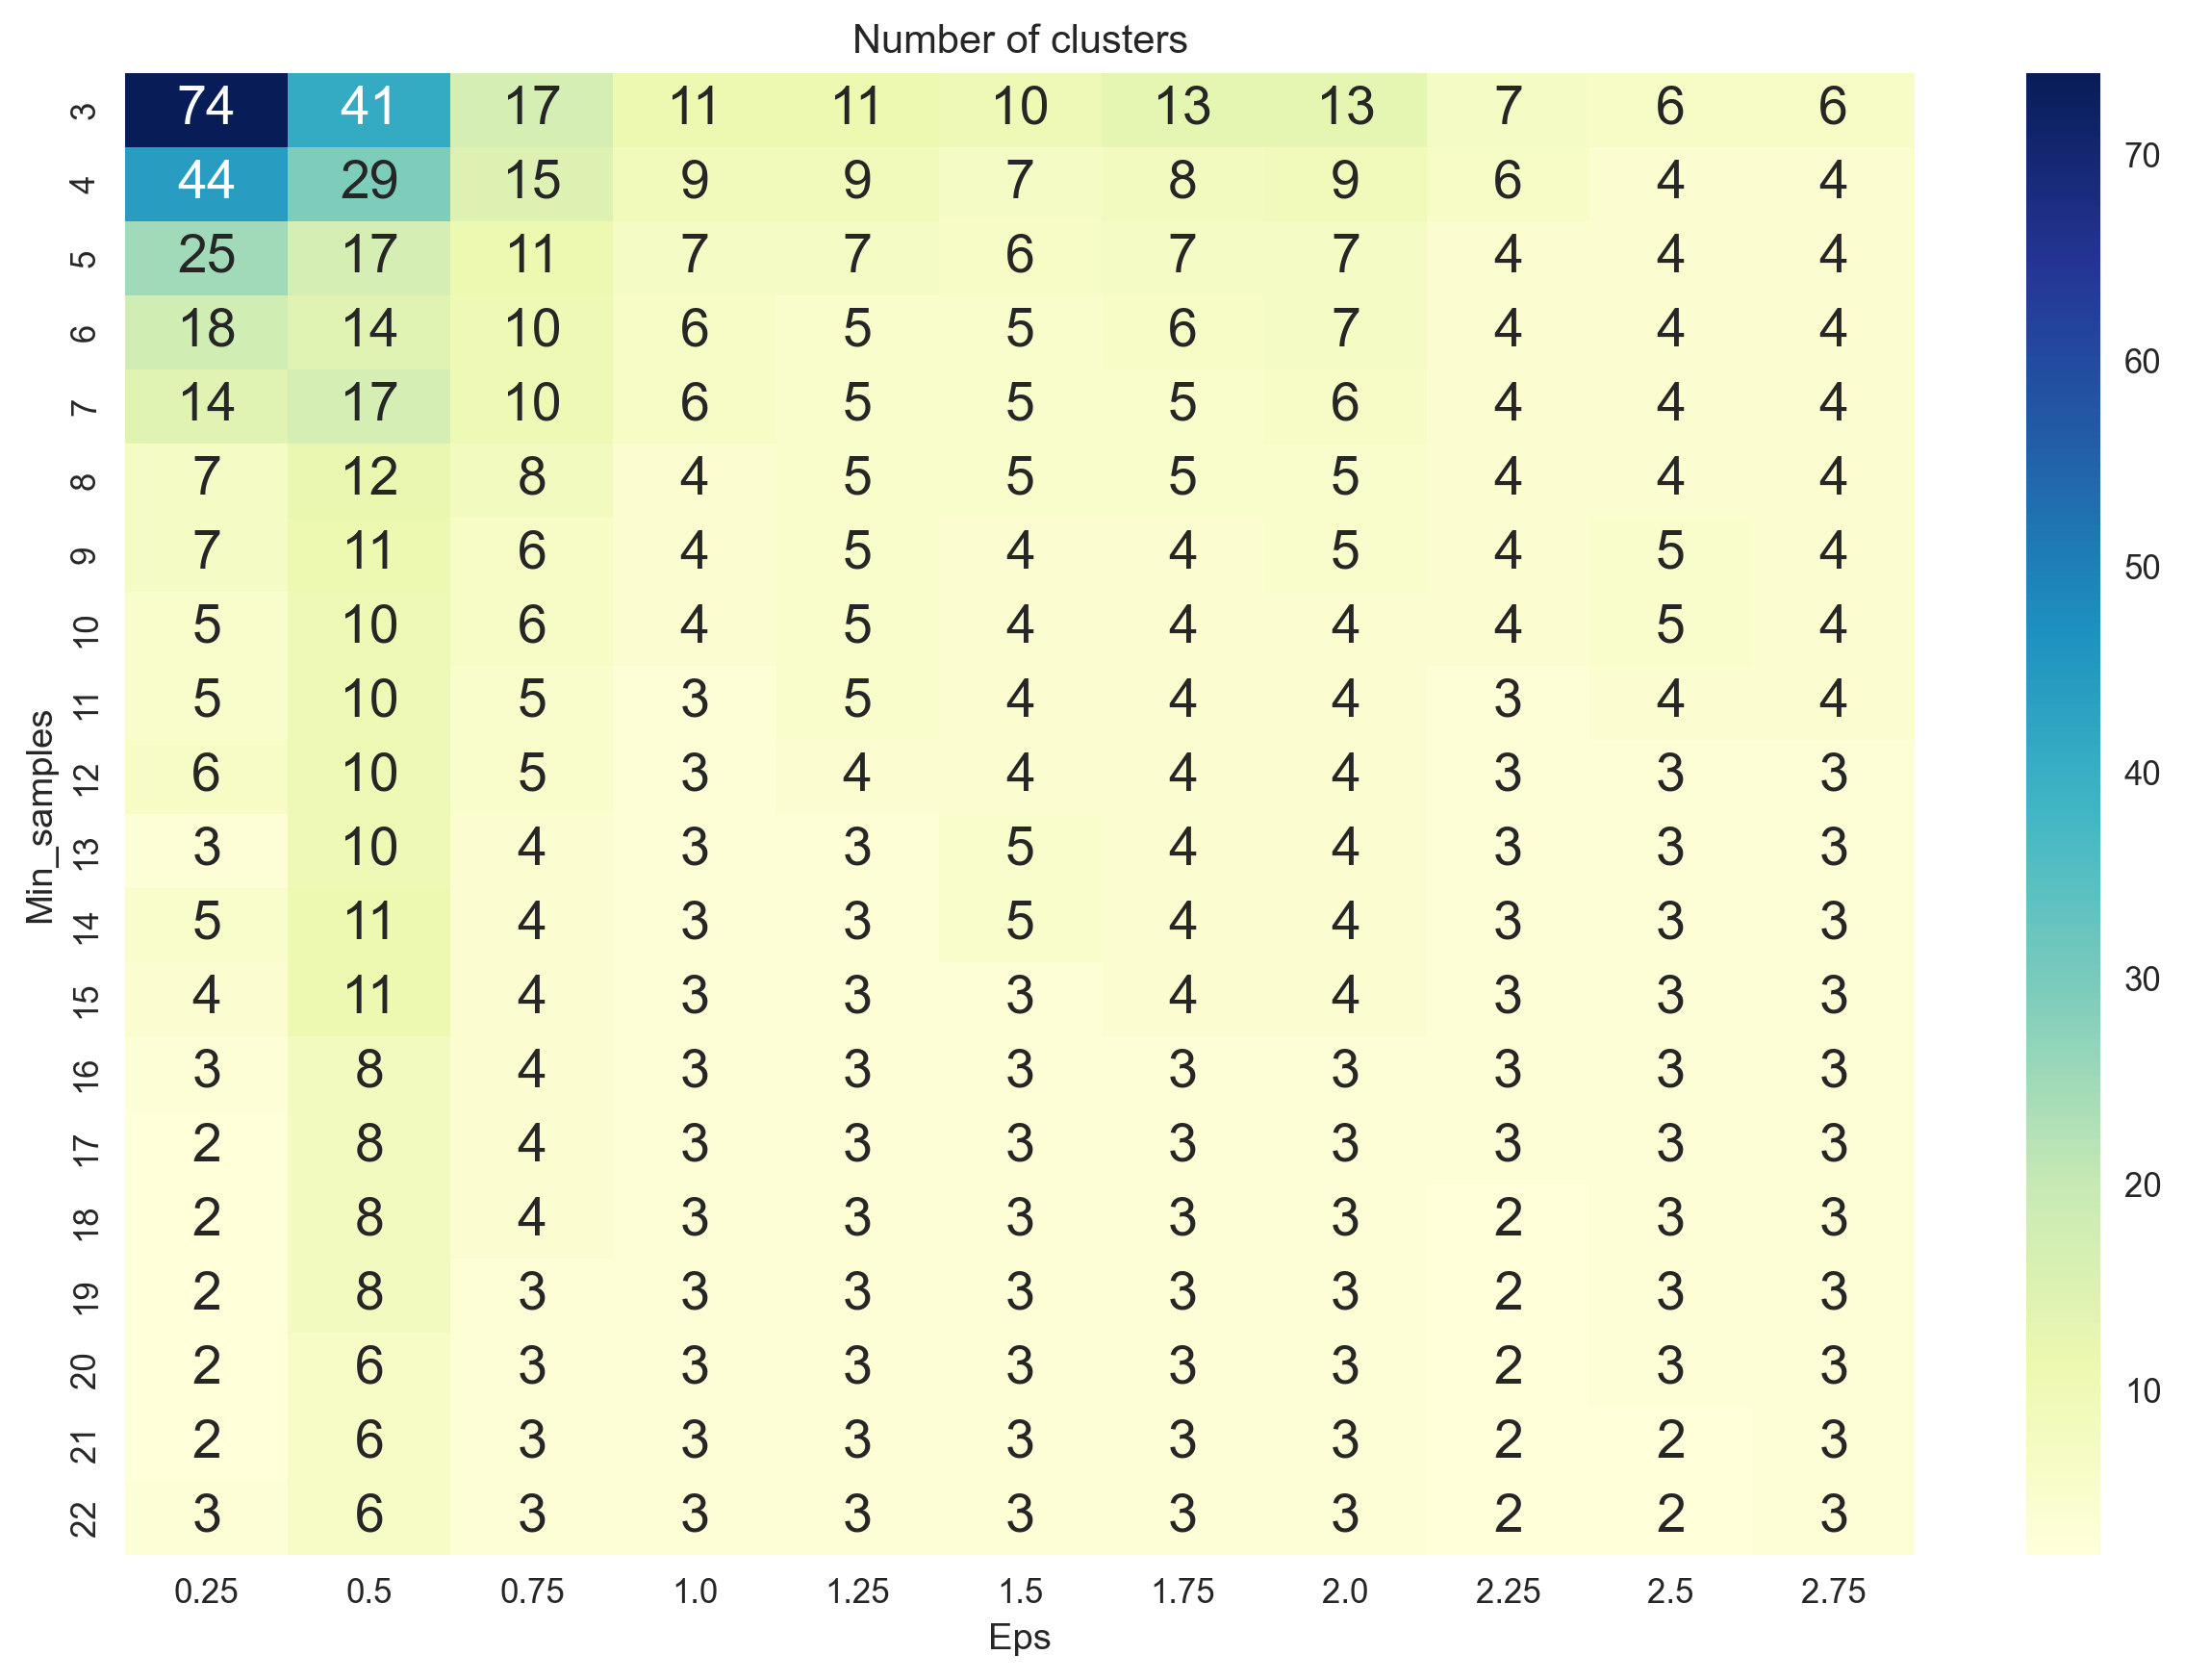

In [59]:
DBS = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
DBS['No_of_clusters'] = num_clusters
pivot_1 = pd.pivot_table(DBS, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

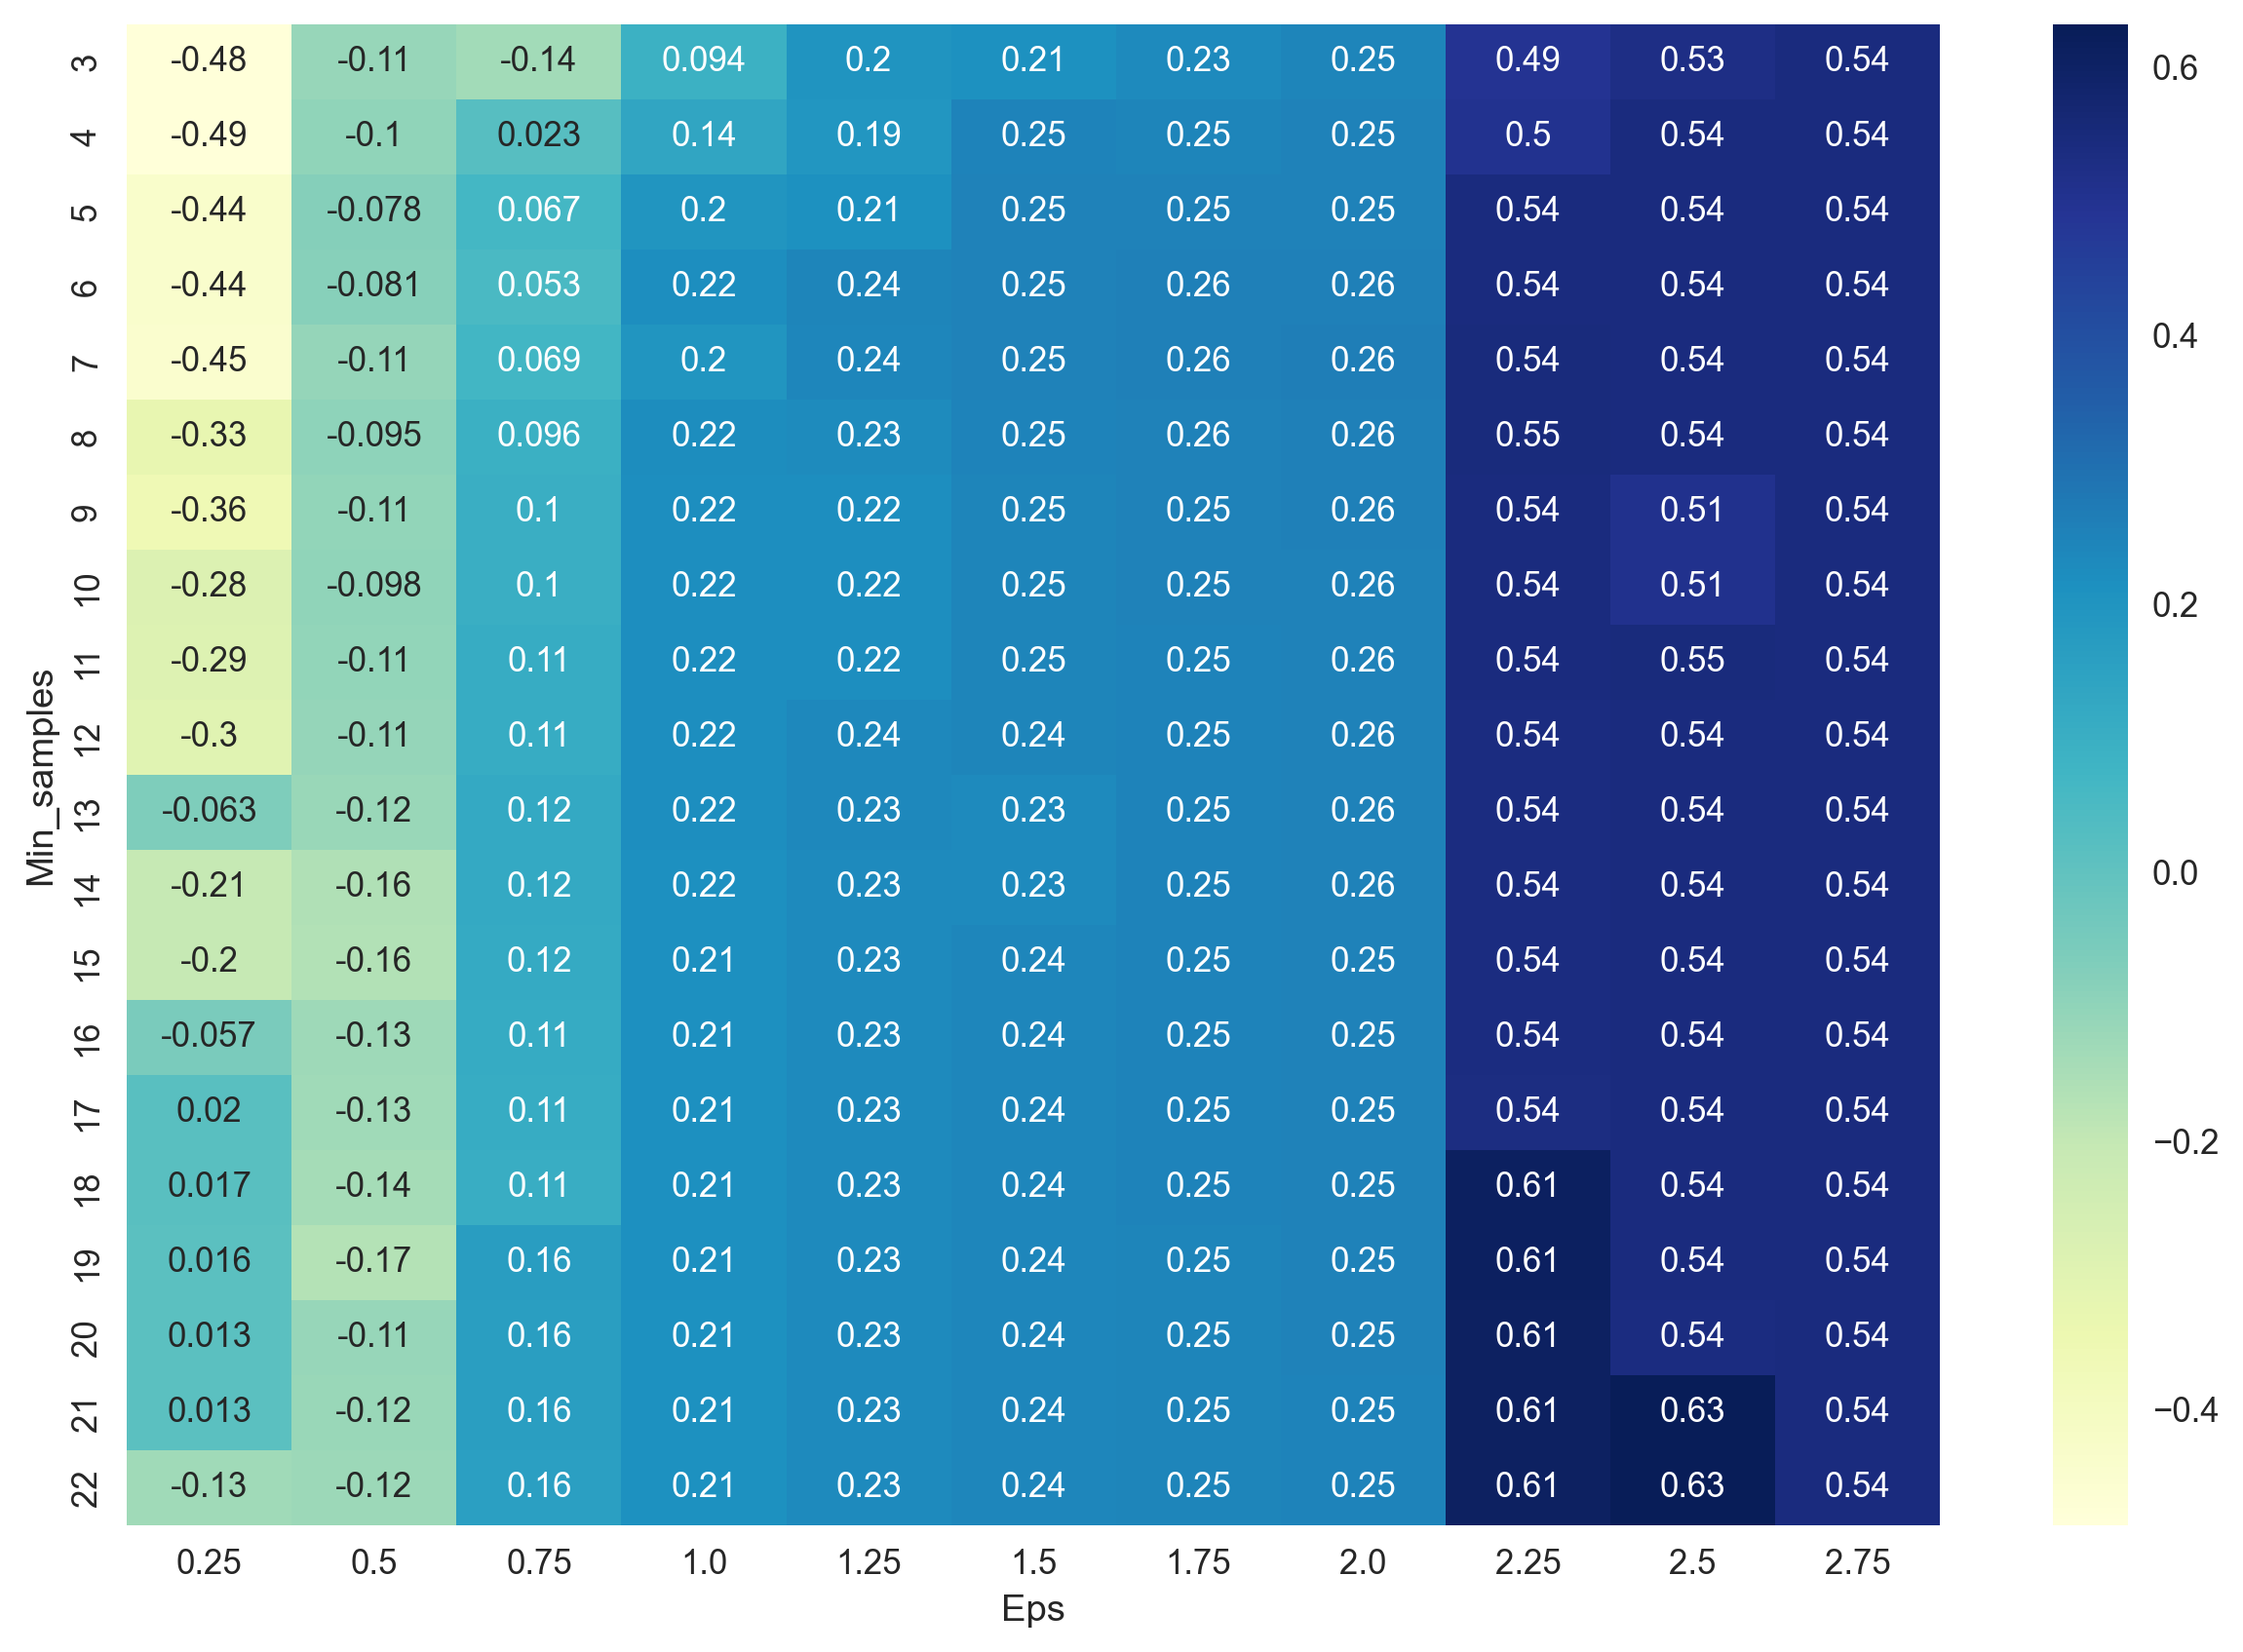

In [60]:
DBS = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
DBS['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(DBS, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [61]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_data1)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_data1, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.2180


In [62]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_data1)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_data1, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 8 
number of clusters= 3 
average silhouette score= 0.2213


In [63]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
ypred_db=dbscan.fit(std_data1)
ypred_db

DBSCAN(eps=1, min_samples=22)

In [64]:
df['DBSCAN_Labels'] = dbscan.labels_
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  28143.0         0.0        1.0        1.0        1.0        174.0   
1  19244.0         0.0        1.0        1.0        1.0        215.0   
2  41354.0         0.0        1.0        1.0        1.0       4123.0   
3  14776.0         0.0        1.0        1.0        1.0        500.0   
4  97752.0         0.0        4.0        1.0        1.0      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0          1.0                0.0              0.0             7000.0    0.0   
1          2.0                0.0              0.0             6968.0    0.0   
2          4.0                0.0              0.0             7034.0    0.0   
3          1.0                0.0              0.0             6952.0    0.0   
4         26.0              777.5              2.5             6935.0    1.0   

   Hierarchical_labels  KM_lables  DBSCAN_Labels  
0                    0          1              0  
1                    0          1              0  
2                    0          1              0  
3                    0          1              0  
4                    1          2             -1

In [65]:
df.groupby('DBSCAN_Labels').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Labels                                                               
-1             113943.532349         0.0   2.643216        1.0        1.0   
 0              50037.691341         0.0   1.624495        1.0        1.0   
 1              54186.559292         0.0   2.578029        1.0        1.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Labels                                                                  
-1             28026.770415    19.677136         491.462940         1.582286   
 0              8398.008300     8.103185          76.615074         0.263571   
 1             21148.914014    12.470226         154.070842         0.532341   

               Days_since_enroll     Award  Hierarchical_labels  KM_lables  
DBSCAN_Labels                                                               
-1                   4607.694724  0.636935             1.368090   1.880653  
 0                   3798.542844  0.000000             0.349933   1.215792  
 1                   4451.172485  1.000000             1.875770   0.609856

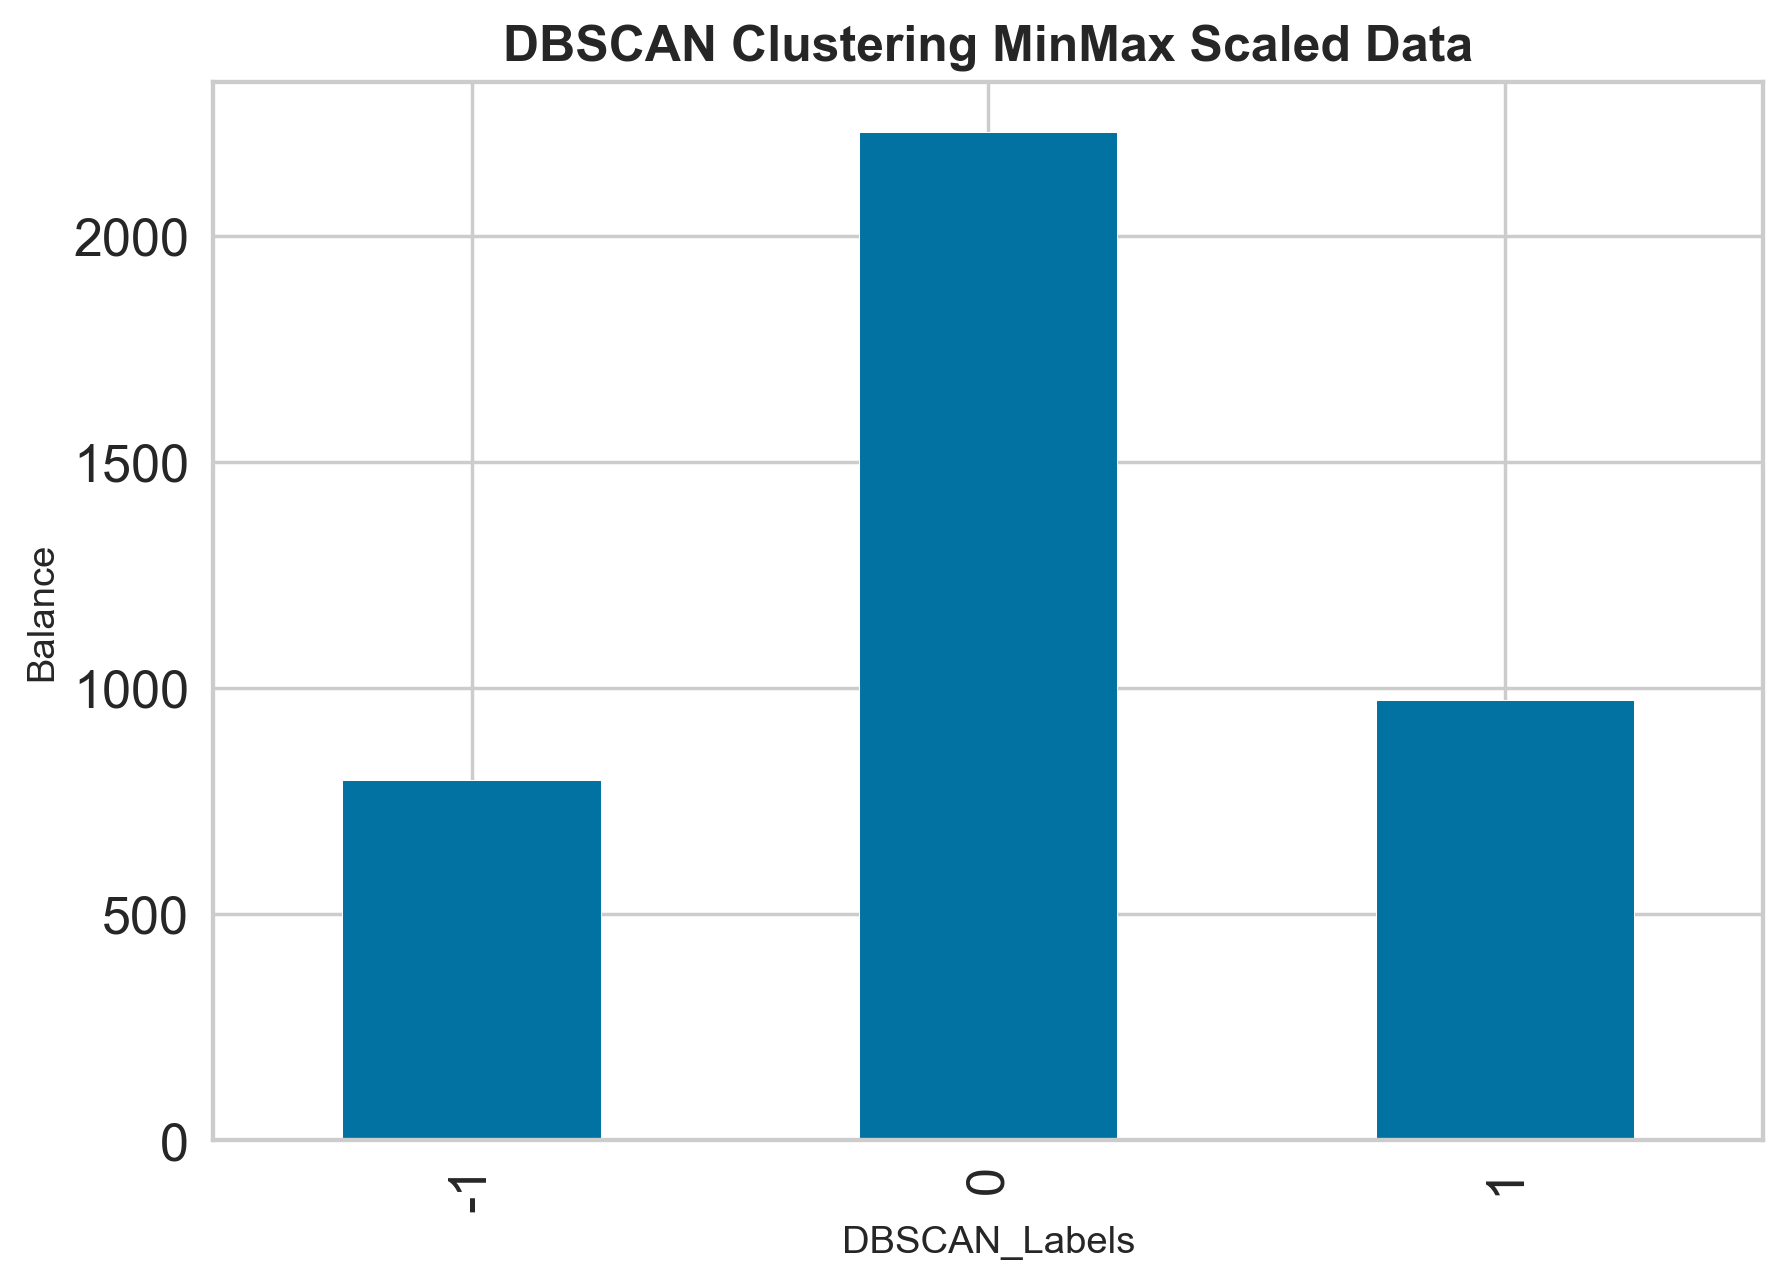

In [66]:
df.groupby(['DBSCAN_Labels']).count()['Balance'].plot(kind='bar')
plt.ylabel('Balance')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Balance', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## DBSCAN on Normalised data

In [67]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [68]:
num_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_data1)
    num_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_data1, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


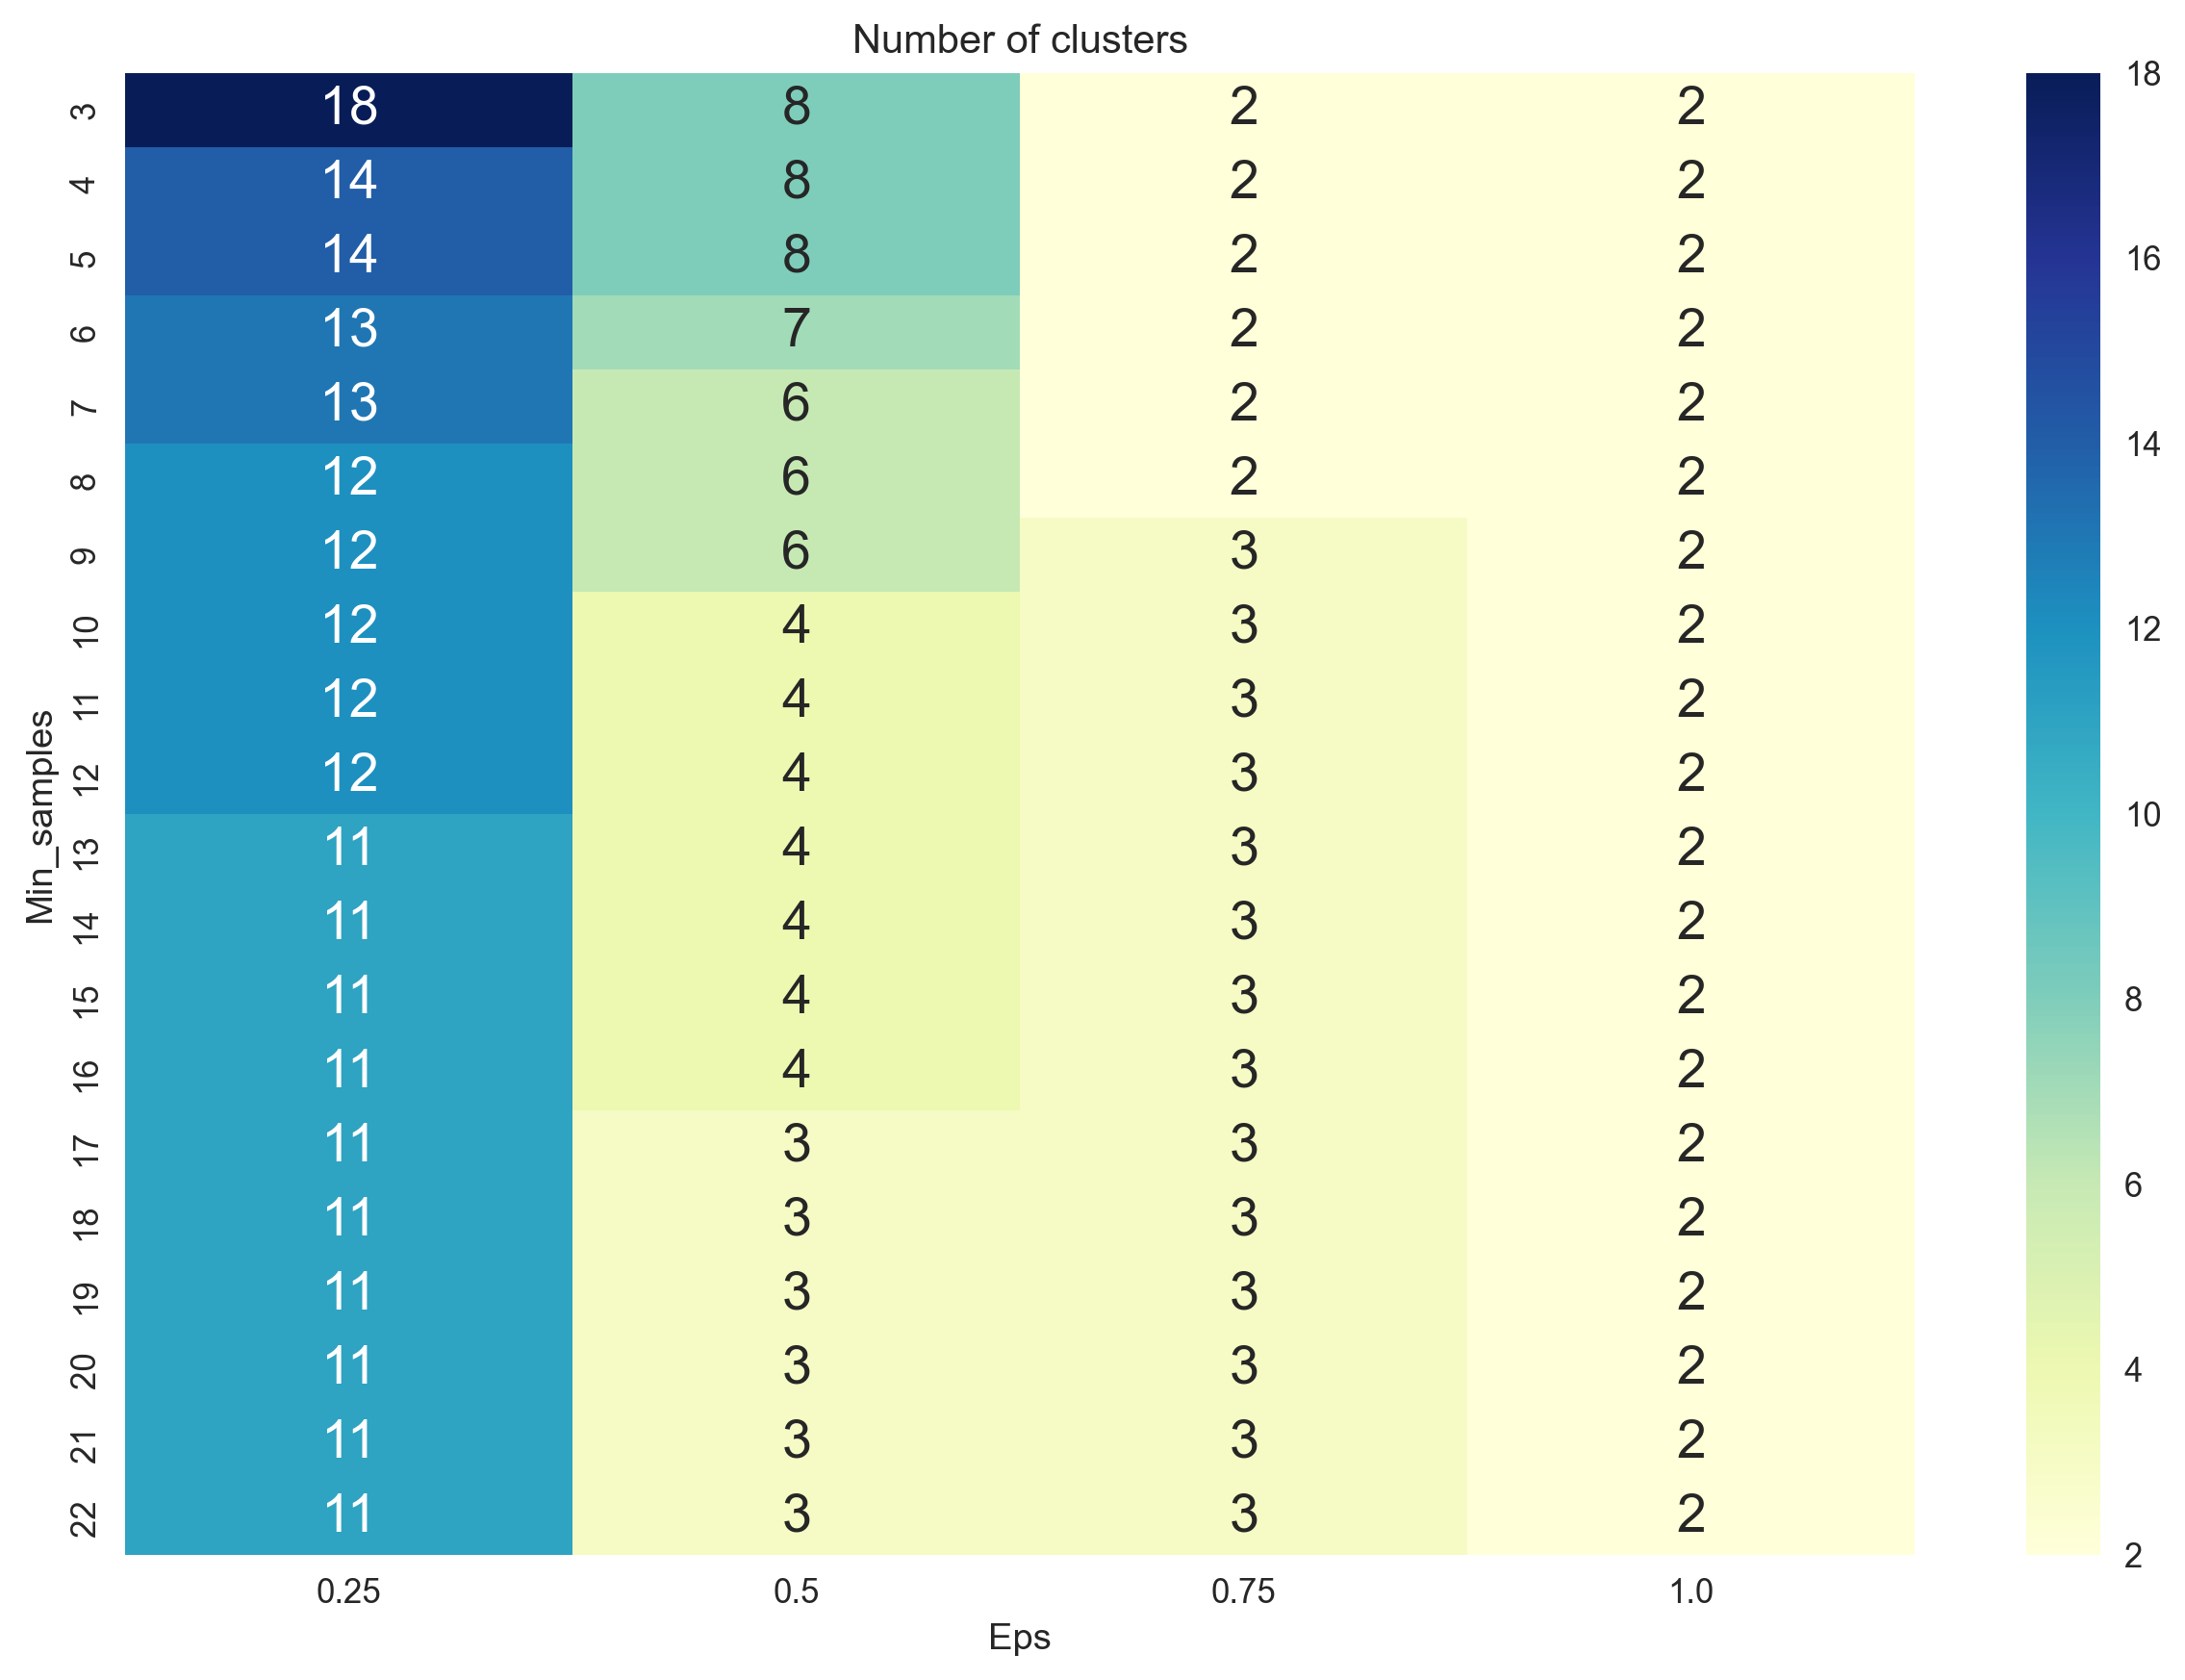

In [69]:
DBS = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
DBS['No_of_clusters'] = num_clusters
pivot_1 = pd.pivot_table(DBS, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

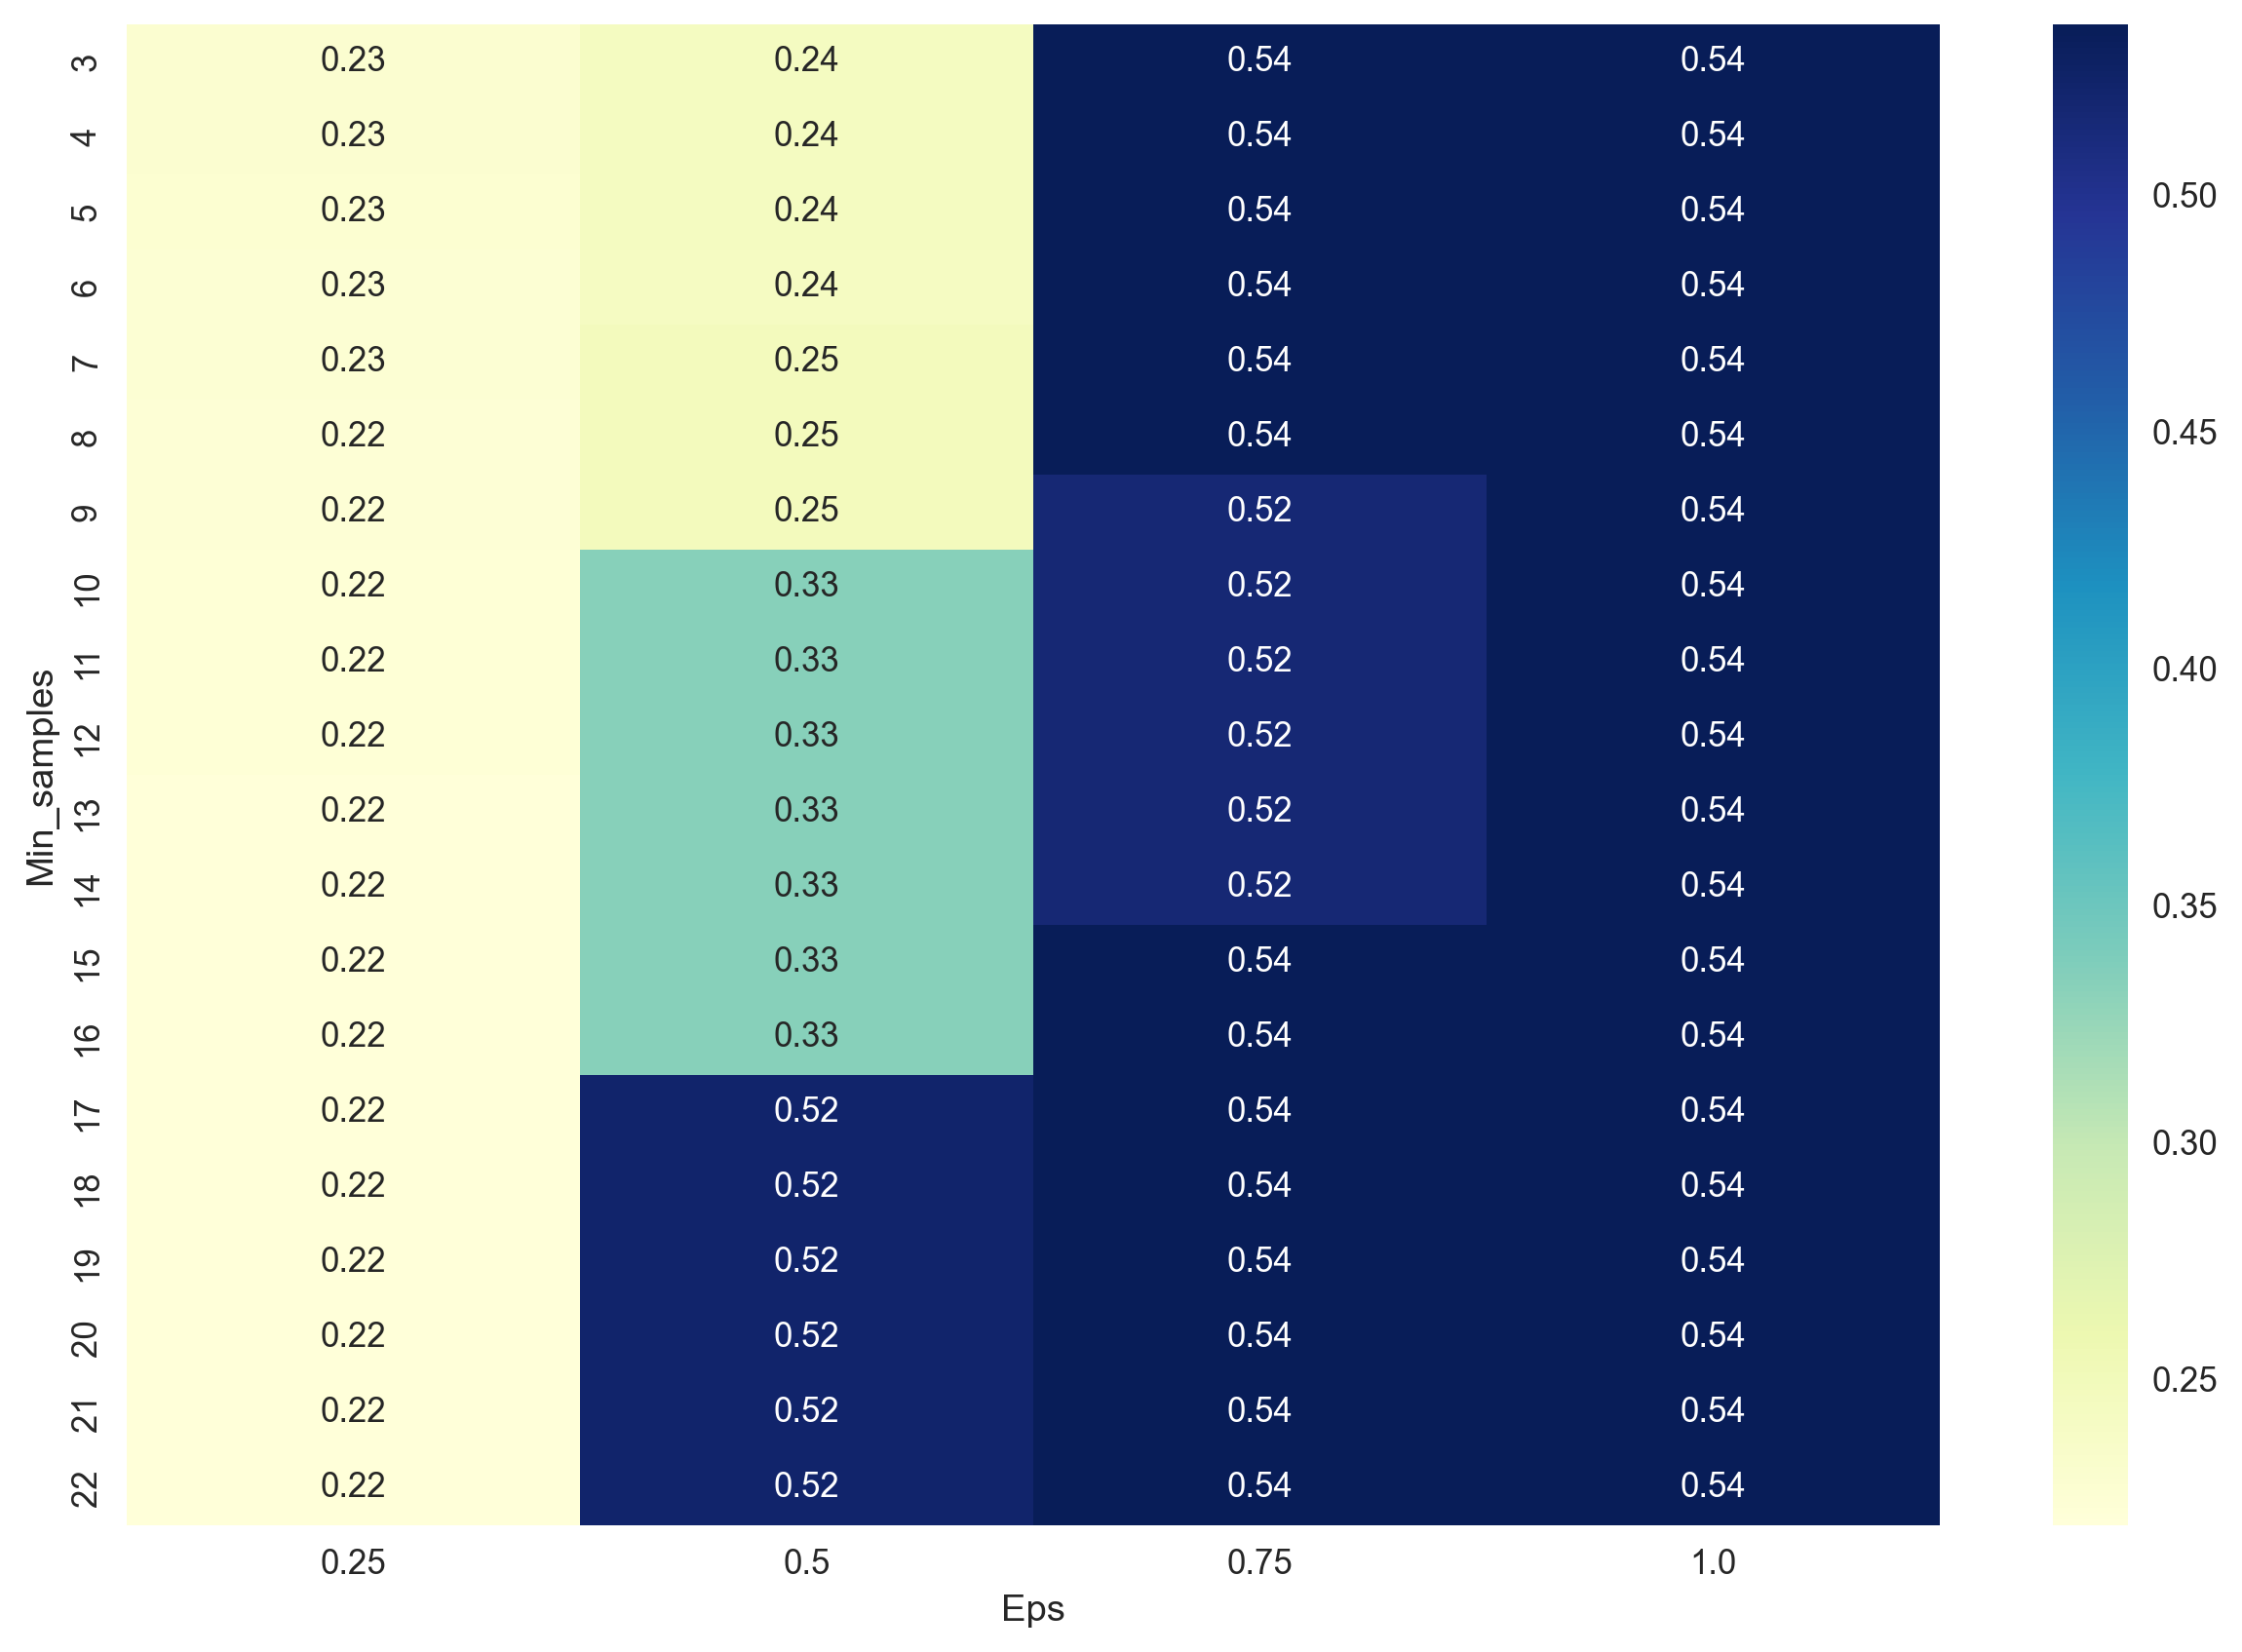

In [70]:
DBS = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
DBS['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(DBS, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [71]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_data1)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_data1, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg.round(2))

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [72]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_data1)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_data1, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg.round(2))

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


In [73]:
#Creating DBScan on normalized data as it is giving the maximum silhouette score.

dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
ypred_dbs = dbscan.fit(norm_data1)
ypred_dbs

DBSCAN(eps=1, min_samples=22)

In [74]:
df['DBSCAN_Labels1'] = dbscan.labels_
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  28143.0         0.0        1.0        1.0        1.0        174.0   
1  19244.0         0.0        1.0        1.0        1.0        215.0   
2  41354.0         0.0        1.0        1.0        1.0       4123.0   
3  14776.0         0.0        1.0        1.0        1.0        500.0   
4  97752.0         0.0        4.0        1.0        1.0      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0          1.0                0.0              0.0             7000.0    0.0   
1          2.0                0.0              0.0             6968.0    0.0   
2          4.0                0.0              0.0             7034.0    0.0   
3          1.0                0.0              0.0             6952.0    0.0   
4         26.0              777.5              2.5             6935.0    1.0   

   Hierarchical_labels  KM_lables  DBSCAN_Labels  DBSCAN_Labels1  
0                    0          1              0               0  
1                    0          1              0               0  
2                    0          1              0               0  
3                    0          1              0               0  
4                    1          2             -1               1

In [75]:
df.groupby('DBSCAN_Labels1').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Labels1                                                              
0               56089.419579         0.0   1.705322        1.0        1.0   
1               76824.858879         0.0   2.661715        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Labels1                                                                  
0                9948.992454     9.111994         111.820691         0.374106   
1               24696.792032    15.480756         290.668467         0.961175   

                Days_since_enroll  Award  Hierarchical_labels  KM_lables  \
DBSCAN_Labels1                                                             
0                     3820.652105    0.0             0.478952   1.295075   
1                     4625.062120    1.0             1.681296   1.039838   

                DBSCAN_Labels  
DBSCAN_Labels1                 
0                   -0.114774  
1                    0.315327

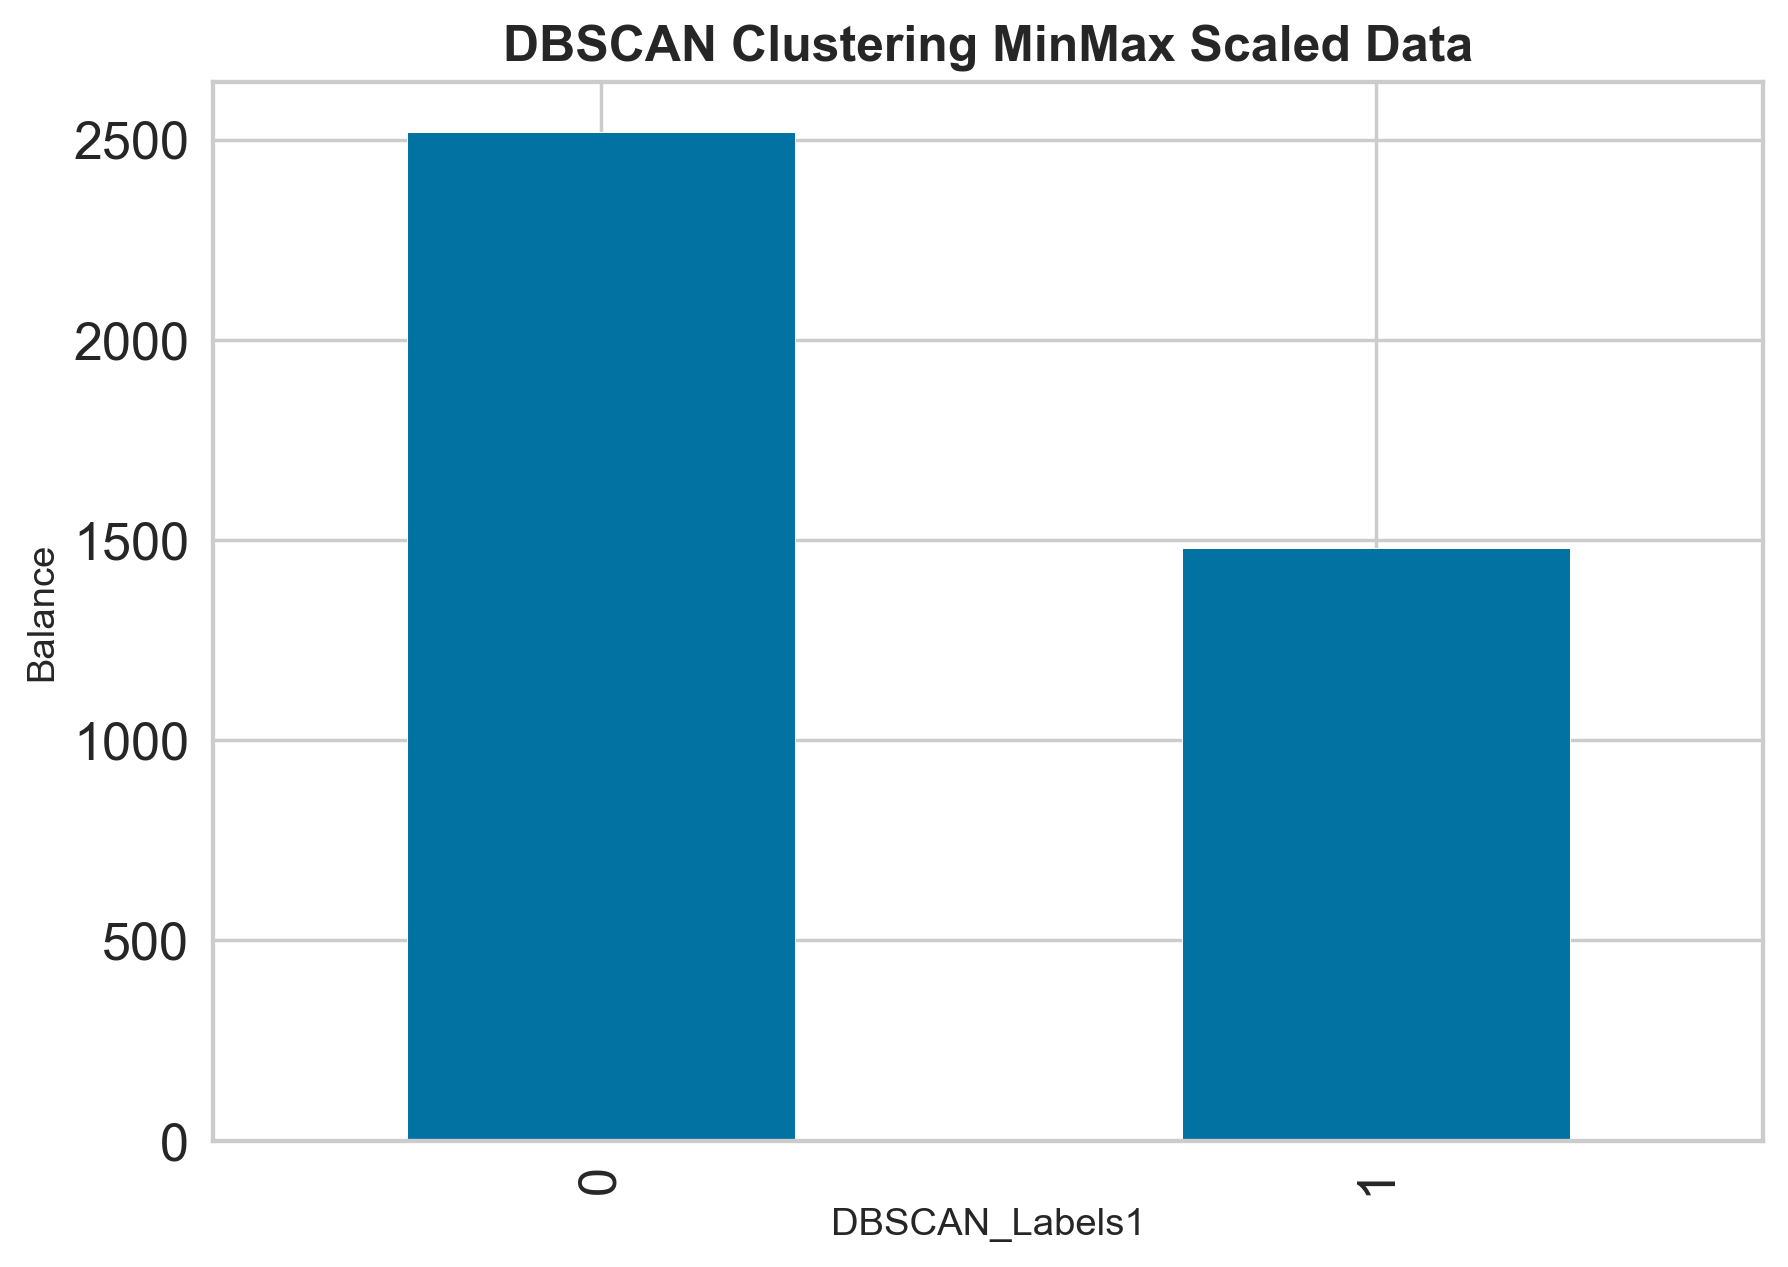

In [76]:
df.groupby(['DBSCAN_Labels1']).count()['Balance'].plot(kind='bar')
plt.ylabel('Balance')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Balance', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [77]:
cluster1 = pd.DataFrame(df.loc[df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_airline = pd.concat([cluster1,cluster2],axis=1)
avg_airline

Cluster1_Avg  Cluster2_Avg
Balance              50037.691341  54186.559292
Qual_miles               0.000000      0.000000
cc1_miles                1.624495      2.578029
cc2_miles                1.000000      1.000000
cc3_miles                1.000000      1.000000
Bonus_miles           8398.008300  21148.914014
Bonus_trans              8.103185     12.470226
Flight_miles_12mo       76.615074    154.070842
Flight_trans_12          0.263571      0.532341
Days_since_enroll     3798.542844   4451.172485
Award                    0.000000      1.000000
Hierarchical_labels      0.349933      1.875770
KM_lables                1.215792      0.609856
DBSCAN_Labels            0.000000      1.000000
DBSCAN_Labels1           0.000000      1.000000

### The  clustering for dataset using DBSCAN  has been done. The final DBScan cluster consists of 2 cluster with a silhouette score of 0.54.
1. As decided need to focus on first two clusters. Considering past Award status, cluster number two shows award average as 1 that means people awarded with scheme.
2. The cluster number 1 award average is 0. Low average indicates that maximim award were given to cluster number two in the past as they more balance needed to avail the award.
4. Here it can be seen the cluster formed by DBscan is approximately equal as that of kmeans cluster.

# Conclusion
1. All the three type of clustering methods have given the same number of cluster as the optimal value.
2. The standardized data have given good results for hierarchical and DBcan method, whereas normalized data have given good result for Kmeans clustering.
3. From the three type of clustering that have been performed the maximum silhouette score have been obtained from hierarchical clustering.
